In [1]:
import pandas as pd
import numpy
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
wego = pd.read_csv(r'C:\Users\Barbie\Desktop\DA11\Python\projects\wego-the-brotherhood-of-steel\data\Headway_Data_8-1-2023_to_9-30-2023.csv')

wego.head(10)

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,...,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES
0,120230801,1,99457890,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,0.0,0,6.500000,NaN
1,120230801,1,99457891,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,0.0,0,0.000000,NaN
2,120230801,1,99457892,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,0.0,0,0.000000,NaN
3,120230801,1,99457893,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,NaN,0,0.000000,NaN
4,120230801,1,99457894,2023-08-01,22,2200,1040,345105,0,FROM DOWNTOWN,...,NaN,NaN,0,0,1,0,0.0,0,12.866666,5.0
5,120230801,1,99457895,2023-08-01,22,2200,1040,345105,0,FROM DOWNTOWN,...,NaN,NaN,0,0,1,0,0.0,0,0.000000,NaN
6,120230801,1,99457896,2023-08-01,22,2200,1040,345105,0,FROM DOWNTOWN,...,NaN,NaN,0,0,1,0,NaN,0,0.000000,NaN
7,120230801,1,99457897,2023-08-01,22,2200,1040,345106,0,TO DOWNTOWN,...,37.666666,2.666666,0,0,1,0,0.0,0,13.216666,10.0
8,120230801,1,99457898,2023-08-01,22,2200,1040,345106,0,TO DOWNTOWN,...,36.966666,1.966666,0,0,1,0,0.0,0,0.000000,NaN
9,120230801,1,99457899,2023-08-01,22,2200,1040,345106,0,TO DOWNTOWN,...,14.516666,-0.483334,0,0,1,0,0.0,0,0.000000,NaN


In [3]:
pd.set_option('display.max_columns', None)

In [4]:
wego.columns

Index(['CALENDAR_ID', 'SERVICE_ABBR', 'ADHERENCE_ID', 'DATE', 'ROUTE_ABBR',
       'BLOCK_ABBR', 'OPERATOR', 'TRIP_ID', 'OVERLOAD_ID',
       'ROUTE_DIRECTION_NAME', 'TIME_POINT_ABBR', 'ROUTE_STOP_SEQUENCE',
       'TRIP_EDGE', 'LATITUDE', 'LONGITUDE', 'SCHEDULED_TIME',
       'ACTUAL_ARRIVAL_TIME', 'ACTUAL_DEPARTURE_TIME', 'ADHERENCE',
       'SCHEDULED_HDWY', 'ACTUAL_HDWY', 'HDWY_DEV', 'ADJUSTED_EARLY_COUNT',
       'ADJUSTED_LATE_COUNT', 'ADJUSTED_ONTIME_COUNT', 'STOP_CANCELLED',
       'PREV_SCHED_STOP_CANCELLED', 'IS_RELIEF', 'DWELL_IN_MINS',
       'SCHEDULED_LAYOVER_MINUTES'],
      dtype='object')

In [5]:
def route_name(ROUTE_ABBR):
    if ROUTE_ABBR == 3: 
        return 'West End'
    elif ROUTE_ABBR == 7: 
        return 'Hillsboro'
    elif ROUTE_ABBR == 22: 
        return 'Bordeaux'
    elif ROUTE_ABBR == 23: 
        return 'Dickerson Pike'
    elif ROUTE_ABBR == 50:
        return 'Charlotte Pike'
    elif ROUTE_ABBR == 52: 
        return 'Nolensville Pike'
    elif ROUTE_ABBR == 55:
        return 'Murfreesboro Pike'
    elif ROUTE_ABBR == 56: 
        return 'Gallatin Pike'
    else:
        return 'none'

wego['ROUTE_NAME'] = wego['ROUTE_ABBR'].apply(route_name)

wego

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES,ROUTE_NAME
0,120230801,1,99457890,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,MHSP,14.0,1,36.181248,-86.847705,2023-08-01 04:42:00,2023-08-01 04:37:38,2023-08-01 04:44:08,-2.133333,NaN,NaN,NaN,0,0,1,0,0.0,0,6.500000,NaN,Bordeaux
1,120230801,1,99457891,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,ELIZ,10.0,0,36.193454,-86.839981,2023-08-01 04:46:00,2023-08-01 04:48:27,2023-08-01 04:48:27,-2.450000,NaN,NaN,NaN,0,0,1,0,0.0,0,0.000000,NaN,Bordeaux
2,120230801,1,99457892,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,CV23,5.0,0,36.182177,-86.814445,2023-08-01 04:54:00,2023-08-01 04:54:56,2023-08-01 04:54:56,-0.933333,NaN,NaN,NaN,0,0,1,0,0.0,0,0.000000,NaN,Bordeaux
3,120230801,1,99457893,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,MCC5_10,1.0,2,36.167091,-86.781923,2023-08-01 05:10:00,2023-08-01 05:03:43,2023-08-01 05:03:43,6.283333,NaN,NaN,NaN,0,0,1,0,NaN,0,0.000000,NaN,Bordeaux
4,120230801,1,99457894,2023-08-01,22,2200,1040,345105,0,FROM DOWNTOWN,MCC5_10,1.0,1,36.167091,-86.781923,2023-08-01 05:15:00,2023-08-01 05:03:43,2023-08-01 05:16:35,-1.583333,NaN,NaN,NaN,0,0,1,0,0.0,0,12.866666,5.0,Bordeaux
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350324,120230930,2,100406610,2023-09-30,7,702,2312,353448,0,TO DOWNTOWN,21BK,4.0,0,36.138372,-86.800622,2023-09-30 22:23:00,2023-09-30 22:31:26,2023-09-30 22:31:26,-8.433333,30.0,35.266666,5.266666,0,1,0,0,0.0,0,0.000000,NaN,Hillsboro
350325,120230930,2,100406611,2023-09-30,7,702,2312,353448,0,TO DOWNTOWN,MCC5_9,3.0,2,36.167091,-86.781923,2023-09-30 22:38:00,2023-09-30 22:49:18,2023-09-30 22:49:18,-11.300000,NaN,NaN,NaN,0,1,0,0,NaN,0,0.000000,NaN,Hillsboro
350326,120230930,2,100406612,2023-09-30,7,702,2312,353449,0,FROM DOWNTOWN,MCC5_9,3.0,1,36.167091,-86.781923,2023-09-30 22:45:00,2023-09-30 22:49:19,2023-09-30 22:49:19,-4.316666,30.0,31.866666,1.866666,0,0,1,0,0.0,0,0.000000,NaN,Hillsboro
350327,120230930,2,100406613,2023-09-30,7,702,2312,353449,0,FROM DOWNTOWN,21BK,4.0,0,36.138881,-86.800622,2023-09-30 22:59:00,2023-09-30 23:21:05,2023-09-30 23:21:05,-22.083333,30.0,47.500000,17.500000,0,1,0,0,0.0,0,0.000000,NaN,Hillsboro


In [6]:
def week_day(SERVICE_ABBR):
    if SERVICE_ABBR == 1:
        return  'Weekday'
    elif SERVICE_ABBR == 2:
        return 'Saturday'
    elif SERVICE_ABBR == 3:
        return 'Sunday'
    else:
        return 'none'
    
wego['DAY_OF_WEEK'] = wego['SERVICE_ABBR'].apply(week_day)

wego

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES,ROUTE_NAME,DAY_OF_WEEK
0,120230801,1,99457890,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,MHSP,14.0,1,36.181248,-86.847705,2023-08-01 04:42:00,2023-08-01 04:37:38,2023-08-01 04:44:08,-2.133333,NaN,NaN,NaN,0,0,1,0,0.0,0,6.500000,NaN,Bordeaux,Weekday
1,120230801,1,99457891,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,ELIZ,10.0,0,36.193454,-86.839981,2023-08-01 04:46:00,2023-08-01 04:48:27,2023-08-01 04:48:27,-2.450000,NaN,NaN,NaN,0,0,1,0,0.0,0,0.000000,NaN,Bordeaux,Weekday
2,120230801,1,99457892,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,CV23,5.0,0,36.182177,-86.814445,2023-08-01 04:54:00,2023-08-01 04:54:56,2023-08-01 04:54:56,-0.933333,NaN,NaN,NaN,0,0,1,0,0.0,0,0.000000,NaN,Bordeaux,Weekday
3,120230801,1,99457893,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,MCC5_10,1.0,2,36.167091,-86.781923,2023-08-01 05:10:00,2023-08-01 05:03:43,2023-08-01 05:03:43,6.283333,NaN,NaN,NaN,0,0,1,0,NaN,0,0.000000,NaN,Bordeaux,Weekday
4,120230801,1,99457894,2023-08-01,22,2200,1040,345105,0,FROM DOWNTOWN,MCC5_10,1.0,1,36.167091,-86.781923,2023-08-01 05:15:00,2023-08-01 05:03:43,2023-08-01 05:16:35,-1.583333,NaN,NaN,NaN,0,0,1,0,0.0,0,12.866666,5.0,Bordeaux,Weekday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350324,120230930,2,100406610,2023-09-30,7,702,2312,353448,0,TO DOWNTOWN,21BK,4.0,0,36.138372,-86.800622,2023-09-30 22:23:00,2023-09-30 22:31:26,2023-09-30 22:31:26,-8.433333,30.0,35.266666,5.266666,0,1,0,0,0.0,0,0.000000,NaN,Hillsboro,Saturday
350325,120230930,2,100406611,2023-09-30,7,702,2312,353448,0,TO DOWNTOWN,MCC5_9,3.0,2,36.167091,-86.781923,2023-09-30 22:38:00,2023-09-30 22:49:18,2023-09-30 22:49:18,-11.300000,NaN,NaN,NaN,0,1,0,0,NaN,0,0.000000,NaN,Hillsboro,Saturday
350326,120230930,2,100406612,2023-09-30,7,702,2312,353449,0,FROM DOWNTOWN,MCC5_9,3.0,1,36.167091,-86.781923,2023-09-30 22:45:00,2023-09-30 22:49:19,2023-09-30 22:49:19,-4.316666,30.0,31.866666,1.866666,0,0,1,0,0.0,0,0.000000,NaN,Hillsboro,Saturday
350327,120230930,2,100406613,2023-09-30,7,702,2312,353449,0,FROM DOWNTOWN,21BK,4.0,0,36.138881,-86.800622,2023-09-30 22:59:00,2023-09-30 23:21:05,2023-09-30 23:21:05,-22.083333,30.0,47.500000,17.500000,0,1,0,0,0.0,0,0.000000,NaN,Hillsboro,Saturday


In [7]:
wego_trimmed = wego.dropna()
wego_trimmed

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES,ROUTE_NAME,DAY_OF_WEEK
7,120230801,1,99457897,2023-08-01,22,2200,1040,345106,0,TO DOWNTOWN,MHSP,14.0,1,36.181248,-86.847705,2023-08-01 05:42:00,2023-08-01 05:30:30,2023-08-01 05:43:43,-1.716666,35.0,37.666666,2.666666,0,0,1,0,0.0,0,13.216666,10.0,Bordeaux,Weekday
11,120230801,1,99457901,2023-08-01,22,2200,1040,345107,0,FROM DOWNTOWN,MCC5_10,1.0,1,36.167091,-86.781923,2023-08-01 06:15:00,2023-08-01 06:05:31,2023-08-01 06:16:19,-1.316666,15.0,12.833333,-2.166667,0,0,1,0,0.0,0,10.800000,5.0,Bordeaux,Weekday
14,120230801,1,99457904,2023-08-01,22,2200,1040,345108,0,TO DOWNTOWN,MHSP,14.0,1,36.181248,-86.847705,2023-08-01 06:42:00,2023-08-01 06:30:59,2023-08-01 06:43:31,-1.516666,60.0,59.800000,-0.200000,0,0,1,0,0.0,0,12.533333,7.0,Bordeaux,Weekday
18,120230801,1,99457908,2023-08-01,22,2200,1040,345109,0,FROM DOWNTOWN,MCC5_10,1.0,1,36.167091,-86.781923,2023-08-01 07:15:00,2023-08-01 07:05:49,2023-08-01 07:16:44,-1.733333,15.0,15.233333,0.233333,0,0,1,0,0.0,0,10.916666,5.0,Bordeaux,Weekday
22,120230801,1,99457912,2023-08-01,22,2200,1040,345110,0,TO DOWNTOWN,MHSP,14.0,1,36.181248,-86.847705,2023-08-01 07:45:00,2023-08-01 07:34:00,2023-08-01 07:46:15,-1.250000,63.0,62.733333,-0.266667,0,0,1,0,0.0,0,12.250000,9.0,Bordeaux,Weekday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350305,120230930,2,100406591,2023-09-30,7,702,2312,353442,0,TO DOWNTOWN,HBHS,5.0,1,36.107575,-86.812719,2023-09-30 18:37:00,2023-09-30 18:35:37,2023-09-30 18:40:03,-3.050000,30.0,29.800000,-0.200000,0,0,1,0,0.0,0,4.433333,20.0,Hillsboro,Saturday
350308,120230930,2,100406594,2023-09-30,7,702,2312,353443,0,FROM DOWNTOWN,MCC5_9,3.0,1,36.167091,-86.781923,2023-09-30 19:15:00,2023-09-30 19:06:51,2023-09-30 19:19:03,-4.050000,30.0,28.350000,-1.650000,0,0,1,0,0.0,0,12.200000,12.0,Hillsboro,Saturday
350311,120230930,2,100406597,2023-09-30,7,702,2312,353444,0,TO DOWNTOWN,HBHS,5.0,1,36.107575,-86.812719,2023-09-30 20:11:00,2023-09-30 19:51:06,2023-09-30 20:12:40,-1.666666,30.0,30.433333,0.433333,0,0,1,0,0.0,0,21.566666,25.0,Hillsboro,Saturday
350317,120230930,2,100406603,2023-09-30,7,702,2312,353446,0,TO DOWNTOWN,HBHS,5.0,1,36.107575,-86.812719,2023-09-30 21:16:00,2023-09-30 21:12:40,2023-09-30 21:16:51,-0.850000,28.0,26.066666,-1.933334,0,0,1,0,0.0,0,4.183333,5.0,Hillsboro,Saturday


In [8]:
wego_trimmed['HDWY_DEVIATION_PERC'] = wego_trimmed['ACTUAL_HDWY'] / wego_trimmed['SCHEDULED_HDWY'] * 100

C:\Users\Barbie\AppData\Local\Temp\ipykernel_8424\2897109815.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wego_trimmed['HDWY_DEVIATION_PERC'] = wego_trimmed['ACTUAL_HDWY'] / wego_trimmed['SCHEDULED_HDWY'] * 100


In [9]:
wego_trimmed.head()

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES,ROUTE_NAME,DAY_OF_WEEK,HDWY_DEVIATION_PERC
7,120230801,1,99457897,2023-08-01,22,2200,1040,345106,0,TO DOWNTOWN,MHSP,14.0,1,36.181248,-86.847705,2023-08-01 05:42:00,2023-08-01 05:30:30,2023-08-01 05:43:43,-1.716666,35.0,37.666666,2.666666,0,0,1,0,0.0,0,13.216666,10.0,Bordeaux,Weekday,107.619046
11,120230801,1,99457901,2023-08-01,22,2200,1040,345107,0,FROM DOWNTOWN,MCC5_10,1.0,1,36.167091,-86.781923,2023-08-01 06:15:00,2023-08-01 06:05:31,2023-08-01 06:16:19,-1.316666,15.0,12.833333,-2.166667,0,0,1,0,0.0,0,10.800000,5.0,Bordeaux,Weekday,85.555553
14,120230801,1,99457904,2023-08-01,22,2200,1040,345108,0,TO DOWNTOWN,MHSP,14.0,1,36.181248,-86.847705,2023-08-01 06:42:00,2023-08-01 06:30:59,2023-08-01 06:43:31,-1.516666,60.0,59.800000,-0.200000,0,0,1,0,0.0,0,12.533333,7.0,Bordeaux,Weekday,99.666667
18,120230801,1,99457908,2023-08-01,22,2200,1040,345109,0,FROM DOWNTOWN,MCC5_10,1.0,1,36.167091,-86.781923,2023-08-01 07:15:00,2023-08-01 07:05:49,2023-08-01 07:16:44,-1.733333,15.0,15.233333,0.233333,0,0,1,0,0.0,0,10.916666,5.0,Bordeaux,Weekday,101.555553
22,120230801,1,99457912,2023-08-01,22,2200,1040,345110,0,TO DOWNTOWN,MHSP,14.0,1,36.181248,-86.847705,2023-08-01 07:45:00,2023-08-01 07:34:00,2023-08-01 07:46:15,-1.250000,63.0,62.733333,-0.266667,0,0,1,0,0.0,0,12.250000,9.0,Bordeaux,Weekday,99.576719


In [10]:
wego_trimmed.describe()    

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES,HDWY_DEVIATION_PERC
count,5.256700e+04,52567.000000,5.256700e+04,52567.000000,52567.000000,52567.000000,52567.000000,52567.000000,52567.000000,52567.0,52567.000000,52567.000000,52567.000000,52567.000000,52567.000000,52567.000000,52567.000000,52567.000000,52567.000000,52567.000000,52567.000000,52567.0,52567.000000,52567.000000,52567.000000
mean,1.202309e+08,1.292522,1.001045e+08,36.296726,3634.961554,1922.090456,351546.671448,0.000476,6.778245,1.0,36.160454,-86.777200,-2.752459,19.770674,20.169762,0.399089,0.011813,0.088763,0.899424,0.012803,0.016113,0.0,14.021068,12.690376,102.438065
std,5.067364e+01,0.627238,3.235206e+05,20.410327,2040.803838,766.903991,1556.375889,0.023483,4.407150,0.0,0.062853,0.066449,8.684449,10.675427,12.058916,5.370875,0.108047,0.284404,0.300770,0.112423,0.125910,0.0,10.300299,6.391284,33.586170
min,1.202308e+08,1.000000,9.945790e+07,3.000000,300.000000,235.000000,345106.000000,0.000000,1.000000,1.0,36.048934,-86.955657,-948.533333,2.000000,0.000000,-64.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,-208.033333,0.000000,0.000000
25%,1.202308e+08,1.000000,9.989100e+07,22.000000,2201.000000,1372.000000,350492.000000,0.000000,2.000000,1.0,36.132451,-86.781923,-3.533333,12.000000,11.716666,-1.700000,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,9.416666,10.000000,90.583330
50%,1.202308e+08,1.000000,1.001350e+08,50.000000,5003.000000,1984.000000,351936.000000,0.000000,6.000000,1.0,36.167091,-86.781923,-1.983333,15.000000,17.450000,0.016666,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,13.366666,10.000000,100.111110
75%,1.202309e+08,1.000000,1.003480e+08,55.000000,5504.000000,2560.000000,352682.000000,0.000000,11.000000,1.0,36.167091,-86.760509,-0.883333,25.000000,25.916666,1.833333,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,17.533333,16.000000,110.416667
max,1.202309e+08,3.000000,1.007010e+08,56.000000,5611.000000,3173.000000,353533.000000,2.000000,17.000000,1.0,36.300470,-86.654878,84.666666,89.000000,268.983333,238.983333,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,956.500000,118.000000,1542.500000


In [11]:
wego_trimmed[['DATE', 'CALENDAR_ID', 'TRIP_ID', 'ROUTE_ABBR', 'TIME_POINT_ABBR', 'TRIP_EDGE', 'SCHEDULED_TIME', 'ADHERENCE']].sort_values('ADHERENCE')

,DATE,CALENDAR_ID,TRIP_ID,ROUTE_ABBR,TIME_POINT_ABBR,TRIP_EDGE,SCHEDULED_TIME,ADHERENCE
103162,2023-08-18,120230818,352052,52,MCC4_19,1,2023-08-18 06:15:00,-948.533333
19788,2023-08-04,120230804,350239,22,MCC5_10,1,2023-08-04 07:00:00,-675.000000
340625,2023-09-29,120230929,350478,23,DWMRT,1,2023-09-29 05:37:00,-618.166666
30377,2023-08-06,120230806,350455,23,DWMRT,1,2023-08-06 06:00:00,-542.233333
229460,2023-09-10,120230910,350455,23,DWMRT,1,2023-09-10 06:00:00,-539.933333
...,...,...,...,...,...,...,...,...
6152,2023-08-01,120230801,348427,7,MCC5_9,1,2023-08-01 08:55:00,68.433333
6161,2023-08-01,120230801,348430,7,HBHS,1,2023-08-01 10:56:00,69.700000
6155,2023-08-01,120230801,348428,7,HBHS,1,2023-08-01 09:38:00,75.583333
6167,2023-08-01,120230801,348432,7,HBHS,1,2023-08-01 12:16:00,76.633333


In [12]:
wego_trimmed_60_up_down = wego_trimmed[(wego_trimmed['ADHERENCE'] > -60) & (wego_trimmed['ADHERENCE'] < 60)]

In [13]:
wego_trimmed_60_up_down

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES,ROUTE_NAME,DAY_OF_WEEK,HDWY_DEVIATION_PERC
7,120230801,1,99457897,2023-08-01,22,2200,1040,345106,0,TO DOWNTOWN,MHSP,14.0,1,36.181248,-86.847705,2023-08-01 05:42:00,2023-08-01 05:30:30,2023-08-01 05:43:43,-1.716666,35.0,37.666666,2.666666,0,0,1,0,0.0,0,13.216666,10.0,Bordeaux,Weekday,107.619046
11,120230801,1,99457901,2023-08-01,22,2200,1040,345107,0,FROM DOWNTOWN,MCC5_10,1.0,1,36.167091,-86.781923,2023-08-01 06:15:00,2023-08-01 06:05:31,2023-08-01 06:16:19,-1.316666,15.0,12.833333,-2.166667,0,0,1,0,0.0,0,10.800000,5.0,Bordeaux,Weekday,85.555553
14,120230801,1,99457904,2023-08-01,22,2200,1040,345108,0,TO DOWNTOWN,MHSP,14.0,1,36.181248,-86.847705,2023-08-01 06:42:00,2023-08-01 06:30:59,2023-08-01 06:43:31,-1.516666,60.0,59.800000,-0.200000,0,0,1,0,0.0,0,12.533333,7.0,Bordeaux,Weekday,99.666667
18,120230801,1,99457908,2023-08-01,22,2200,1040,345109,0,FROM DOWNTOWN,MCC5_10,1.0,1,36.167091,-86.781923,2023-08-01 07:15:00,2023-08-01 07:05:49,2023-08-01 07:16:44,-1.733333,15.0,15.233333,0.233333,0,0,1,0,0.0,0,10.916666,5.0,Bordeaux,Weekday,101.555553
22,120230801,1,99457912,2023-08-01,22,2200,1040,345110,0,TO DOWNTOWN,MHSP,14.0,1,36.181248,-86.847705,2023-08-01 07:45:00,2023-08-01 07:34:00,2023-08-01 07:46:15,-1.250000,63.0,62.733333,-0.266667,0,0,1,0,0.0,0,12.250000,9.0,Bordeaux,Weekday,99.576719
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350305,120230930,2,100406591,2023-09-30,7,702,2312,353442,0,TO DOWNTOWN,HBHS,5.0,1,36.107575,-86.812719,2023-09-30 18:37:00,2023-09-30 18:35:37,2023-09-30 18:40:03,-3.050000,30.0,29.800000,-0.200000,0,0,1,0,0.0,0,4.433333,20.0,Hillsboro,Saturday,99.333333
350308,120230930,2,100406594,2023-09-30,7,702,2312,353443,0,FROM DOWNTOWN,MCC5_9,3.0,1,36.167091,-86.781923,2023-09-30 19:15:00,2023-09-30 19:06:51,2023-09-30 19:19:03,-4.050000,30.0,28.350000,-1.650000,0,0,1,0,0.0,0,12.200000,12.0,Hillsboro,Saturday,94.500000
350311,120230930,2,100406597,2023-09-30,7,702,2312,353444,0,TO DOWNTOWN,HBHS,5.0,1,36.107575,-86.812719,2023-09-30 20:11:00,2023-09-30 19:51:06,2023-09-30 20:12:40,-1.666666,30.0,30.433333,0.433333,0,0,1,0,0.0,0,21.566666,25.0,Hillsboro,Saturday,101.444443
350317,120230930,2,100406603,2023-09-30,7,702,2312,353446,0,TO DOWNTOWN,HBHS,5.0,1,36.107575,-86.812719,2023-09-30 21:16:00,2023-09-30 21:12:40,2023-09-30 21:16:51,-0.850000,28.0,26.066666,-1.933334,0,0,1,0,0.0,0,4.183333,5.0,Hillsboro,Saturday,93.095236


# 1. What is the overall on-time performance, and what do the overall distributions of adherence and headway deviation look like?

In [14]:
# this would have to do with Adherence - is the bus running on time (+ number) or is it running late (- number)? 

In [15]:
# no more than 6 mins late or 1 min early      # negative is LATE  # positive is EARLY

In [16]:
early_buses = wego_trimmed[wego_trimmed['ADHERENCE'] > 1 & (wego_trimmed['ADHERENCE'] < 60)]
early_buses

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES,ROUTE_NAME,DAY_OF_WEEK,HDWY_DEVIATION_PERC
113,120230801,1,99458003,2023-08-01,22,2200,2689,345138,0,FROM DOWNTOWN,MCC5_10,1.0,1,36.167091,-86.781923,2023-08-01 23:15:00,2023-08-01 23:06:47,2023-08-01 23:06:47,8.216666,30.0,19.683333,-10.316667,1,0,0,0,0.0,0,0.000000,7.0,Bordeaux,Weekday,65.611110
199,120230801,1,99458091,2023-08-01,22,2201,2427,345233,0,TO DOWNTOWN,YGKG,7.0,1,36.203239,-86.840636,2023-08-01 16:41:00,2023-08-01 16:32:11,2023-08-01 16:39:59,1.016666,50.0,43.400000,-6.600000,0,0,1,1,1.0,0,7.800000,7.0,Bordeaux,Weekday,86.800000
393,120230801,1,99458289,2023-08-01,22,2210,2125,345403,0,TO DOWNTOWN,25ACLARK,6.0,1,36.186350,-86.816998,2023-08-01 17:24:00,2023-08-01 17:19:42,2023-08-01 17:19:42,4.300000,25.0,21.666666,-3.333334,1,0,0,0,0.0,0,0.000000,2.0,Bordeaux,Weekday,86.666664
518,120230801,1,99458418,2023-08-01,23,2300,1893,345442,0,TO DOWNTOWN,DWMRT,5.0,1,36.244207,-86.760509,2023-08-01 09:01:00,2023-08-01 08:53:43,2023-08-01 08:53:43,7.283333,12.0,0.066666,-11.933334,1,0,0,0,0.0,0,0.000000,8.0,Dickerson Pike,Weekday,0.555550
522,120230801,1,99458422,2023-08-01,23,2300,1893,345443,0,FROM DOWNTOWN,MCC4_24,2.0,1,36.167091,-86.781923,2023-08-01 09:39:00,2023-08-01 09:32:04,2023-08-01 09:32:04,6.933333,12.0,2.083333,-9.916667,1,0,0,0,0.0,0,0.000000,9.0,Dickerson Pike,Weekday,17.361108
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
327794,120230927,1,100314088,2023-09-27,23,2313,1368,350556,0,TO DOWNTOWN,DWMRT,5.0,1,36.244207,-86.760509,2023-09-27 11:37:00,2023-09-27 11:01:40,2023-09-27 11:20:52,16.133333,12.0,5.766666,-6.233334,1,0,0,0,0.0,0,19.200000,3.0,Dickerson Pike,Weekday,48.055550
333201,120230928,1,100347030,2023-09-28,22,2200,2112,349956,0,TO DOWNTOWN,YGKG,7.0,1,36.203239,-86.840636,2023-09-28 15:51:00,2023-09-28 15:47:29,2023-09-28 15:49:23,1.616666,50.0,47.350000,-2.650000,0,0,1,1,1.0,0,1.900000,7.0,Bordeaux,Weekday,94.700000
339799,120230929,1,100376759,2023-09-29,22,2201,1251,350056,0,TO DOWNTOWN,CLFF,9.0,1,36.192856,-86.828554,2023-09-29 11:25:00,2023-09-29 11:17:45,2023-09-29 11:19:46,5.233333,50.0,44.683333,-5.316667,1,0,0,0,0.0,0,2.016666,10.0,Bordeaux,Weekday,89.366666
348299,120230930,2,100404343,2023-09-30,52,5202,2041,352074,0,FROM DOWNTOWN,MCC4_19,2.0,1,36.167091,-86.781923,2023-09-30 11:35:00,2023-09-30 11:23:59,2023-09-30 11:32:51,2.150000,20.0,15.583333,-4.416667,1,0,0,1,0.0,0,8.866666,10.0,Nolensville Pike,Saturday,77.916665


In [17]:
early_buses.value_counts('ADJUSTED_EARLY_COUNT')

ADJUSTED_EARLY_COUNT
1    621
0     17
Name: count, dtype: int64

In [18]:
late_buses = wego_trimmed[wego_trimmed['ADHERENCE'] < -6 & (wego_trimmed['ADHERENCE'] > -60)]
late_buses

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES,ROUTE_NAME,DAY_OF_WEEK,HDWY_DEVIATION_PERC
7,120230801,1,99457897,2023-08-01,22,2200,1040,345106,0,TO DOWNTOWN,MHSP,14.0,1,36.181248,-86.847705,2023-08-01 05:42:00,2023-08-01 05:30:30,2023-08-01 05:43:43,-1.716666,35.0,37.666666,2.666666,0,0,1,0,0.0,0,13.216666,10.0,Bordeaux,Weekday,107.619046
11,120230801,1,99457901,2023-08-01,22,2200,1040,345107,0,FROM DOWNTOWN,MCC5_10,1.0,1,36.167091,-86.781923,2023-08-01 06:15:00,2023-08-01 06:05:31,2023-08-01 06:16:19,-1.316666,15.0,12.833333,-2.166667,0,0,1,0,0.0,0,10.800000,5.0,Bordeaux,Weekday,85.555553
14,120230801,1,99457904,2023-08-01,22,2200,1040,345108,0,TO DOWNTOWN,MHSP,14.0,1,36.181248,-86.847705,2023-08-01 06:42:00,2023-08-01 06:30:59,2023-08-01 06:43:31,-1.516666,60.0,59.800000,-0.200000,0,0,1,0,0.0,0,12.533333,7.0,Bordeaux,Weekday,99.666667
18,120230801,1,99457908,2023-08-01,22,2200,1040,345109,0,FROM DOWNTOWN,MCC5_10,1.0,1,36.167091,-86.781923,2023-08-01 07:15:00,2023-08-01 07:05:49,2023-08-01 07:16:44,-1.733333,15.0,15.233333,0.233333,0,0,1,0,0.0,0,10.916666,5.0,Bordeaux,Weekday,101.555553
22,120230801,1,99457912,2023-08-01,22,2200,1040,345110,0,TO DOWNTOWN,MHSP,14.0,1,36.181248,-86.847705,2023-08-01 07:45:00,2023-08-01 07:34:00,2023-08-01 07:46:15,-1.250000,63.0,62.733333,-0.266667,0,0,1,0,0.0,0,12.250000,9.0,Bordeaux,Weekday,99.576719
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350305,120230930,2,100406591,2023-09-30,7,702,2312,353442,0,TO DOWNTOWN,HBHS,5.0,1,36.107575,-86.812719,2023-09-30 18:37:00,2023-09-30 18:35:37,2023-09-30 18:40:03,-3.050000,30.0,29.800000,-0.200000,0,0,1,0,0.0,0,4.433333,20.0,Hillsboro,Saturday,99.333333
350308,120230930,2,100406594,2023-09-30,7,702,2312,353443,0,FROM DOWNTOWN,MCC5_9,3.0,1,36.167091,-86.781923,2023-09-30 19:15:00,2023-09-30 19:06:51,2023-09-30 19:19:03,-4.050000,30.0,28.350000,-1.650000,0,0,1,0,0.0,0,12.200000,12.0,Hillsboro,Saturday,94.500000
350311,120230930,2,100406597,2023-09-30,7,702,2312,353444,0,TO DOWNTOWN,HBHS,5.0,1,36.107575,-86.812719,2023-09-30 20:11:00,2023-09-30 19:51:06,2023-09-30 20:12:40,-1.666666,30.0,30.433333,0.433333,0,0,1,0,0.0,0,21.566666,25.0,Hillsboro,Saturday,101.444443
350317,120230930,2,100406603,2023-09-30,7,702,2312,353446,0,TO DOWNTOWN,HBHS,5.0,1,36.107575,-86.812719,2023-09-30 21:16:00,2023-09-30 21:12:40,2023-09-30 21:16:51,-0.850000,28.0,26.066666,-1.933334,0,0,1,0,0.0,0,4.183333,5.0,Hillsboro,Saturday,93.095236


In [19]:
late_buses.value_counts('ADJUSTED_LATE_COUNT')

ADJUSTED_LATE_COUNT
0    43605
1     4666
Name: count, dtype: int64

In [20]:
on_time_buses = wego_trimmed[(wego_trimmed['ADHERENCE'] < 1) & (wego_trimmed['ADHERENCE'] > -6)]
on_time_buses

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES,ROUTE_NAME,DAY_OF_WEEK,HDWY_DEVIATION_PERC
7,120230801,1,99457897,2023-08-01,22,2200,1040,345106,0,TO DOWNTOWN,MHSP,14.0,1,36.181248,-86.847705,2023-08-01 05:42:00,2023-08-01 05:30:30,2023-08-01 05:43:43,-1.716666,35.0,37.666666,2.666666,0,0,1,0,0.0,0,13.216666,10.0,Bordeaux,Weekday,107.619046
11,120230801,1,99457901,2023-08-01,22,2200,1040,345107,0,FROM DOWNTOWN,MCC5_10,1.0,1,36.167091,-86.781923,2023-08-01 06:15:00,2023-08-01 06:05:31,2023-08-01 06:16:19,-1.316666,15.0,12.833333,-2.166667,0,0,1,0,0.0,0,10.800000,5.0,Bordeaux,Weekday,85.555553
14,120230801,1,99457904,2023-08-01,22,2200,1040,345108,0,TO DOWNTOWN,MHSP,14.0,1,36.181248,-86.847705,2023-08-01 06:42:00,2023-08-01 06:30:59,2023-08-01 06:43:31,-1.516666,60.0,59.800000,-0.200000,0,0,1,0,0.0,0,12.533333,7.0,Bordeaux,Weekday,99.666667
18,120230801,1,99457908,2023-08-01,22,2200,1040,345109,0,FROM DOWNTOWN,MCC5_10,1.0,1,36.167091,-86.781923,2023-08-01 07:15:00,2023-08-01 07:05:49,2023-08-01 07:16:44,-1.733333,15.0,15.233333,0.233333,0,0,1,0,0.0,0,10.916666,5.0,Bordeaux,Weekday,101.555553
22,120230801,1,99457912,2023-08-01,22,2200,1040,345110,0,TO DOWNTOWN,MHSP,14.0,1,36.181248,-86.847705,2023-08-01 07:45:00,2023-08-01 07:34:00,2023-08-01 07:46:15,-1.250000,63.0,62.733333,-0.266667,0,0,1,0,0.0,0,12.250000,9.0,Bordeaux,Weekday,99.576719
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350299,120230930,2,100406585,2023-09-30,7,702,2312,353440,0,TO DOWNTOWN,HBHS,5.0,1,36.107575,-86.812719,2023-09-30 17:06:00,2023-09-30 16:54:27,2023-09-30 17:08:59,-2.983333,30.0,32.400000,2.400000,0,0,1,0,0.0,0,14.533333,19.0,Hillsboro,Saturday,108.000000
350305,120230930,2,100406591,2023-09-30,7,702,2312,353442,0,TO DOWNTOWN,HBHS,5.0,1,36.107575,-86.812719,2023-09-30 18:37:00,2023-09-30 18:35:37,2023-09-30 18:40:03,-3.050000,30.0,29.800000,-0.200000,0,0,1,0,0.0,0,4.433333,20.0,Hillsboro,Saturday,99.333333
350308,120230930,2,100406594,2023-09-30,7,702,2312,353443,0,FROM DOWNTOWN,MCC5_9,3.0,1,36.167091,-86.781923,2023-09-30 19:15:00,2023-09-30 19:06:51,2023-09-30 19:19:03,-4.050000,30.0,28.350000,-1.650000,0,0,1,0,0.0,0,12.200000,12.0,Hillsboro,Saturday,94.500000
350311,120230930,2,100406597,2023-09-30,7,702,2312,353444,0,TO DOWNTOWN,HBHS,5.0,1,36.107575,-86.812719,2023-09-30 20:11:00,2023-09-30 19:51:06,2023-09-30 20:12:40,-1.666666,30.0,30.433333,0.433333,0,0,1,0,0.0,0,21.566666,25.0,Hillsboro,Saturday,101.444443


In [21]:
on_time_buses.value_counts('ADJUSTED_ONTIME_COUNT')

ADJUSTED_ONTIME_COUNT
1    47231
Name: count, dtype: int64

In [22]:
count_of_early_buses = len(wego[wego['ADJUSTED_EARLY_COUNT'] == 1]) # 9775
count_of_late_buses = len(wego[wego['ADJUSTED_LATE_COUNT'] == 1]) # 59038
count_of_on_time_buses = len(on_time_buses)
count_of_ALL_buses_adjusted = (count_of_early_buses + count_of_late_buses + count_of_on_time_buses)


print("Count of early buses: ", count_of_early_buses)
print("Count of late buses: ", count_of_late_buses)
print("Count of on-time buses: ", count_of_on_time_buses)
print("Count of TOTAL buses: ", count_of_ALL_buses_adjusted)

Count of early buses:  9775
Count of late buses:  59038
Count of on-time buses:  47231
Count of TOTAL buses:  116044


In [23]:
perc_of_EARLY = (count_of_early_buses / count_of_ALL_buses_adjusted) * 100
perc_of_EARLY

8.423529006239013

In [24]:
perc_of_LATE = (count_of_late_buses / count_of_ALL_buses_adjusted) * 100
perc_of_LATE

50.875529971390165

In [25]:
perc_of_ON_TIME = (count_of_on_time_buses / count_of_ALL_buses_adjusted) * 100
perc_of_ON_TIME

40.70094102237082

# 2. How does direction of travel, route, or location affect the headway and on-time performance?

In [26]:
# ROUTE
# how many buses were:
# ... on time going to/from downtown

# ROUTE_ABBR
# how many buses were:
# ... on time in each route_abbr

#LAT/LONG
# how many buses were:
# ... on time in each lat/long

In [27]:
wego_trimmed

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES,ROUTE_NAME,DAY_OF_WEEK,HDWY_DEVIATION_PERC
7,120230801,1,99457897,2023-08-01,22,2200,1040,345106,0,TO DOWNTOWN,MHSP,14.0,1,36.181248,-86.847705,2023-08-01 05:42:00,2023-08-01 05:30:30,2023-08-01 05:43:43,-1.716666,35.0,37.666666,2.666666,0,0,1,0,0.0,0,13.216666,10.0,Bordeaux,Weekday,107.619046
11,120230801,1,99457901,2023-08-01,22,2200,1040,345107,0,FROM DOWNTOWN,MCC5_10,1.0,1,36.167091,-86.781923,2023-08-01 06:15:00,2023-08-01 06:05:31,2023-08-01 06:16:19,-1.316666,15.0,12.833333,-2.166667,0,0,1,0,0.0,0,10.800000,5.0,Bordeaux,Weekday,85.555553
14,120230801,1,99457904,2023-08-01,22,2200,1040,345108,0,TO DOWNTOWN,MHSP,14.0,1,36.181248,-86.847705,2023-08-01 06:42:00,2023-08-01 06:30:59,2023-08-01 06:43:31,-1.516666,60.0,59.800000,-0.200000,0,0,1,0,0.0,0,12.533333,7.0,Bordeaux,Weekday,99.666667
18,120230801,1,99457908,2023-08-01,22,2200,1040,345109,0,FROM DOWNTOWN,MCC5_10,1.0,1,36.167091,-86.781923,2023-08-01 07:15:00,2023-08-01 07:05:49,2023-08-01 07:16:44,-1.733333,15.0,15.233333,0.233333,0,0,1,0,0.0,0,10.916666,5.0,Bordeaux,Weekday,101.555553
22,120230801,1,99457912,2023-08-01,22,2200,1040,345110,0,TO DOWNTOWN,MHSP,14.0,1,36.181248,-86.847705,2023-08-01 07:45:00,2023-08-01 07:34:00,2023-08-01 07:46:15,-1.250000,63.0,62.733333,-0.266667,0,0,1,0,0.0,0,12.250000,9.0,Bordeaux,Weekday,99.576719
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350305,120230930,2,100406591,2023-09-30,7,702,2312,353442,0,TO DOWNTOWN,HBHS,5.0,1,36.107575,-86.812719,2023-09-30 18:37:00,2023-09-30 18:35:37,2023-09-30 18:40:03,-3.050000,30.0,29.800000,-0.200000,0,0,1,0,0.0,0,4.433333,20.0,Hillsboro,Saturday,99.333333
350308,120230930,2,100406594,2023-09-30,7,702,2312,353443,0,FROM DOWNTOWN,MCC5_9,3.0,1,36.167091,-86.781923,2023-09-30 19:15:00,2023-09-30 19:06:51,2023-09-30 19:19:03,-4.050000,30.0,28.350000,-1.650000,0,0,1,0,0.0,0,12.200000,12.0,Hillsboro,Saturday,94.500000
350311,120230930,2,100406597,2023-09-30,7,702,2312,353444,0,TO DOWNTOWN,HBHS,5.0,1,36.107575,-86.812719,2023-09-30 20:11:00,2023-09-30 19:51:06,2023-09-30 20:12:40,-1.666666,30.0,30.433333,0.433333,0,0,1,0,0.0,0,21.566666,25.0,Hillsboro,Saturday,101.444443
350317,120230930,2,100406603,2023-09-30,7,702,2312,353446,0,TO DOWNTOWN,HBHS,5.0,1,36.107575,-86.812719,2023-09-30 21:16:00,2023-09-30 21:12:40,2023-09-30 21:16:51,-0.850000,28.0,26.066666,-1.933334,0,0,1,0,0.0,0,4.183333,5.0,Hillsboro,Saturday,93.095236


In [28]:
nan_totals = wego_trimmed.isna().sum()  # finding the total nulls in each column
nan_totals

CALENDAR_ID                  0
SERVICE_ABBR                 0
ADHERENCE_ID                 0
DATE                         0
ROUTE_ABBR                   0
BLOCK_ABBR                   0
OPERATOR                     0
TRIP_ID                      0
OVERLOAD_ID                  0
ROUTE_DIRECTION_NAME         0
TIME_POINT_ABBR              0
ROUTE_STOP_SEQUENCE          0
TRIP_EDGE                    0
LATITUDE                     0
LONGITUDE                    0
SCHEDULED_TIME               0
ACTUAL_ARRIVAL_TIME          0
ACTUAL_DEPARTURE_TIME        0
ADHERENCE                    0
SCHEDULED_HDWY               0
ACTUAL_HDWY                  0
HDWY_DEV                     0
ADJUSTED_EARLY_COUNT         0
ADJUSTED_LATE_COUNT          0
ADJUSTED_ONTIME_COUNT        0
STOP_CANCELLED               0
PREV_SCHED_STOP_CANCELLED    0
IS_RELIEF                    0
DWELL_IN_MINS                0
SCHEDULED_LAYOVER_MINUTES    0
ROUTE_NAME                   0
DAY_OF_WEEK                  0
HDWY_DEV

In [29]:
# filter_nulls_actual_hdwy = wego_trimmed[wego_trimmed['ACTUAL_HDWY'].notna()]
# filter_nulls_actual_hdwy 

# # this filters out all of the nulls in Actual Headway

In [30]:
wego_trimmed.describe()

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES,HDWY_DEVIATION_PERC
count,5.256700e+04,52567.000000,5.256700e+04,52567.000000,52567.000000,52567.000000,52567.000000,52567.000000,52567.000000,52567.0,52567.000000,52567.000000,52567.000000,52567.000000,52567.000000,52567.000000,52567.000000,52567.000000,52567.000000,52567.000000,52567.000000,52567.0,52567.000000,52567.000000,52567.000000
mean,1.202309e+08,1.292522,1.001045e+08,36.296726,3634.961554,1922.090456,351546.671448,0.000476,6.778245,1.0,36.160454,-86.777200,-2.752459,19.770674,20.169762,0.399089,0.011813,0.088763,0.899424,0.012803,0.016113,0.0,14.021068,12.690376,102.438065
std,5.067364e+01,0.627238,3.235206e+05,20.410327,2040.803838,766.903991,1556.375889,0.023483,4.407150,0.0,0.062853,0.066449,8.684449,10.675427,12.058916,5.370875,0.108047,0.284404,0.300770,0.112423,0.125910,0.0,10.300299,6.391284,33.586170
min,1.202308e+08,1.000000,9.945790e+07,3.000000,300.000000,235.000000,345106.000000,0.000000,1.000000,1.0,36.048934,-86.955657,-948.533333,2.000000,0.000000,-64.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,-208.033333,0.000000,0.000000
25%,1.202308e+08,1.000000,9.989100e+07,22.000000,2201.000000,1372.000000,350492.000000,0.000000,2.000000,1.0,36.132451,-86.781923,-3.533333,12.000000,11.716666,-1.700000,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,9.416666,10.000000,90.583330
50%,1.202308e+08,1.000000,1.001350e+08,50.000000,5003.000000,1984.000000,351936.000000,0.000000,6.000000,1.0,36.167091,-86.781923,-1.983333,15.000000,17.450000,0.016666,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,13.366666,10.000000,100.111110
75%,1.202309e+08,1.000000,1.003480e+08,55.000000,5504.000000,2560.000000,352682.000000,0.000000,11.000000,1.0,36.167091,-86.760509,-0.883333,25.000000,25.916666,1.833333,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,17.533333,16.000000,110.416667
max,1.202309e+08,3.000000,1.007010e+08,56.000000,5611.000000,3173.000000,353533.000000,2.000000,17.000000,1.0,36.300470,-86.654878,84.666666,89.000000,268.983333,238.983333,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,956.500000,118.000000,1542.500000


In [31]:
on_time_from_downtown_buses = wego_trimmed[
    
                                                (wego_trimmed['ADHERENCE'] < 1) &    # this meets the
                                                (wego_trimmed['ADHERENCE'] > -6) &   # on-time standards
                                                (wego_trimmed['ROUTE_DIRECTION_NAME'] == 'FROM DOWNTOWN')
    
                                              ]
on_time_from_downtown_buses

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES,ROUTE_NAME,DAY_OF_WEEK,HDWY_DEVIATION_PERC
11,120230801,1,99457901,2023-08-01,22,2200,1040,345107,0,FROM DOWNTOWN,MCC5_10,1.0,1,36.167091,-86.781923,2023-08-01 06:15:00,2023-08-01 06:05:31,2023-08-01 06:16:19,-1.316666,15.0,12.833333,-2.166667,0,0,1,0,0.0,0,10.800000,5.0,Bordeaux,Weekday,85.555553
18,120230801,1,99457908,2023-08-01,22,2200,1040,345109,0,FROM DOWNTOWN,MCC5_10,1.0,1,36.167091,-86.781923,2023-08-01 07:15:00,2023-08-01 07:05:49,2023-08-01 07:16:44,-1.733333,15.0,15.233333,0.233333,0,0,1,0,0.0,0,10.916666,5.0,Bordeaux,Weekday,101.555553
25,120230801,1,99457915,2023-08-01,22,2200,1040,345111,0,FROM DOWNTOWN,MCC5_10,1.0,1,36.167091,-86.781923,2023-08-01 08:15:00,2023-08-01 08:05:31,2023-08-01 08:18:01,-3.016666,15.0,14.833333,-0.166667,0,0,1,0,0.0,0,12.500000,5.0,Bordeaux,Weekday,98.888887
31,120230801,1,99457921,2023-08-01,22,2200,1040,345113,0,FROM DOWNTOWN,MCC5_10,1.0,1,36.167091,-86.781923,2023-08-01 09:15:00,2023-08-01 09:05:34,2023-08-01 09:16:27,-1.450000,15.0,14.600000,-0.400000,0,0,1,0,0.0,0,10.883333,5.0,Bordeaux,Weekday,97.333333
37,120230801,1,99457927,2023-08-01,22,2200,1040,345115,0,FROM DOWNTOWN,MCC5_10,1.0,1,36.167091,-86.781923,2023-08-01 10:10:00,2023-08-01 09:59:22,2023-08-01 10:11:05,-1.083333,12.0,10.333333,-1.666667,0,0,1,0,0.0,0,11.716666,5.0,Bordeaux,Weekday,86.111108
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350260,120230930,2,100406546,2023-09-30,7,702,572,353427,0,FROM DOWNTOWN,MCC5_9,3.0,1,36.167091,-86.781923,2023-09-30 07:15:00,2023-09-30 06:57:27,2023-09-30 07:20:06,-5.100000,30.0,32.000000,2.000000,0,0,1,0,0.0,0,22.650000,12.0,Hillsboro,Saturday,106.666667
350266,120230930,2,100406552,2023-09-30,7,702,572,353429,0,FROM DOWNTOWN,MCC5_9,3.0,1,36.167091,-86.781923,2023-09-30 08:45:00,2023-09-30 08:33:03,2023-09-30 08:48:09,-3.150000,30.0,31.650000,1.650000,0,0,1,0,0.0,0,15.100000,12.0,Hillsboro,Saturday,105.500000
350278,120230930,2,100406564,2023-09-30,7,702,2103,353433,0,FROM DOWNTOWN,MCC5_9,3.0,1,36.167091,-86.781923,2023-09-30 11:45:00,2023-09-30 11:29:19,2023-09-30 11:45:40,-0.666666,30.0,28.466666,-1.533334,0,0,1,0,0.0,0,16.350000,12.0,Hillsboro,Saturday,94.888887
350284,120230930,2,100406570,2023-09-30,7,702,2103,353435,0,FROM DOWNTOWN,MCC5_9,3.0,1,36.167091,-86.781923,2023-09-30 13:15:00,2023-09-30 13:02:34,2023-09-30 13:15:06,-0.100000,30.0,28.483333,-1.516667,0,0,1,0,0.0,0,12.533333,12.0,Hillsboro,Saturday,94.944443


In [32]:
on_time_to_downtown_buses = wego_trimmed[
    
                                                (wego_trimmed['ADJUSTED_EARLY_COUNT'] == 1) &
                                                (wego_trimmed['ROUTE_DIRECTION_NAME'] == 'TO DOWNTOWN')
    
                                              ]
on_time_to_downtown_buses

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES,ROUTE_NAME,DAY_OF_WEEK,HDWY_DEVIATION_PERC
393,120230801,1,99458289,2023-08-01,22,2210,2125,345403,0,TO DOWNTOWN,25ACLARK,6.0,1,36.186350,-86.816998,2023-08-01 17:24:00,2023-08-01 17:19:42,2023-08-01 17:19:42,4.300000,25.0,21.666666,-3.333334,1,0,0,0,0.0,0,0.000000,2.0,Bordeaux,Weekday,86.666664
518,120230801,1,99458418,2023-08-01,23,2300,1893,345442,0,TO DOWNTOWN,DWMRT,5.0,1,36.244207,-86.760509,2023-08-01 09:01:00,2023-08-01 08:53:43,2023-08-01 08:53:43,7.283333,12.0,0.066666,-11.933334,1,0,0,0,0.0,0,0.000000,8.0,Dickerson Pike,Weekday,0.555550
756,120230801,1,99458664,2023-08-01,23,2310,1147,345501,0,TO DOWNTOWN,DWMRT,5.0,1,36.244207,-86.760509,2023-08-01 06:01:00,2023-08-01 05:58:25,2023-08-01 05:58:25,2.583333,12.0,6.633333,-5.366667,1,0,0,0,0.0,0,0.000000,2.0,Dickerson Pike,Weekday,55.277775
767,120230801,1,99458675,2023-08-01,23,2310,1147,345503,0,TO DOWNTOWN,DWMRT,5.0,1,36.244207,-86.760509,2023-08-01 07:37:00,2023-08-01 07:35:03,2023-08-01 07:35:03,1.950000,12.0,6.783333,-5.216667,1,0,0,0,0.0,0,0.000000,3.0,Dickerson Pike,Weekday,56.527775
778,120230801,1,99458686,2023-08-01,23,2310,1147,345505,0,TO DOWNTOWN,DWMRT,5.0,1,36.244207,-86.760509,2023-08-01 09:13:00,2023-08-01 09:10:43,2023-08-01 09:10:43,2.283333,12.0,17.000000,5.000000,1,0,0,0,0.0,0,0.000000,3.0,Dickerson Pike,Weekday,141.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
302989,120230922,1,100150060,2023-09-22,52,5215,2503,352291,0,TO DOWNTOWN,HDANT,7.0,1,36.087288,-86.692935,2023-09-22 11:35:00,2023-09-22 11:15:33,2023-09-22 11:18:01,16.983333,29.0,11.550000,-17.450000,1,0,0,0,0.0,0,2.466666,19.0,Nolensville Pike,Weekday,39.827586
313612,120230924,3,100220704,2023-09-24,7,702,2623,353460,0,TO DOWNTOWN,HBHS,5.0,1,36.107575,-86.812719,2023-09-24 14:06:00,2023-09-24 13:44:48,2023-09-24 14:00:25,5.583333,30.0,22.883333,-7.116667,1,0,0,0,0.0,0,15.616666,19.0,Hillsboro,Sunday,76.277777
327629,120230927,1,100313921,2023-09-27,23,2312,2088,350480,0,TO DOWNTOWN,DWMRT,5.0,1,36.244207,-86.760509,2023-09-27 07:13:00,2023-09-27 07:11:18,2023-09-27 07:11:18,1.700000,12.0,8.900000,-3.100000,1,0,0,0,0.0,0,0.000000,3.0,Dickerson Pike,Weekday,74.166667
327794,120230927,1,100314088,2023-09-27,23,2313,1368,350556,0,TO DOWNTOWN,DWMRT,5.0,1,36.244207,-86.760509,2023-09-27 11:37:00,2023-09-27 11:01:40,2023-09-27 11:20:52,16.133333,12.0,5.766666,-6.233334,1,0,0,0,0.0,0,19.200000,3.0,Dickerson Pike,Weekday,48.055550


In [33]:
# how many buses were:
# ... on time going to/from downtown
# ... late going to/from downtown
# ... early going to/from downtown    

In [34]:
counts_on_time_to_downtown = len(on_time_to_downtown_buses)
print("Total of on-time buses going TO downtown: ", counts_on_time_to_downtown)

counts_on_time_from_downtown = len(on_time_from_downtown_buses)
print("Total of on-time buses going FROM downtown: ", counts_on_time_from_downtown)

Total of on-time buses going TO downtown:  234
Total of on-time buses going FROM downtown:  22629


In [35]:
wego_trimmed['ROUTE_ABBR'].sort_values().unique().tolist()

[3, 7, 22, 23, 50, 52, 55, 56]

In [36]:
number_3_to_downtown = on_time_buses[(on_time_buses['ROUTE_ABBR'] == 3) & 
                                     (on_time_buses['ROUTE_DIRECTION_NAME'] == "TO DOWNTOWN")]

number_3_to_downtown

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES,ROUTE_NAME,DAY_OF_WEEK,HDWY_DEVIATION_PERC
1282,120230801,1,99459635,2023-08-01,3,300,2529,346050,0,TO DOWNTOWN,WHBG,6.0,1,36.149179,-86.858044,2023-08-01 05:59:00,2023-08-01 05:44:53,2023-08-01 06:02:56,-3.933333,20.0,23.833333,3.833333,0,0,1,0,0.0,0,18.050000,14.0,West End,Weekday,119.166665
1292,120230801,1,99459645,2023-08-01,3,300,2529,346052,0,TO DOWNTOWN,WHBG,6.0,1,36.149179,-86.858044,2023-08-01 07:15:00,2023-08-01 07:06:04,2023-08-01 07:18:19,-3.316666,19.0,16.950000,-2.050000,0,0,1,0,0.0,0,12.250000,8.0,West End,Weekday,89.210526
1312,120230801,1,99459665,2023-08-01,3,300,2529,346056,0,TO DOWNTOWN,WHBG,6.0,1,36.149179,-86.858044,2023-08-01 10:03:00,2023-08-01 09:52:36,2023-08-01 10:06:37,-3.616666,30.0,31.983333,1.983333,0,0,1,0,0.0,0,14.016666,15.0,West End,Weekday,106.611110
1322,120230801,1,99459675,2023-08-01,3,300,2529,346059,0,TO DOWNTOWN,WHBG,6.0,1,36.149179,-86.858044,2023-08-01 11:32:00,2023-08-01 11:22:16,2023-08-01 11:35:57,-3.950000,30.0,35.366666,5.366666,0,0,1,0,0.0,0,13.683333,14.0,West End,Weekday,117.888887
1332,120230801,1,99459685,2023-08-01,3,300,2529,346061,0,TO DOWNTOWN,WHBG,6.0,1,36.149179,-86.858044,2023-08-01 13:01:00,2023-08-01 12:49:56,2023-08-01 13:04:35,-3.583333,29.0,29.883333,0.883333,0,0,1,0,0.0,0,14.650000,13.0,West End,Weekday,103.045976
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
347481,120230930,2,100403053,2023-09-30,3,312,2972,351167,0,TO DOWNTOWN,MP&R,8.0,1,36.079608,-86.955657,2023-09-30 14:58:00,2023-09-30 14:43:50,2023-09-30 15:00:04,-2.066666,40.0,39.566666,-0.433334,0,0,1,0,0.0,0,16.233333,14.0,West End,Saturday,98.916665
347493,120230930,2,100403065,2023-09-30,3,312,2001,351169,0,TO DOWNTOWN,MP&R,8.0,1,36.079608,-86.955657,2023-09-30 16:58:00,2023-09-30 16:51:10,2023-09-30 17:00:22,-2.366666,40.0,43.150000,3.150000,0,0,1,0,0.0,0,9.200000,14.0,West End,Saturday,107.875000
347505,120230930,2,100403077,2023-09-30,3,312,2001,351171,0,TO DOWNTOWN,MP&R,8.0,1,36.079608,-86.955657,2023-09-30 19:04:00,2023-09-30 18:43:40,2023-09-30 19:06:35,-2.583333,40.0,39.016666,-0.983334,0,0,1,0,0.0,0,22.916666,21.0,West End,Saturday,97.541665
347517,120230930,2,100403089,2023-09-30,3,312,2001,351173,0,TO DOWNTOWN,MP&R,8.0,1,36.079608,-86.955657,2023-09-30 20:55:00,2023-09-30 20:42:11,2023-09-30 20:56:09,-1.150000,61.0,57.750000,-3.250000,0,0,1,0,0.0,0,13.966666,17.0,West End,Saturday,94.672131


In [37]:
number_3_from_downtown = on_time_buses[(on_time_buses['ROUTE_ABBR'] == 3) & 
                                       (on_time_buses['ROUTE_DIRECTION_NAME'] == "FROM DOWNTOWN")]
number_3_from_downtown

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES,ROUTE_NAME,DAY_OF_WEEK,HDWY_DEVIATION_PERC
1287,120230801,1,99459640,2023-08-01,3,300,2529,346051,0,FROM DOWNTOWN,MCC5_5,2.0,1,36.167091,-86.781923,2023-08-01 06:35:00,2023-08-01 06:26:28,2023-08-01 06:37:57,-2.950000,10.0,9.850000,-0.150000,0,0,1,0,0.0,0,11.483333,7.0,West End,Weekday,98.500000
1297,120230801,1,99459650,2023-08-01,3,300,2529,346053,0,FROM DOWNTOWN,MCC5_5,2.0,1,36.167091,-86.781923,2023-08-01 07:55:00,2023-08-01 07:46:05,2023-08-01 07:57:03,-2.050000,10.0,9.450000,-0.550000,0,0,1,0,0.0,0,10.966666,7.0,West End,Weekday,94.500000
1317,120230801,1,99459670,2023-08-01,3,300,2529,346058,0,FROM DOWNTOWN,MCC5_5,2.0,1,36.167091,-86.781923,2023-08-01 10:45:00,2023-08-01 10:33:41,2023-08-01 10:49:25,-4.416666,15.0,16.050000,1.050000,0,0,1,0,0.0,0,15.733333,10.0,West End,Weekday,107.000000
1327,120230801,1,99459680,2023-08-01,3,300,2529,346060,0,FROM DOWNTOWN,MCC5_5,2.0,1,36.167091,-86.781923,2023-08-01 12:15:00,2023-08-01 12:05:49,2023-08-01 12:18:20,-3.333333,15.0,17.050000,2.050000,0,0,1,0,0.0,0,12.516666,10.0,West End,Weekday,113.666667
1367,120230801,1,99459720,2023-08-01,3,300,1992,346069,0,FROM DOWNTOWN,MCC5_5,2.0,1,36.167091,-86.781923,2023-08-01 18:55:00,2023-08-01 18:50:42,2023-08-01 18:58:36,-3.600000,20.0,23.333333,3.333333,0,0,1,0,0.0,0,7.900000,10.0,West End,Weekday,116.666665
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
347451,120230930,2,100403023,2023-09-30,3,312,1590,351162,0,FROM DOWNTOWN,MCC5_5,2.0,1,36.167091,-86.781923,2023-09-30 09:55:00,2023-09-30 09:46:24,2023-09-30 09:58:01,-3.016666,20.0,20.366666,0.366666,0,0,1,0,0.0,0,11.616666,10.0,West End,Saturday,101.833330
347475,120230930,2,100403047,2023-09-30,3,312,2972,351166,0,FROM DOWNTOWN,MCC5_5,2.0,1,36.167091,-86.781923,2023-09-30 13:55:00,2023-09-30 13:50:40,2023-09-30 13:57:31,-2.516666,20.0,20.516666,0.516666,0,0,1,0,0.0,0,6.850000,10.0,West End,Saturday,102.583330
347499,120230930,2,100403071,2023-09-30,3,312,2001,351170,0,FROM DOWNTOWN,MCC5_5,2.0,1,36.167091,-86.781923,2023-09-30 17:55:00,2023-09-30 17:48:42,2023-09-30 17:59:34,-4.566666,20.0,21.216666,1.216666,0,0,1,0,0.0,0,10.866666,10.0,West End,Saturday,106.083330
347523,120230930,2,100403095,2023-09-30,3,312,2001,351174,0,FROM DOWNTOWN,MCC5_5,2.0,1,36.167091,-86.781923,2023-09-30 21:45:00,2023-09-30 21:31:28,2023-09-30 21:47:45,-2.750000,30.0,31.866666,1.866666,0,0,1,0,0.0,0,16.283333,10.0,West End,Saturday,106.222220


In [38]:
number_7_to_downtown = on_time_buses[(on_time_buses['ROUTE_ABBR'] == 7) & 
                                     (on_time_buses['ROUTE_DIRECTION_NAME'] == "TO DOWNTOWN")]
number_7_to_downtown

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES,ROUTE_NAME,DAY_OF_WEEK,HDWY_DEVIATION_PERC
6179,120230801,1,99465660,2023-08-01,7,700,572,348436,0,TO DOWNTOWN,HBHS,5.0,1,36.107575,-86.812719,2023-08-01 15:04:00,2023-08-01 14:53:39,2023-08-01 15:08:46,-4.766666,15.0,19.166666,4.166666,0,0,1,0,0.0,0,15.116666,12.0,Hillsboro,Weekday,127.777773
6185,120230801,1,99465666,2023-08-01,7,700,572,348438,0,TO DOWNTOWN,HBHS,5.0,1,36.107575,-86.812719,2023-08-01 16:34:00,2023-08-01 16:29:12,2023-08-01 16:37:07,-3.116666,15.0,21.233333,6.233333,0,0,1,0,0.0,0,7.916666,11.0,Hillsboro,Weekday,141.555553
6197,120230801,1,99465680,2023-08-01,7,701,341,348483,0,TO DOWNTOWN,HBHS,5.0,1,36.107575,-86.812719,2023-08-01 06:24:00,2023-08-01 06:04:25,2023-08-01 06:26:33,-2.550000,13.0,14.383333,1.383333,0,0,1,0,0.0,0,22.133333,19.0,Hillsboro,Weekday,110.641023
6203,120230801,1,99465686,2023-08-01,7,701,341,348485,0,TO DOWNTOWN,HBHS,5.0,1,36.107575,-86.812719,2023-08-01 07:39:00,2023-08-01 07:28:34,2023-08-01 07:39:59,-0.983333,16.0,16.166666,0.166666,0,0,1,0,0.0,0,11.416666,10.0,Hillsboro,Weekday,101.041663
6209,120230801,1,99465692,2023-08-01,7,701,341,348487,0,TO DOWNTOWN,HBHS,5.0,1,36.107575,-86.812719,2023-08-01 09:00:00,2023-08-01 08:48:36,2023-08-01 09:00:20,-0.333333,20.0,18.833333,-1.166667,0,0,1,0,0.0,0,11.733333,15.0,Hillsboro,Weekday,94.166665
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350293,120230930,2,100406579,2023-09-30,7,702,2312,353438,0,TO DOWNTOWN,HBHS,5.0,1,36.107575,-86.812719,2023-09-30 15:36:00,2023-09-30 15:23:41,2023-09-30 15:38:02,-2.033333,30.0,29.233333,-0.766667,0,0,1,0,0.0,0,14.350000,19.0,Hillsboro,Saturday,97.444443
350299,120230930,2,100406585,2023-09-30,7,702,2312,353440,0,TO DOWNTOWN,HBHS,5.0,1,36.107575,-86.812719,2023-09-30 17:06:00,2023-09-30 16:54:27,2023-09-30 17:08:59,-2.983333,30.0,32.400000,2.400000,0,0,1,0,0.0,0,14.533333,19.0,Hillsboro,Saturday,108.000000
350305,120230930,2,100406591,2023-09-30,7,702,2312,353442,0,TO DOWNTOWN,HBHS,5.0,1,36.107575,-86.812719,2023-09-30 18:37:00,2023-09-30 18:35:37,2023-09-30 18:40:03,-3.050000,30.0,29.800000,-0.200000,0,0,1,0,0.0,0,4.433333,20.0,Hillsboro,Saturday,99.333333
350311,120230930,2,100406597,2023-09-30,7,702,2312,353444,0,TO DOWNTOWN,HBHS,5.0,1,36.107575,-86.812719,2023-09-30 20:11:00,2023-09-30 19:51:06,2023-09-30 20:12:40,-1.666666,30.0,30.433333,0.433333,0,0,1,0,0.0,0,21.566666,25.0,Hillsboro,Saturday,101.444443


In [39]:
number_7_from_downtown = on_time_buses[(on_time_buses['ROUTE_ABBR'] == 7) & 
                                       (on_time_buses['ROUTE_DIRECTION_NAME'] == "FROM DOWNTOWN")]
number_7_from_downtown

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES,ROUTE_NAME,DAY_OF_WEEK,HDWY_DEVIATION_PERC
6188,120230801,1,99465669,2023-08-01,7,700,572,348439,0,FROM DOWNTOWN,MCC5_9,3.0,1,36.167091,-86.781923,2023-08-01 17:15:00,2023-08-01 17:02:55,2023-08-01 17:17:26,-2.433333,15.0,16.266666,1.266666,0,0,1,0,0.0,0,14.516666,10.0,Hillsboro,Weekday,108.444440
6224,120230801,1,99465707,2023-08-01,7,701,341,348492,0,FROM DOWNTOWN,MCC5_9,3.0,1,36.167091,-86.781923,2023-08-01 12:15:00,2023-08-01 12:03:25,2023-08-01 12:15:41,-0.683333,20.0,19.566666,-0.433334,0,0,1,0,0.0,0,12.266666,10.0,Hillsboro,Weekday,97.833330
6266,120230801,1,99465751,2023-08-01,7,702,2500,348560,0,FROM DOWNTOWN,MCC5_9,3.0,1,36.167091,-86.781923,2023-08-01 06:30:00,2023-08-01 06:16:58,2023-08-01 06:31:06,-1.100000,15.0,7.633333,-7.366667,0,0,1,0,0.0,0,14.133333,10.0,Hillsboro,Weekday,50.888887
6272,120230801,1,99465757,2023-08-01,7,702,2500,348562,0,FROM DOWNTOWN,MCC5_9,3.0,1,36.167091,-86.781923,2023-08-01 07:45:00,2023-08-01 07:32:42,2023-08-01 07:45:44,-0.733333,15.0,30.050000,15.050000,0,0,1,0,0.0,0,13.033333,10.0,Hillsboro,Weekday,200.333333
6281,120230801,1,99465768,2023-08-01,7,703,778,348611,0,FROM DOWNTOWN,MCC5_9,3.0,1,36.167091,-86.781923,2023-08-01 07:15:00,2023-08-01 06:59:28,2023-08-01 07:15:41,-0.683333,15.0,14.683333,-0.316667,0,0,1,0,0.0,0,16.216666,10.0,Hillsboro,Weekday,97.888887
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350260,120230930,2,100406546,2023-09-30,7,702,572,353427,0,FROM DOWNTOWN,MCC5_9,3.0,1,36.167091,-86.781923,2023-09-30 07:15:00,2023-09-30 06:57:27,2023-09-30 07:20:06,-5.100000,30.0,32.000000,2.000000,0,0,1,0,0.0,0,22.650000,12.0,Hillsboro,Saturday,106.666667
350266,120230930,2,100406552,2023-09-30,7,702,572,353429,0,FROM DOWNTOWN,MCC5_9,3.0,1,36.167091,-86.781923,2023-09-30 08:45:00,2023-09-30 08:33:03,2023-09-30 08:48:09,-3.150000,30.0,31.650000,1.650000,0,0,1,0,0.0,0,15.100000,12.0,Hillsboro,Saturday,105.500000
350278,120230930,2,100406564,2023-09-30,7,702,2103,353433,0,FROM DOWNTOWN,MCC5_9,3.0,1,36.167091,-86.781923,2023-09-30 11:45:00,2023-09-30 11:29:19,2023-09-30 11:45:40,-0.666666,30.0,28.466666,-1.533334,0,0,1,0,0.0,0,16.350000,12.0,Hillsboro,Saturday,94.888887
350284,120230930,2,100406570,2023-09-30,7,702,2103,353435,0,FROM DOWNTOWN,MCC5_9,3.0,1,36.167091,-86.781923,2023-09-30 13:15:00,2023-09-30 13:02:34,2023-09-30 13:15:06,-0.100000,30.0,28.483333,-1.516667,0,0,1,0,0.0,0,12.533333,12.0,Hillsboro,Saturday,94.944443


In [40]:
number_22_to_downtown = on_time_buses[(on_time_buses['ROUTE_ABBR'] == 22) & 
                                      (on_time_buses['ROUTE_DIRECTION_NAME'] == "TO DOWNTOWN")]
number_22_to_downtown

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES,ROUTE_NAME,DAY_OF_WEEK,HDWY_DEVIATION_PERC
7,120230801,1,99457897,2023-08-01,22,2200,1040,345106,0,TO DOWNTOWN,MHSP,14.0,1,36.181248,-86.847705,2023-08-01 05:42:00,2023-08-01 05:30:30,2023-08-01 05:43:43,-1.716666,35.0,37.666666,2.666666,0,0,1,0,0.0,0,13.216666,10.0,Bordeaux,Weekday,107.619046
14,120230801,1,99457904,2023-08-01,22,2200,1040,345108,0,TO DOWNTOWN,MHSP,14.0,1,36.181248,-86.847705,2023-08-01 06:42:00,2023-08-01 06:30:59,2023-08-01 06:43:31,-1.516666,60.0,59.800000,-0.200000,0,0,1,0,0.0,0,12.533333,7.0,Bordeaux,Weekday,99.666667
22,120230801,1,99457912,2023-08-01,22,2200,1040,345110,0,TO DOWNTOWN,MHSP,14.0,1,36.181248,-86.847705,2023-08-01 07:45:00,2023-08-01 07:34:00,2023-08-01 07:46:15,-1.250000,63.0,62.733333,-0.266667,0,0,1,0,0.0,0,12.250000,9.0,Bordeaux,Weekday,99.576719
28,120230801,1,99457918,2023-08-01,22,2200,1040,345112,0,TO DOWNTOWN,MHSP,14.0,1,36.181248,-86.847705,2023-08-01 08:45:00,2023-08-01 08:36:38,2023-08-01 08:47:36,-2.600000,60.0,61.350000,1.350000,0,0,1,0,0.0,0,10.966666,10.0,Bordeaux,Weekday,102.250000
34,120230801,1,99457924,2023-08-01,22,2200,1040,345114,0,TO DOWNTOWN,MHSP,14.0,1,36.181248,-86.847705,2023-08-01 09:40:00,2023-08-01 09:33:50,2023-08-01 09:42:42,-2.700000,55.0,55.100000,0.100000,0,0,1,0,0.0,0,8.866666,4.0,Bordeaux,Weekday,100.181818
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346403,120230930,2,100401641,2023-09-30,22,2202,3129,350159,0,TO DOWNTOWN,MHSP,14.0,1,36.181248,-86.847705,2023-09-30 13:44:00,2023-09-30 13:25:10,2023-09-30 13:44:27,-0.450000,50.0,48.383333,-1.616667,0,0,1,0,0.0,0,19.283333,16.0,Bordeaux,Saturday,96.766666
346418,120230930,2,100401656,2023-09-30,22,2202,2832,350163,0,TO DOWNTOWN,MHSP,14.0,1,36.181248,-86.847705,2023-09-30 16:14:00,2023-09-30 16:00:27,2023-09-30 16:13:02,0.966666,50.0,46.783333,-3.216667,0,0,1,0,0.0,0,12.583333,14.0,Bordeaux,Saturday,93.566666
346426,120230930,2,100401664,2023-09-30,22,2202,2832,350165,0,TO DOWNTOWN,YGKG,7.0,1,36.203239,-86.840636,2023-09-30 17:31:00,2023-09-30 17:26:02,2023-09-30 17:30:02,0.966666,50.0,45.900000,-4.100000,0,0,1,1,1.0,0,4.000000,7.0,Bordeaux,Saturday,91.800000
346432,120230930,2,100401670,2023-09-30,22,2202,2832,350167,0,TO DOWNTOWN,MHSP,14.0,1,36.181248,-86.847705,2023-09-30 18:45:00,2023-09-30 18:29:58,2023-09-30 18:44:03,0.950000,50.0,47.433333,-2.566667,0,0,1,0,0.0,0,14.083333,17.0,Bordeaux,Saturday,94.866666


In [41]:
number_22_from_downtown = on_time_buses[(on_time_buses['ROUTE_ABBR'] == 22) & 
                                      (on_time_buses['ROUTE_DIRECTION_NAME'] == "FROM DOWNTOWN")]
number_22_from_downtown

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES,ROUTE_NAME,DAY_OF_WEEK,HDWY_DEVIATION_PERC
11,120230801,1,99457901,2023-08-01,22,2200,1040,345107,0,FROM DOWNTOWN,MCC5_10,1.0,1,36.167091,-86.781923,2023-08-01 06:15:00,2023-08-01 06:05:31,2023-08-01 06:16:19,-1.316666,15.0,12.833333,-2.166667,0,0,1,0,0.0,0,10.800000,5.0,Bordeaux,Weekday,85.555553
18,120230801,1,99457908,2023-08-01,22,2200,1040,345109,0,FROM DOWNTOWN,MCC5_10,1.0,1,36.167091,-86.781923,2023-08-01 07:15:00,2023-08-01 07:05:49,2023-08-01 07:16:44,-1.733333,15.0,15.233333,0.233333,0,0,1,0,0.0,0,10.916666,5.0,Bordeaux,Weekday,101.555553
25,120230801,1,99457915,2023-08-01,22,2200,1040,345111,0,FROM DOWNTOWN,MCC5_10,1.0,1,36.167091,-86.781923,2023-08-01 08:15:00,2023-08-01 08:05:31,2023-08-01 08:18:01,-3.016666,15.0,14.833333,-0.166667,0,0,1,0,0.0,0,12.500000,5.0,Bordeaux,Weekday,98.888887
31,120230801,1,99457921,2023-08-01,22,2200,1040,345113,0,FROM DOWNTOWN,MCC5_10,1.0,1,36.167091,-86.781923,2023-08-01 09:15:00,2023-08-01 09:05:34,2023-08-01 09:16:27,-1.450000,15.0,14.600000,-0.400000,0,0,1,0,0.0,0,10.883333,5.0,Bordeaux,Weekday,97.333333
37,120230801,1,99457927,2023-08-01,22,2200,1040,345115,0,FROM DOWNTOWN,MCC5_10,1.0,1,36.167091,-86.781923,2023-08-01 10:10:00,2023-08-01 09:59:22,2023-08-01 10:11:05,-1.083333,12.0,10.333333,-1.666667,0,0,1,0,0.0,0,11.716666,5.0,Bordeaux,Weekday,86.111108
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346421,120230930,2,100401659,2023-09-30,22,2202,2832,350164,0,FROM DOWNTOWN,MCC5_10,1.0,1,36.167091,-86.781923,2023-09-30 16:50:00,2023-09-30 16:36:06,2023-09-30 16:51:54,-1.900000,25.0,25.250000,0.250000,0,0,1,0,0.0,0,15.800000,10.0,Bordeaux,Saturday,101.000000
346429,120230930,2,100401667,2023-09-30,22,2202,2832,350166,0,FROM DOWNTOWN,MCC5_10,1.0,1,36.167091,-86.781923,2023-09-30 18:05:00,2023-09-30 17:54:40,2023-09-30 18:09:06,-4.100000,25.0,28.416666,3.416666,0,0,1,0,0.0,0,14.433333,10.0,Bordeaux,Saturday,113.666664
346435,120230930,2,100401673,2023-09-30,22,2202,2832,350168,0,FROM DOWNTOWN,MCC5_10,1.0,1,36.167091,-86.781923,2023-09-30 19:20:00,2023-09-30 19:07:22,2023-09-30 19:20:32,-0.533333,25.0,23.933333,-1.066667,0,0,1,0,0.0,0,13.166666,10.0,Bordeaux,Saturday,95.733332
346443,120230930,2,100401681,2023-09-30,22,2202,2832,350170,0,FROM DOWNTOWN,MCC5_10,1.0,1,36.167091,-86.781923,2023-09-30 20:45:00,2023-09-30 20:31:06,2023-09-30 20:47:26,-2.433333,30.0,27.650000,-2.350000,0,0,1,0,0.0,0,16.333333,10.0,Bordeaux,Saturday,92.166667


In [42]:
number_23_to_downtown = on_time_buses[(on_time_buses['ROUTE_ABBR'] == 23) & 
                                      (on_time_buses['ROUTE_DIRECTION_NAME'] == "TO DOWNTOWN")]
number_23_to_downtown

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES,ROUTE_NAME,DAY_OF_WEEK,HDWY_DEVIATION_PERC
526,120230801,1,99458426,2023-08-01,23,2300,1893,345444,0,TO DOWNTOWN,DWMRT,5.0,1,36.244207,-86.760509,2023-08-01 10:13:00,2023-08-01 10:15:26,2023-08-01 10:15:26,-2.433333,12.0,13.733333,1.733333,0,0,1,0,0.0,0,0.000000,8.0,Dickerson Pike,Weekday,114.444442
534,120230801,1,99458434,2023-08-01,23,2300,2041,345446,0,TO DOWNTOWN,DWMRT,5.0,1,36.244207,-86.760509,2023-08-01 11:25:00,2023-08-01 11:15:28,2023-08-01 11:27:20,-2.333333,12.0,14.183333,2.183333,0,0,1,0,0.0,0,11.866666,8.0,Dickerson Pike,Weekday,118.194442
542,120230801,1,99458442,2023-08-01,23,2300,2041,345448,0,TO DOWNTOWN,DWMRT,5.0,1,36.244207,-86.760509,2023-08-01 12:37:00,2023-08-01 12:25:13,2023-08-01 12:39:21,-2.350000,12.0,17.283333,5.283333,0,0,1,0,0.0,0,14.133333,8.0,Dickerson Pike,Weekday,144.027775
550,120230801,1,99458450,2023-08-01,23,2300,2041,345450,0,TO DOWNTOWN,DWMRT,5.0,1,36.244207,-86.760509,2023-08-01 14:13:00,2023-08-01 13:39:11,2023-08-01 14:14:29,-1.483333,12.0,12.900000,0.900000,0,0,1,0,0.0,0,35.300000,31.0,Dickerson Pike,Weekday,107.500000
558,120230801,1,99458458,2023-08-01,23,2300,2041,345452,0,TO DOWNTOWN,DWMRT,5.0,1,36.244207,-86.760509,2023-08-01 15:28:00,2023-08-01 15:15:17,2023-08-01 15:30:16,-2.266666,12.0,12.600000,0.600000,0,0,1,0,0.0,0,14.983333,9.0,Dickerson Pike,Weekday,105.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346902,120230930,2,100402148,2023-09-30,23,2313,379,350579,0,TO DOWNTOWN,DWMRT,5.0,1,36.244207,-86.760509,2023-09-30 10:09:00,2023-09-30 10:05:39,2023-09-30 10:10:54,-1.900000,25.0,26.250000,1.250000,0,0,1,0,0.0,0,5.250000,4.0,Dickerson Pike,Saturday,105.000000
346913,120230930,2,100402159,2023-09-30,23,2313,379,350581,0,TO DOWNTOWN,DWMRT,5.0,1,36.244207,-86.760509,2023-09-30 11:49:00,2023-09-30 11:45:47,2023-09-30 11:50:09,-1.150000,25.0,25.183333,0.183333,0,0,1,0,0.0,0,4.366666,4.0,Dickerson Pike,Saturday,100.733332
346924,120230930,2,100402170,2023-09-30,23,2313,379,350583,0,TO DOWNTOWN,DWMRT,5.0,1,36.244207,-86.760509,2023-09-30 13:29:00,2023-09-30 13:19:04,2023-09-30 13:29:58,-0.966666,25.0,25.250000,0.250000,0,0,1,0,0.0,0,10.900000,11.0,Dickerson Pike,Saturday,101.000000
346935,120230930,2,100402181,2023-09-30,23,2313,379,350585,0,TO DOWNTOWN,DWMRT,5.0,1,36.244207,-86.760509,2023-09-30 15:09:00,2023-09-30 14:57:23,2023-09-30 15:10:11,-1.183333,25.0,25.550000,0.550000,0,0,1,0,0.0,0,12.800000,11.0,Dickerson Pike,Saturday,102.200000


In [43]:
number_23_from_downtown = on_time_buses[(on_time_buses['ROUTE_ABBR'] == 23) & 
                                      (on_time_buses['ROUTE_DIRECTION_NAME'] == "FROM DOWNTOWN")]
number_23_from_downtown

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES,ROUTE_NAME,DAY_OF_WEEK,HDWY_DEVIATION_PERC
498,120230801,1,99458398,2023-08-01,23,2300,1893,345437,0,FROM DOWNTOWN,MCC4_24,2.0,1,36.167091,-86.781923,2023-08-01 06:00:00,2023-08-01 05:51:57,2023-08-01 06:05:01,-5.016666,20.0,23.016666,3.016666,0,0,1,0,0.0,0,13.066666,6.0,Dickerson Pike,Weekday,115.083330
506,120230801,1,99458406,2023-08-01,23,2300,1893,345439,0,FROM DOWNTOWN,MCC4_24,2.0,1,36.167091,-86.781923,2023-08-01 07:15:00,2023-08-01 07:00:00,2023-08-01 07:20:33,-5.550000,12.0,16.500000,4.500000,0,0,1,0,0.0,0,20.550000,9.0,Dickerson Pike,Weekday,137.500000
514,120230801,1,99458414,2023-08-01,23,2300,1893,345441,0,FROM DOWNTOWN,MCC4_24,2.0,1,36.167091,-86.781923,2023-08-01 08:27:00,2023-08-01 08:10:35,2023-08-01 08:30:53,-3.883333,12.0,11.733333,-0.266667,0,0,1,0,0.0,0,20.300000,8.0,Dickerson Pike,Weekday,97.777775
538,120230801,1,99458438,2023-08-01,23,2300,2041,345447,0,FROM DOWNTOWN,MCC4_24,2.0,1,36.167091,-86.781923,2023-08-01 12:03:00,2023-08-01 11:48:25,2023-08-01 12:05:29,-2.483333,12.0,13.733333,1.733333,0,0,1,0,0.0,0,17.066666,9.0,Dickerson Pike,Weekday,114.444442
546,120230801,1,99458446,2023-08-01,23,2300,2041,345449,0,FROM DOWNTOWN,MCC4_24,2.0,1,36.167091,-86.781923,2023-08-01 13:15:00,2023-08-01 13:01:36,2023-08-01 13:16:21,-1.350000,12.0,11.100000,-0.900000,0,0,1,0,0.0,0,14.750000,9.0,Dickerson Pike,Weekday,92.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346859,120230930,2,100402103,2023-09-30,23,2312,2246,350524,0,FROM DOWNTOWN,MCC4_24,2.0,1,36.167091,-86.781923,2023-09-30 21:45:00,2023-09-30 21:35:26,2023-09-30 21:49:08,-4.133333,30.0,29.666666,-0.333334,0,0,1,0,0.0,0,13.700000,10.0,Dickerson Pike,Saturday,98.888887
346895,120230930,2,100402141,2023-09-30,23,2313,379,350578,0,FROM DOWNTOWN,MCC4_24,2.0,1,36.167091,-86.781923,2023-09-30 09:10:00,2023-09-30 08:50:21,2023-09-30 09:09:58,0.033333,25.0,22.400000,-2.600000,0,0,1,0,0.0,0,19.616666,15.0,Dickerson Pike,Saturday,89.600000
346917,120230930,2,100402163,2023-09-30,23,2313,379,350582,0,FROM DOWNTOWN,MCC4_24,2.0,1,36.167091,-86.781923,2023-09-30 12:30:00,2023-09-30 12:12:02,2023-09-30 12:31:02,-1.033333,25.0,25.483333,0.483333,0,0,1,0,0.0,0,19.000000,15.0,Dickerson Pike,Saturday,101.933332
346928,120230930,2,100402174,2023-09-30,23,2313,379,350584,0,FROM DOWNTOWN,MCC4_24,2.0,1,36.167091,-86.781923,2023-09-30 14:10:00,2023-09-30 13:50:59,2023-09-30 14:11:48,-1.800000,25.0,25.766666,0.766666,0,0,1,0,0.0,0,20.816666,15.0,Dickerson Pike,Saturday,103.066664


In [44]:
number_50_to_downtown = on_time_buses[(on_time_buses['ROUTE_ABBR'] == 50) & 
                                      (on_time_buses['ROUTE_DIRECTION_NAME'] == "TO DOWNTOWN")]
number_50_to_downtown

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES,ROUTE_NAME,DAY_OF_WEEK,HDWY_DEVIATION_PERC
2138,120230801,1,99461154,2023-08-01,50,5000,1682,346806,0,TO DOWNTOWN,WALM,17.0,1,36.132451,-86.907214,2023-08-01 06:03:00,2023-08-01 05:43:26,2023-08-01 06:05:28,-2.466666,15.0,13.016666,-1.983334,0,0,1,0,0.0,0,22.033333,18.0,Charlotte Pike,Weekday,86.777773
2150,120230801,1,99461166,2023-08-01,50,5000,1682,346808,0,TO DOWNTOWN,WALM,17.0,1,36.132451,-86.907214,2023-08-01 07:33:00,2023-08-01 07:18:04,2023-08-01 07:34:24,-1.400000,15.0,13.116666,-1.883334,0,0,1,0,0.0,0,16.333333,17.0,Charlotte Pike,Weekday,87.444440
2162,120230801,1,99461178,2023-08-01,50,5000,1682,346810,0,TO DOWNTOWN,WALM,17.0,1,36.132451,-86.907214,2023-08-01 09:01:00,2023-08-01 08:49:53,2023-08-01 09:02:02,-1.033333,13.0,7.733333,-5.266667,0,0,1,0,0.0,0,12.150000,14.0,Charlotte Pike,Weekday,59.487177
2186,120230801,1,99461202,2023-08-01,50,5000,1619,346814,0,TO DOWNTOWN,WALM,17.0,1,36.132451,-86.907214,2023-08-01 12:00:00,2023-08-01 11:52:48,2023-08-01 12:04:16,-4.266666,15.0,13.200000,-1.800000,0,0,1,0,0.0,0,11.466666,10.0,Charlotte Pike,Weekday,88.000000
2198,120230801,1,99461214,2023-08-01,50,5000,1619,346816,0,TO DOWNTOWN,WALM,17.0,1,36.132451,-86.907214,2023-08-01 13:30:00,2023-08-01 13:19:56,2023-08-01 13:35:00,-5.000000,15.0,13.616666,-1.383334,0,0,1,0,0.0,0,15.066666,8.0,Charlotte Pike,Weekday,90.777773
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
348020,120230930,2,100404058,2023-09-30,50,5004,2151,351893,0,TO DOWNTOWN,WALM,17.0,1,36.132451,-86.907214,2023-09-30 15:51:00,2023-09-30 15:23:57,2023-09-30 15:54:36,-3.600000,20.0,20.616666,0.616666,0,0,1,0,0.0,0,30.650000,21.0,Charlotte Pike,Saturday,103.083330
348032,120230930,2,100404070,2023-09-30,50,5004,2151,351895,0,TO DOWNTOWN,WALM,17.0,1,36.132451,-86.907214,2023-09-30 17:32:00,2023-09-30 17:05:40,2023-09-30 17:32:45,-0.750000,20.0,15.316666,-4.683334,0,0,1,0,0.0,0,27.083333,22.0,Charlotte Pike,Saturday,76.583330
348044,120230930,2,100404082,2023-09-30,50,5004,1673,351897,0,TO DOWNTOWN,WALM,17.0,1,36.132451,-86.907214,2023-09-30 19:03:00,2023-09-30 18:48:23,2023-09-30 19:06:06,-3.100000,31.0,33.350000,2.350000,0,0,1,0,0.0,0,17.716666,14.0,Charlotte Pike,Saturday,107.580645
348068,120230930,2,100404106,2023-09-30,50,5004,1673,351901,0,TO DOWNTOWN,WALM,17.0,1,36.132451,-86.907214,2023-09-30 22:05:00,2023-09-30 21:42:53,2023-09-30 22:08:40,-3.666666,30.0,32.650000,2.650000,0,0,1,0,0.0,0,25.783333,19.0,Charlotte Pike,Saturday,108.833333


In [45]:
number_50_from_downtown = on_time_buses[(on_time_buses['ROUTE_ABBR'] == 50) & 
                                      (on_time_buses['ROUTE_DIRECTION_NAME'] == "FROM DOWNTOWN")]
number_50_from_downtown

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES,ROUTE_NAME,DAY_OF_WEEK,HDWY_DEVIATION_PERC
2144,120230801,1,99461160,2023-08-01,50,5000,1682,346807,0,FROM DOWNTOWN,MCC5_1,12.0,1,36.167091,-86.781923,2023-08-01 06:45:00,2023-08-01 06:31:02,2023-08-01 06:48:41,-3.683333,15.0,15.583333,0.583333,0,0,1,0,0.0,0,17.650000,10.0,Charlotte Pike,Weekday,103.888887
2156,120230801,1,99461172,2023-08-01,50,5000,1682,346809,0,FROM DOWNTOWN,MCC5_1,12.0,1,36.167091,-86.781923,2023-08-01 08:15:00,2023-08-01 08:10:06,2023-08-01 08:16:57,-1.950000,15.0,11.700000,-3.300000,0,0,1,0,0.0,0,6.850000,10.0,Charlotte Pike,Weekday,78.000000
2180,120230801,1,99461196,2023-08-01,50,5000,1619,346813,0,FROM DOWNTOWN,MCC5_1,12.0,1,36.167091,-86.781923,2023-08-01 11:15:00,2023-08-01 11:06:43,2023-08-01 11:20:50,-5.833333,15.0,17.916666,2.916666,0,0,1,0,0.0,0,14.116666,10.0,Charlotte Pike,Weekday,119.444440
2192,120230801,1,99461208,2023-08-01,50,5000,1619,346815,0,FROM DOWNTOWN,MCC5_1,12.0,1,36.167091,-86.781923,2023-08-01 12:45:00,2023-08-01 12:34:08,2023-08-01 12:48:08,-3.133333,15.0,11.416666,-3.583334,0,0,1,0,0.0,0,14.000000,10.0,Charlotte Pike,Weekday,76.111107
2204,120230801,1,99461220,2023-08-01,50,5000,1619,346817,0,FROM DOWNTOWN,MCC5_1,12.0,1,36.167091,-86.781923,2023-08-01 14:15:00,2023-08-01 14:06:40,2023-08-01 14:19:54,-4.900000,15.0,17.650000,2.650000,0,0,1,0,0.0,0,13.233333,10.0,Charlotte Pike,Weekday,117.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
348014,120230930,2,100404052,2023-09-30,50,5004,2151,351892,0,FROM DOWNTOWN,MCC5_1,12.0,1,36.167091,-86.781923,2023-09-30 14:55:00,2023-09-30 14:52:04,2023-09-30 14:56:10,-1.166666,20.0,15.433333,-4.566667,0,0,1,0,0.0,0,4.100000,10.0,Charlotte Pike,Saturday,77.166665
348026,120230930,2,100404064,2023-09-30,50,5004,2151,351894,0,FROM DOWNTOWN,MCC5_1,12.0,1,36.167091,-86.781923,2023-09-30 16:35:00,2023-09-30 16:19:43,2023-09-30 16:37:54,-2.900000,20.0,18.933333,-1.066667,0,0,1,0,0.0,0,18.183333,10.0,Charlotte Pike,Saturday,94.666665
348050,120230930,2,100404088,2023-09-30,50,5004,1673,351898,0,FROM DOWNTOWN,MCC5_1,12.0,1,36.167091,-86.781923,2023-09-30 19:45:00,2023-09-30 19:34:55,2023-09-30 19:46:16,-1.266666,30.0,25.766666,-4.233334,0,0,1,0,0.0,0,11.350000,10.0,Charlotte Pike,Saturday,85.888887
348062,120230930,2,100404100,2023-09-30,50,5004,1673,351900,0,FROM DOWNTOWN,MCC5_1,12.0,1,36.167091,-86.781923,2023-09-30 21:15:00,2023-09-30 21:09:47,2023-09-30 21:16:46,-1.766666,30.0,29.683333,-0.316667,0,0,1,0,0.0,0,6.983333,10.0,Charlotte Pike,Saturday,98.944443


In [46]:
number_52_to_downtown = on_time_buses[(on_time_buses['ROUTE_ABBR'] == 52) & 
                                      (on_time_buses['ROUTE_DIRECTION_NAME'] == "TO DOWNTOWN")]
number_52_to_downtown

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES,ROUTE_NAME,DAY_OF_WEEK,HDWY_DEVIATION_PERC
2910,120230801,1,99461940,2023-08-01,52,5200,2112,347116,0,TO DOWNTOWN,HCKP,9.0,1,36.048934,-86.713854,2023-08-01 06:08:00,2023-08-01 05:38:54,2023-08-01 06:09:23,-1.383333,19.0,18.900000,-0.100000,0,0,1,0,0.0,0,30.483333,20.0,Nolensville Pike,Weekday,99.473684
2920,120230801,1,99461950,2023-08-01,52,5200,2112,347118,0,TO DOWNTOWN,HCKP,9.0,1,36.048934,-86.713854,2023-08-01 07:43:00,2023-08-01 07:28:12,2023-08-01 07:44:38,-1.633333,22.0,19.483333,-2.516667,0,0,1,0,0.0,0,16.433333,12.0,Nolensville Pike,Weekday,88.560605
2930,120230801,1,99461960,2023-08-01,52,5200,2112,347120,0,TO DOWNTOWN,HCKP,9.0,1,36.048934,-86.713854,2023-08-01 09:21:00,2023-08-01 09:09:47,2023-08-01 09:20:46,0.233333,30.0,28.583333,-1.416667,0,0,1,0,0.0,0,10.983333,9.0,Nolensville Pike,Weekday,95.277777
2940,120230801,1,99461970,2023-08-01,52,5200,1505,347122,0,TO DOWNTOWN,HCKP,9.0,1,36.048934,-86.713854,2023-08-01 11:20:00,2023-08-01 10:51:21,2023-08-01 11:23:48,-3.800000,29.0,29.850000,0.850000,0,0,1,0,0.0,0,32.450000,28.0,Nolensville Pike,Weekday,102.931034
2950,120230801,1,99461980,2023-08-01,52,5200,1505,347124,0,TO DOWNTOWN,HCKP,9.0,1,36.048934,-86.713854,2023-08-01 13:19:00,2023-08-01 12:57:10,2023-08-01 13:22:11,-3.183333,30.0,32.100000,2.100000,0,0,1,0,0.0,0,25.016666,23.0,Nolensville Pike,Weekday,107.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
348602,120230930,2,100404652,2023-09-30,52,5212,2642,352221,0,TO DOWNTOWN,HDANT,7.0,1,36.087288,-86.692935,2023-09-30 09:03:00,2023-09-30 08:39:38,2023-09-30 09:04:37,-1.616666,40.0,39.866666,-0.133334,0,0,1,0,0.0,0,24.983333,26.0,Nolensville Pike,Saturday,99.666665
348615,120230930,2,100404665,2023-09-30,52,5212,2642,352223,0,TO DOWNTOWN,HDANT,7.0,1,36.087288,-86.692935,2023-09-30 11:02:00,2023-09-30 10:45:27,2023-09-30 11:03:23,-1.383333,40.0,37.633333,-2.366667,0,0,1,0,0.0,0,17.933333,23.0,Nolensville Pike,Saturday,94.083333
348628,120230930,2,100404678,2023-09-30,52,5212,2642,352225,0,TO DOWNTOWN,HDANT,7.0,1,36.087288,-86.692935,2023-09-30 13:01:00,2023-09-30 12:49:39,2023-09-30 13:02:38,-1.633333,40.0,38.750000,-1.250000,0,0,1,0,0.0,0,12.983333,16.0,Nolensville Pike,Saturday,96.875000
348641,120230930,2,100404691,2023-09-30,52,5212,2642,352227,0,TO DOWNTOWN,HDANT,7.0,1,36.087288,-86.692935,2023-09-30 15:02:00,2023-09-30 14:53:26,2023-09-30 15:03:21,-1.350000,40.0,38.850000,-1.150000,0,0,1,0,0.0,0,9.916666,11.0,Nolensville Pike,Saturday,97.125000


In [47]:
number_52_from_downtown = on_time_buses[(on_time_buses['ROUTE_ABBR'] == 22) & 
                                      (on_time_buses['ROUTE_DIRECTION_NAME'] == "FROM DOWNTOWN")]
number_52_from_downtown

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES,ROUTE_NAME,DAY_OF_WEEK,HDWY_DEVIATION_PERC
11,120230801,1,99457901,2023-08-01,22,2200,1040,345107,0,FROM DOWNTOWN,MCC5_10,1.0,1,36.167091,-86.781923,2023-08-01 06:15:00,2023-08-01 06:05:31,2023-08-01 06:16:19,-1.316666,15.0,12.833333,-2.166667,0,0,1,0,0.0,0,10.800000,5.0,Bordeaux,Weekday,85.555553
18,120230801,1,99457908,2023-08-01,22,2200,1040,345109,0,FROM DOWNTOWN,MCC5_10,1.0,1,36.167091,-86.781923,2023-08-01 07:15:00,2023-08-01 07:05:49,2023-08-01 07:16:44,-1.733333,15.0,15.233333,0.233333,0,0,1,0,0.0,0,10.916666,5.0,Bordeaux,Weekday,101.555553
25,120230801,1,99457915,2023-08-01,22,2200,1040,345111,0,FROM DOWNTOWN,MCC5_10,1.0,1,36.167091,-86.781923,2023-08-01 08:15:00,2023-08-01 08:05:31,2023-08-01 08:18:01,-3.016666,15.0,14.833333,-0.166667,0,0,1,0,0.0,0,12.500000,5.0,Bordeaux,Weekday,98.888887
31,120230801,1,99457921,2023-08-01,22,2200,1040,345113,0,FROM DOWNTOWN,MCC5_10,1.0,1,36.167091,-86.781923,2023-08-01 09:15:00,2023-08-01 09:05:34,2023-08-01 09:16:27,-1.450000,15.0,14.600000,-0.400000,0,0,1,0,0.0,0,10.883333,5.0,Bordeaux,Weekday,97.333333
37,120230801,1,99457927,2023-08-01,22,2200,1040,345115,0,FROM DOWNTOWN,MCC5_10,1.0,1,36.167091,-86.781923,2023-08-01 10:10:00,2023-08-01 09:59:22,2023-08-01 10:11:05,-1.083333,12.0,10.333333,-1.666667,0,0,1,0,0.0,0,11.716666,5.0,Bordeaux,Weekday,86.111108
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346421,120230930,2,100401659,2023-09-30,22,2202,2832,350164,0,FROM DOWNTOWN,MCC5_10,1.0,1,36.167091,-86.781923,2023-09-30 16:50:00,2023-09-30 16:36:06,2023-09-30 16:51:54,-1.900000,25.0,25.250000,0.250000,0,0,1,0,0.0,0,15.800000,10.0,Bordeaux,Saturday,101.000000
346429,120230930,2,100401667,2023-09-30,22,2202,2832,350166,0,FROM DOWNTOWN,MCC5_10,1.0,1,36.167091,-86.781923,2023-09-30 18:05:00,2023-09-30 17:54:40,2023-09-30 18:09:06,-4.100000,25.0,28.416666,3.416666,0,0,1,0,0.0,0,14.433333,10.0,Bordeaux,Saturday,113.666664
346435,120230930,2,100401673,2023-09-30,22,2202,2832,350168,0,FROM DOWNTOWN,MCC5_10,1.0,1,36.167091,-86.781923,2023-09-30 19:20:00,2023-09-30 19:07:22,2023-09-30 19:20:32,-0.533333,25.0,23.933333,-1.066667,0,0,1,0,0.0,0,13.166666,10.0,Bordeaux,Saturday,95.733332
346443,120230930,2,100401681,2023-09-30,22,2202,2832,350170,0,FROM DOWNTOWN,MCC5_10,1.0,1,36.167091,-86.781923,2023-09-30 20:45:00,2023-09-30 20:31:06,2023-09-30 20:47:26,-2.433333,30.0,27.650000,-2.350000,0,0,1,0,0.0,0,16.333333,10.0,Bordeaux,Saturday,92.166667


In [48]:
number_55_to_downtown = on_time_buses[(on_time_buses['ROUTE_ABBR'] == 55) & 
                                      (on_time_buses['ROUTE_DIRECTION_NAME'] == "TO DOWNTOWN")]
number_55_to_downtown

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES,ROUTE_NAME,DAY_OF_WEEK,HDWY_DEVIATION_PERC
3865,120230801,1,99462927,2023-08-01,55,5500,1206,347482,0,TO DOWNTOWN,HHWM,11.0,1,36.052637,-86.654878,2023-08-01 06:04:00,2023-08-01 05:56:38,2023-08-01 06:06:09,-2.150000,10.0,10.850000,0.850000,0,0,1,0,0.0,0,9.516666,8.0,Murfreesboro Pike,Weekday,108.500000
3877,120230801,1,99462939,2023-08-01,55,5500,1206,347484,0,TO DOWNTOWN,HHWM,11.0,1,36.052637,-86.654878,2023-08-01 08:05:00,2023-08-01 07:54:41,2023-08-01 08:07:27,-2.450000,13.0,14.333333,1.333333,0,0,1,0,0.0,0,12.766666,17.0,Murfreesboro Pike,Weekday,110.256408
3889,120230801,1,99462951,2023-08-01,55,5500,1206,347486,0,TO DOWNTOWN,HHWM,11.0,1,36.052637,-86.654878,2023-08-01 10:06:00,2023-08-01 09:55:19,2023-08-01 10:10:35,-4.583333,10.0,12.433333,2.433333,0,0,1,0,0.0,0,15.266666,18.0,Murfreesboro Pike,Weekday,124.333330
3901,120230801,1,99462963,2023-08-01,55,5500,1206,347488,0,TO DOWNTOWN,HHWM,11.0,1,36.052637,-86.654878,2023-08-01 12:06:00,2023-08-01 11:53:31,2023-08-01 12:08:45,-2.750000,10.0,9.966666,-0.033334,0,0,1,0,0.0,0,15.233333,16.0,Murfreesboro Pike,Weekday,99.666660
3913,120230801,1,99462975,2023-08-01,55,5500,1893,347490,0,TO DOWNTOWN,HHWM,11.0,1,36.052637,-86.654878,2023-08-01 14:05:00,2023-08-01 13:53:02,2023-08-01 14:08:03,-3.050000,10.0,12.816666,2.816666,0,0,1,0,0.0,0,15.016666,12.0,Murfreesboro Pike,Weekday,128.166660
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
349414,120230930,2,100405480,2023-09-30,55,5507,2697,352651,0,TO DOWNTOWN,HHWM,11.0,1,36.052637,-86.654878,2023-09-30 09:01:00,2023-09-30 08:45:02,2023-09-30 09:00:55,0.083333,15.0,14.350000,-0.650000,0,0,1,0,0.0,0,15.883333,18.0,Murfreesboro Pike,Saturday,95.666667
349426,120230930,2,100405492,2023-09-30,55,5507,2697,352653,0,TO DOWNTOWN,HHWM,11.0,1,36.052637,-86.654878,2023-09-30 11:00:00,2023-09-30 10:40:33,2023-09-30 11:00:34,-0.566666,15.0,13.100000,-1.900000,0,0,1,0,0.0,0,20.016666,14.0,Murfreesboro Pike,Saturday,87.333333
349438,120230930,2,100405504,2023-09-30,55,5507,3079,352655,0,TO DOWNTOWN,HHWM,11.0,1,36.052637,-86.654878,2023-09-30 13:00:00,2023-09-30 12:46:49,2023-09-30 13:01:16,-1.266666,15.0,15.833333,0.833333,0,0,1,0,0.0,0,14.450000,12.0,Murfreesboro Pike,Saturday,105.555553
349450,120230930,2,100405516,2023-09-30,55,5507,3079,352657,0,TO DOWNTOWN,HHWM,11.0,1,36.052637,-86.654878,2023-09-30 15:13:00,2023-09-30 14:51:43,2023-09-30 15:15:09,-2.150000,15.0,14.150000,-0.850000,0,0,1,0,0.0,0,23.433333,23.0,Murfreesboro Pike,Saturday,94.333333


In [49]:
number_55_from_downtown = on_time_buses[(on_time_buses['ROUTE_ABBR'] == 55) & 
                                      (on_time_buses['ROUTE_DIRECTION_NAME'] == "FROM DOWNTOWN")]
number_55_from_downtown

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES,ROUTE_NAME,DAY_OF_WEEK,HDWY_DEVIATION_PERC
3871,120230801,1,99462933,2023-08-01,55,5500,1206,347483,0,FROM DOWNTOWN,MCC4_15,5.0,1,36.167091,-86.781923,2023-08-01 07:05:00,2023-08-01 06:53:53,2023-08-01 07:09:29,-4.483333,10.0,14.150000,4.150000,0,0,1,0,0.0,0,15.600000,10.0,Murfreesboro Pike,Weekday,141.500000
3883,120230801,1,99462945,2023-08-01,55,5500,1206,347485,0,FROM DOWNTOWN,MCC4_15,5.0,1,36.167091,-86.781923,2023-08-01 09:05:00,2023-08-01 09:00:13,2023-08-01 09:08:05,-3.083333,10.0,12.616666,2.616666,0,0,1,0,0.0,0,7.866666,10.0,Murfreesboro Pike,Weekday,126.166660
3895,120230801,1,99462957,2023-08-01,55,5500,1206,347487,0,FROM DOWNTOWN,MCC4_15,5.0,1,36.167091,-86.781923,2023-08-01 11:05:00,2023-08-01 10:59:57,2023-08-01 11:07:17,-2.283333,10.0,10.916666,0.916666,0,0,1,0,0.0,0,7.333333,10.0,Murfreesboro Pike,Weekday,109.166660
3931,120230801,1,99462993,2023-08-01,55,5500,2399,347493,0,FROM DOWNTOWN,MCC4_15,5.0,1,36.167091,-86.781923,2023-08-01 17:25:00,2023-08-01 17:13:21,2023-08-01 17:26:17,-1.283333,10.0,10.550000,0.550000,0,0,1,0,0.0,0,12.933333,10.0,Murfreesboro Pike,Weekday,105.500000
3943,120230801,1,99463005,2023-08-01,55,5500,2399,347495,0,FROM DOWNTOWN,MCC4_15,5.0,1,36.167091,-86.781923,2023-08-01 19:35:00,2023-08-01 19:26:28,2023-08-01 19:35:24,-0.400000,20.0,18.666666,-1.333334,0,0,1,0,0.0,0,8.933333,10.0,Murfreesboro Pike,Weekday,93.333330
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
349408,120230930,2,100405474,2023-09-30,55,5507,2697,352650,0,FROM DOWNTOWN,MCC4_15,5.0,1,36.167091,-86.781923,2023-09-30 08:00:00,2023-09-30 07:44:16,2023-09-30 08:00:34,-0.566666,15.0,14.616666,-0.383334,0,0,1,0,0.0,0,16.300000,10.0,Murfreesboro Pike,Saturday,97.444440
349420,120230930,2,100405486,2023-09-30,55,5507,2697,352652,0,FROM DOWNTOWN,MCC4_15,5.0,1,36.167091,-86.781923,2023-09-30 10:00:00,2023-09-30 09:49:20,2023-09-30 09:59:58,0.033333,15.0,12.816666,-2.183334,0,0,1,0,0.0,0,10.633333,10.0,Murfreesboro Pike,Saturday,85.444440
349444,120230930,2,100405510,2023-09-30,55,5507,3079,352656,0,FROM DOWNTOWN,MCC4_15,5.0,1,36.167091,-86.781923,2023-09-30 14:00:00,2023-09-30 13:51:36,2023-09-30 13:59:48,0.200000,15.0,5.416666,-9.583334,0,0,1,0,0.0,0,8.200000,10.0,Murfreesboro Pike,Saturday,36.111107
349468,120230930,2,100405536,2023-09-30,55,5508,3098,352672,0,FROM DOWNTOWN,MCC4_15,5.0,1,36.167091,-86.781923,2023-09-30 15:15:00,2023-09-30 15:11:14,2023-09-30 15:18:05,-3.083333,15.0,9.966666,-5.033334,0,0,1,0,0.0,0,6.850000,10.0,Murfreesboro Pike,Saturday,66.444440


In [50]:
number_56_to_downtown = on_time_buses[(on_time_buses['ROUTE_ABBR'] == 56) & 
                                      (on_time_buses['ROUTE_DIRECTION_NAME'] == "TO DOWNTOWN")]
number_56_to_downtown

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES,ROUTE_NAME,DAY_OF_WEEK,HDWY_DEVIATION_PERC
5011,120230801,1,99464107,2023-08-01,56,5600,2374,347904,0,TO DOWNTOWN,GXRVRGAT,11.0,1,36.30047,-86.69561,2023-08-01 06:08:00,2023-08-01 05:50:09,2023-08-01 06:09:03,-1.050000,10.0,9.666666,-0.333334,0,0,1,0,0.0,0,18.900000,18.0,Gallatin Pike,Weekday,96.666660
5023,120230801,1,99464119,2023-08-01,56,5600,2374,347906,0,TO DOWNTOWN,GXRVRGAT,11.0,1,36.30047,-86.69561,2023-08-01 07:55:00,2023-08-01 07:35:48,2023-08-01 07:56:26,-1.433333,10.0,9.350000,-0.650000,0,0,1,0,0.0,0,20.633333,19.0,Gallatin Pike,Weekday,93.500000
5035,120230801,1,99464131,2023-08-01,56,5600,1601,347908,0,TO DOWNTOWN,GXRVRGAT,11.0,1,36.30047,-86.69561,2023-08-01 09:44:00,2023-08-01 09:27:45,2023-08-01 09:44:56,-0.933333,10.0,9.700000,-0.300000,0,0,1,0,0.0,0,17.183333,15.0,Gallatin Pike,Weekday,97.000000
5047,120230801,1,99464143,2023-08-01,56,5600,1601,347910,0,TO DOWNTOWN,GXRVRGAT,11.0,1,36.30047,-86.69561,2023-08-01 11:43:00,2023-08-01 11:18:21,2023-08-01 11:44:46,-1.766666,10.0,9.333333,-0.666667,0,0,1,0,0.0,0,26.416666,23.0,Gallatin Pike,Weekday,93.333330
5059,120230801,1,99464155,2023-08-01,56,5600,1601,347912,0,TO DOWNTOWN,GXRVRGAT,11.0,1,36.30047,-86.69561,2023-08-01 13:43:00,2023-08-01 13:20:26,2023-08-01 13:45:20,-2.333333,10.0,10.550000,0.550000,0,0,1,0,0.0,0,24.900000,22.0,Gallatin Pike,Weekday,105.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350050,120230930,2,100406130,2023-09-30,56,5605,520,353007,0,TO DOWNTOWN,GXRVRGAT,11.0,1,36.30047,-86.69561,2023-09-30 09:46:00,2023-09-30 09:22:32,2023-09-30 09:48:13,-2.216666,20.0,20.900000,0.900000,0,0,1,0,0.0,0,25.683333,25.0,Gallatin Pike,Saturday,104.500000
350062,120230930,2,100406142,2023-09-30,56,5605,520,353009,0,TO DOWNTOWN,GXRVRGAT,11.0,1,36.30047,-86.69561,2023-09-30 11:44:00,2023-09-30 11:24:56,2023-09-30 11:45:41,-1.683333,20.0,20.616666,0.616666,0,0,1,0,0.0,0,20.750000,20.0,Gallatin Pike,Saturday,103.083330
350074,120230930,2,100406154,2023-09-30,56,5605,520,353011,0,TO DOWNTOWN,GXRVRGAT,11.0,1,36.30047,-86.69561,2023-09-30 13:42:00,2023-09-30 13:31:26,2023-09-30 13:42:51,-0.850000,20.0,20.400000,0.400000,0,0,1,0,0.0,0,11.416666,15.0,Gallatin Pike,Saturday,102.000000
350086,120230930,2,100406166,2023-09-30,56,5605,520,353013,0,TO DOWNTOWN,GXRVRGAT,11.0,1,36.30047,-86.69561,2023-09-30 15:42:00,2023-09-30 15:32:44,2023-09-30 15:43:53,-1.883333,20.0,22.833333,2.833333,0,0,1,0,0.0,0,11.150000,15.0,Gallatin Pike,Saturday,114.166665


In [51]:
number_56_from_downtown = on_time_buses[(on_time_buses['ROUTE_ABBR'] == 56) & 
                                      (on_time_buses['ROUTE_DIRECTION_NAME'] == "FROM DOWNTOWN")]
number_56_from_downtown

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES,ROUTE_NAME,DAY_OF_WEEK,HDWY_DEVIATION_PERC
5016,120230801,1,99464112,2023-08-01,56,5600,2374,347905,0,FROM DOWNTOWN,MCC4_18,6.0,1,36.167091,-86.781923,2023-08-01 06:55:00,2023-08-01 06:44:25,2023-08-01 06:58:57,-3.950000,10.0,12.316666,2.316666,0,0,1,0,0.0,0,14.533333,10.0,Gallatin Pike,Weekday,123.166660
5040,120230801,1,99464136,2023-08-01,56,5600,1601,347909,0,FROM DOWNTOWN,MCC4_18,6.0,1,36.167091,-86.781923,2023-08-01 10:35:00,2023-08-01 10:21:06,2023-08-01 10:39:22,-4.366666,10.0,13.900000,3.900000,0,0,1,0,0.0,0,18.266666,10.0,Gallatin Pike,Weekday,139.000000
5052,120230801,1,99464148,2023-08-01,56,5600,1601,347911,0,FROM DOWNTOWN,MCC4_18,6.0,1,36.167091,-86.781923,2023-08-01 12:35:00,2023-08-01 12:18:32,2023-08-01 12:36:57,-1.950000,10.0,11.650000,1.650000,0,0,1,0,0.0,0,18.416666,10.0,Gallatin Pike,Weekday,116.500000
5064,120230801,1,99464160,2023-08-01,56,5600,1601,347913,0,FROM DOWNTOWN,MCC4_18,6.0,1,36.167091,-86.781923,2023-08-01 14:35:00,2023-08-01 14:21:16,2023-08-01 14:39:51,-4.850000,10.0,14.650000,4.650000,0,0,1,0,0.0,0,18.583333,10.0,Gallatin Pike,Weekday,146.500000
5076,120230801,1,99464172,2023-08-01,56,5600,1601,347915,0,FROM DOWNTOWN,MCC4_18,6.0,1,36.167091,-86.781923,2023-08-01 16:35:00,2023-08-01 16:21:17,2023-08-01 16:40:43,-5.716666,10.0,15.450000,5.450000,0,0,1,0,0.0,0,19.433333,10.0,Gallatin Pike,Weekday,154.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350019,120230930,2,100406097,2023-09-30,56,5604,2567,352970,0,FROM DOWNTOWN,MCC4_18,6.0,1,36.167091,-86.781923,2023-09-30 17:35:00,2023-09-30 17:27:47,2023-09-30 17:34:02,0.966666,20.0,16.000000,-4.000000,0,0,1,0,0.0,0,6.250000,10.0,Gallatin Pike,Saturday,80.000000
350043,120230930,2,100406123,2023-09-30,56,5605,520,353006,0,FROM DOWNTOWN,MCC4_18,6.0,1,36.167091,-86.781923,2023-09-30 08:35:00,2023-09-30 08:21:37,2023-09-30 08:38:06,-3.100000,20.0,20.566666,0.566666,0,0,1,0,0.0,0,16.483333,10.0,Gallatin Pike,Saturday,102.833330
350055,120230930,2,100406135,2023-09-30,56,5605,520,353008,0,FROM DOWNTOWN,MCC4_18,6.0,1,36.167091,-86.781923,2023-09-30 10:35:00,2023-09-30 10:34:01,2023-09-30 10:38:55,-3.916666,20.0,22.050000,2.050000,0,0,1,0,0.0,0,4.900000,10.0,Gallatin Pike,Saturday,110.250000
350067,120230930,2,100406147,2023-09-30,56,5605,520,353010,0,FROM DOWNTOWN,MCC4_18,6.0,1,36.167091,-86.781923,2023-09-30 12:35:00,2023-09-30 12:31:05,2023-09-30 12:35:39,-0.650000,20.0,16.983333,-3.016667,0,0,1,0,0.0,0,4.566666,10.0,Gallatin Pike,Saturday,84.916665


In [52]:
# graph a corrlation between headway, on-time performance
# direction as to and from downtown - one variable but 2 different colors to and from downtown
# and the other variable would be headway
# x axis headway, y axis ?

In [53]:
on_time_buses.value_counts('ROUTE_ABBR')

ROUTE_ABBR
56    7459
55    7097
23    6561
52    5812
3     5552
50    5485
22    5366
7     3899
Name: count, dtype: int64

In [54]:
on_time_buses.value_counts('ROUTE_DIRECTION_NAME')

ROUTE_DIRECTION_NAME
TO DOWNTOWN      24602
FROM DOWNTOWN    22629
Name: count, dtype: int64

In [55]:
on_time_buses_filtered = on_time_buses[on_time_buses['ACTUAL_HDWY'].notna()]

on_time_buses_filtered

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES,ROUTE_NAME,DAY_OF_WEEK,HDWY_DEVIATION_PERC
7,120230801,1,99457897,2023-08-01,22,2200,1040,345106,0,TO DOWNTOWN,MHSP,14.0,1,36.181248,-86.847705,2023-08-01 05:42:00,2023-08-01 05:30:30,2023-08-01 05:43:43,-1.716666,35.0,37.666666,2.666666,0,0,1,0,0.0,0,13.216666,10.0,Bordeaux,Weekday,107.619046
11,120230801,1,99457901,2023-08-01,22,2200,1040,345107,0,FROM DOWNTOWN,MCC5_10,1.0,1,36.167091,-86.781923,2023-08-01 06:15:00,2023-08-01 06:05:31,2023-08-01 06:16:19,-1.316666,15.0,12.833333,-2.166667,0,0,1,0,0.0,0,10.800000,5.0,Bordeaux,Weekday,85.555553
14,120230801,1,99457904,2023-08-01,22,2200,1040,345108,0,TO DOWNTOWN,MHSP,14.0,1,36.181248,-86.847705,2023-08-01 06:42:00,2023-08-01 06:30:59,2023-08-01 06:43:31,-1.516666,60.0,59.800000,-0.200000,0,0,1,0,0.0,0,12.533333,7.0,Bordeaux,Weekday,99.666667
18,120230801,1,99457908,2023-08-01,22,2200,1040,345109,0,FROM DOWNTOWN,MCC5_10,1.0,1,36.167091,-86.781923,2023-08-01 07:15:00,2023-08-01 07:05:49,2023-08-01 07:16:44,-1.733333,15.0,15.233333,0.233333,0,0,1,0,0.0,0,10.916666,5.0,Bordeaux,Weekday,101.555553
22,120230801,1,99457912,2023-08-01,22,2200,1040,345110,0,TO DOWNTOWN,MHSP,14.0,1,36.181248,-86.847705,2023-08-01 07:45:00,2023-08-01 07:34:00,2023-08-01 07:46:15,-1.250000,63.0,62.733333,-0.266667,0,0,1,0,0.0,0,12.250000,9.0,Bordeaux,Weekday,99.576719
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350299,120230930,2,100406585,2023-09-30,7,702,2312,353440,0,TO DOWNTOWN,HBHS,5.0,1,36.107575,-86.812719,2023-09-30 17:06:00,2023-09-30 16:54:27,2023-09-30 17:08:59,-2.983333,30.0,32.400000,2.400000,0,0,1,0,0.0,0,14.533333,19.0,Hillsboro,Saturday,108.000000
350305,120230930,2,100406591,2023-09-30,7,702,2312,353442,0,TO DOWNTOWN,HBHS,5.0,1,36.107575,-86.812719,2023-09-30 18:37:00,2023-09-30 18:35:37,2023-09-30 18:40:03,-3.050000,30.0,29.800000,-0.200000,0,0,1,0,0.0,0,4.433333,20.0,Hillsboro,Saturday,99.333333
350308,120230930,2,100406594,2023-09-30,7,702,2312,353443,0,FROM DOWNTOWN,MCC5_9,3.0,1,36.167091,-86.781923,2023-09-30 19:15:00,2023-09-30 19:06:51,2023-09-30 19:19:03,-4.050000,30.0,28.350000,-1.650000,0,0,1,0,0.0,0,12.200000,12.0,Hillsboro,Saturday,94.500000
350311,120230930,2,100406597,2023-09-30,7,702,2312,353444,0,TO DOWNTOWN,HBHS,5.0,1,36.107575,-86.812719,2023-09-30 20:11:00,2023-09-30 19:51:06,2023-09-30 20:12:40,-1.666666,30.0,30.433333,0.433333,0,0,1,0,0.0,0,21.566666,25.0,Hillsboro,Saturday,101.444443


In [56]:
# avg headway for each route abbr

In [57]:
avg_hdwy_56 = pd.DataFrame(on_time_buses_filtered[on_time_buses_filtered['ROUTE_ABBR'] == 56].agg({'ACTUAL_HDWY' : 'mean'}))
avg_hdwy_56['ROUTE_ABBR'] = 56
avg_hdwy_56

,0,ROUTE_ABBR
ACTUAL_HDWY,13.852636,56


In [58]:
avg_hdwy_55 = pd.DataFrame(on_time_buses_filtered[on_time_buses_filtered['ROUTE_ABBR'] == 55].agg({'ACTUAL_HDWY' : 'mean'}))
avg_hdwy_55['ROUTE_ABBR'] = 55
avg_hdwy_55

,0,ROUTE_ABBR
ACTUAL_HDWY,13.519144,55


In [59]:
avg_hdwy_52 = pd.DataFrame(on_time_buses_filtered[on_time_buses_filtered['ROUTE_ABBR'] == 52].agg({'ACTUAL_HDWY' : 'mean'}))
avg_hdwy_52['ROUTE_ABBR'] = 52
avg_hdwy_52

,0,ROUTE_ABBR
ACTUAL_HDWY,24.082711,52


In [60]:
avg_hdwy_50 = pd.DataFrame(on_time_buses_filtered[on_time_buses_filtered['ROUTE_ABBR'] == 50].agg({'ACTUAL_HDWY' : 'mean'}))
avg_hdwy_50['ROUTE_ABBR'] = 50
avg_hdwy_50

,0,ROUTE_ABBR
ACTUAL_HDWY,19.464998,50


In [61]:
avg_hdwy_3 = pd.DataFrame(on_time_buses_filtered[on_time_buses_filtered['ROUTE_ABBR'] == 3].agg({'ACTUAL_HDWY' : 'mean'}))
avg_hdwy_3['ROUTE_ABBR'] = 3
avg_hdwy_3

,0,ROUTE_ABBR
ACTUAL_HDWY,24.932835,3


In [62]:
avg_hdwy_23 = pd.DataFrame(on_time_buses_filtered[on_time_buses_filtered['ROUTE_ABBR'] == 23].agg({'ACTUAL_HDWY' : 'mean'}))
avg_hdwy_23['ROUTE_ABBR'] = 23
avg_hdwy_23

,0,ROUTE_ABBR
ACTUAL_HDWY,17.360664,23


In [63]:
avg_hdwy_22 = pd.DataFrame(on_time_buses_filtered[on_time_buses_filtered['ROUTE_ABBR'] == 22].agg({'ACTUAL_HDWY' : 'mean'}))
avg_hdwy_22['ROUTE_ABBR'] = 22
avg_hdwy_22

,0,ROUTE_ABBR
ACTUAL_HDWY,28.814306,22


In [64]:
avg_hdwy_7 = pd.DataFrame(on_time_buses_filtered[on_time_buses_filtered['ROUTE_ABBR'] == 7].agg({'ACTUAL_HDWY' : 'mean'}))
avg_hdwy_7['ROUTE_ABBR'] = 7
avg_hdwy_7

,0,ROUTE_ABBR
ACTUAL_HDWY,22.986667,7


In [65]:
all_routes_avg_headway = pd.concat([avg_hdwy_56, avg_hdwy_55, avg_hdwy_52, avg_hdwy_50, avg_hdwy_3,
                                   avg_hdwy_23, avg_hdwy_22, avg_hdwy_7])
all_routes_avg_headway

,0,ROUTE_ABBR
ACTUAL_HDWY,13.852636,56
ACTUAL_HDWY,13.519144,55
ACTUAL_HDWY,24.082711,52
ACTUAL_HDWY,19.464998,50
ACTUAL_HDWY,24.932835,3
ACTUAL_HDWY,17.360664,23
ACTUAL_HDWY,28.814306,22
ACTUAL_HDWY,22.986667,7


In [66]:
all_routes_avg_headway_TEST = (

wego_trimmed.loc[wego_trimmed['ROUTE_ABBR'] == 56]
# on_time_buses.loc[on_time_buses['ROUTE_ABBR'] == 55]
# on_time_buses.loc[on_time_buses['ROUTE_ABBR'] == 52]
# on_time_buses.loc[on_time_buses['ROUTE_ABBR'] == 50]
# on_time_buses.loc[on_time_buses['ROUTE_ABBR'] == 3]
# on_time_buses.loc[on_time_buses['ROUTE_ABBR'] == 23]
# on_time_buses.loc[on_time_buses['ROUTE_ABBR'] == 22]
# on_time_buses.loc[on_time_buses['ROUTE_ABBR'] == 7]

[['DATE', 'ADHERENCE_ID', 'ROUTE_ABBR', 'ROUTE_DIRECTION_NAME', 'ACTUAL_HDWY']]
    
.sort_values(['DATE', 'ADHERENCE_ID'])
.sum()
.reset_index()
)

all_routes_avg_headway_TEST

,index,0
0,DATE,2023-08-012023-08-012023-08-012023-08-012023-0...
1,ADHERENCE_ID,819976535964
2,ROUTE_ABBR,458696
3,ROUTE_DIRECTION_NAME,TO DOWNTOWNFROM DOWNTOWNTO DOWNTOWNTO DOWNTOWN...
4,ACTUAL_HDWY,116700.647278


In [67]:
avg_hdwy_route_abbrs = all_routes_avg_headway['ROUTE_ABBR'].value_counts().reset_index().rename(
    columns = {'0':'AVG_HDWY',
              'ROUTE_ABBR':'ROUTE_ABBR'}) 
avg_hdwy_route_abbrs

,ROUTE_ABBR,count
0,56,1
1,55,1
2,52,1
3,50,1
4,3,1
5,23,1
6,22,1
7,7,1


In [68]:
on_time_buses

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES,ROUTE_NAME,DAY_OF_WEEK,HDWY_DEVIATION_PERC
7,120230801,1,99457897,2023-08-01,22,2200,1040,345106,0,TO DOWNTOWN,MHSP,14.0,1,36.181248,-86.847705,2023-08-01 05:42:00,2023-08-01 05:30:30,2023-08-01 05:43:43,-1.716666,35.0,37.666666,2.666666,0,0,1,0,0.0,0,13.216666,10.0,Bordeaux,Weekday,107.619046
11,120230801,1,99457901,2023-08-01,22,2200,1040,345107,0,FROM DOWNTOWN,MCC5_10,1.0,1,36.167091,-86.781923,2023-08-01 06:15:00,2023-08-01 06:05:31,2023-08-01 06:16:19,-1.316666,15.0,12.833333,-2.166667,0,0,1,0,0.0,0,10.800000,5.0,Bordeaux,Weekday,85.555553
14,120230801,1,99457904,2023-08-01,22,2200,1040,345108,0,TO DOWNTOWN,MHSP,14.0,1,36.181248,-86.847705,2023-08-01 06:42:00,2023-08-01 06:30:59,2023-08-01 06:43:31,-1.516666,60.0,59.800000,-0.200000,0,0,1,0,0.0,0,12.533333,7.0,Bordeaux,Weekday,99.666667
18,120230801,1,99457908,2023-08-01,22,2200,1040,345109,0,FROM DOWNTOWN,MCC5_10,1.0,1,36.167091,-86.781923,2023-08-01 07:15:00,2023-08-01 07:05:49,2023-08-01 07:16:44,-1.733333,15.0,15.233333,0.233333,0,0,1,0,0.0,0,10.916666,5.0,Bordeaux,Weekday,101.555553
22,120230801,1,99457912,2023-08-01,22,2200,1040,345110,0,TO DOWNTOWN,MHSP,14.0,1,36.181248,-86.847705,2023-08-01 07:45:00,2023-08-01 07:34:00,2023-08-01 07:46:15,-1.250000,63.0,62.733333,-0.266667,0,0,1,0,0.0,0,12.250000,9.0,Bordeaux,Weekday,99.576719
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350299,120230930,2,100406585,2023-09-30,7,702,2312,353440,0,TO DOWNTOWN,HBHS,5.0,1,36.107575,-86.812719,2023-09-30 17:06:00,2023-09-30 16:54:27,2023-09-30 17:08:59,-2.983333,30.0,32.400000,2.400000,0,0,1,0,0.0,0,14.533333,19.0,Hillsboro,Saturday,108.000000
350305,120230930,2,100406591,2023-09-30,7,702,2312,353442,0,TO DOWNTOWN,HBHS,5.0,1,36.107575,-86.812719,2023-09-30 18:37:00,2023-09-30 18:35:37,2023-09-30 18:40:03,-3.050000,30.0,29.800000,-0.200000,0,0,1,0,0.0,0,4.433333,20.0,Hillsboro,Saturday,99.333333
350308,120230930,2,100406594,2023-09-30,7,702,2312,353443,0,FROM DOWNTOWN,MCC5_9,3.0,1,36.167091,-86.781923,2023-09-30 19:15:00,2023-09-30 19:06:51,2023-09-30 19:19:03,-4.050000,30.0,28.350000,-1.650000,0,0,1,0,0.0,0,12.200000,12.0,Hillsboro,Saturday,94.500000
350311,120230930,2,100406597,2023-09-30,7,702,2312,353444,0,TO DOWNTOWN,HBHS,5.0,1,36.107575,-86.812719,2023-09-30 20:11:00,2023-09-30 19:51:06,2023-09-30 20:12:40,-1.666666,30.0,30.433333,0.433333,0,0,1,0,0.0,0,21.566666,25.0,Hillsboro,Saturday,101.444443


In [69]:
on_time_buses[on_time_buses['ROUTE_ABBR'] == 56]

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES,ROUTE_NAME,DAY_OF_WEEK,HDWY_DEVIATION_PERC
5011,120230801,1,99464107,2023-08-01,56,5600,2374,347904,0,TO DOWNTOWN,GXRVRGAT,11.0,1,36.300470,-86.695610,2023-08-01 06:08:00,2023-08-01 05:50:09,2023-08-01 06:09:03,-1.050000,10.0,9.666666,-0.333334,0,0,1,0,0.0,0,18.900000,18.0,Gallatin Pike,Weekday,96.666660
5016,120230801,1,99464112,2023-08-01,56,5600,2374,347905,0,FROM DOWNTOWN,MCC4_18,6.0,1,36.167091,-86.781923,2023-08-01 06:55:00,2023-08-01 06:44:25,2023-08-01 06:58:57,-3.950000,10.0,12.316666,2.316666,0,0,1,0,0.0,0,14.533333,10.0,Gallatin Pike,Weekday,123.166660
5023,120230801,1,99464119,2023-08-01,56,5600,2374,347906,0,TO DOWNTOWN,GXRVRGAT,11.0,1,36.300470,-86.695610,2023-08-01 07:55:00,2023-08-01 07:35:48,2023-08-01 07:56:26,-1.433333,10.0,9.350000,-0.650000,0,0,1,0,0.0,0,20.633333,19.0,Gallatin Pike,Weekday,93.500000
5035,120230801,1,99464131,2023-08-01,56,5600,1601,347908,0,TO DOWNTOWN,GXRVRGAT,11.0,1,36.300470,-86.695610,2023-08-01 09:44:00,2023-08-01 09:27:45,2023-08-01 09:44:56,-0.933333,10.0,9.700000,-0.300000,0,0,1,0,0.0,0,17.183333,15.0,Gallatin Pike,Weekday,97.000000
5040,120230801,1,99464136,2023-08-01,56,5600,1601,347909,0,FROM DOWNTOWN,MCC4_18,6.0,1,36.167091,-86.781923,2023-08-01 10:35:00,2023-08-01 10:21:06,2023-08-01 10:39:22,-4.366666,10.0,13.900000,3.900000,0,0,1,0,0.0,0,18.266666,10.0,Gallatin Pike,Weekday,139.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350067,120230930,2,100406147,2023-09-30,56,5605,520,353010,0,FROM DOWNTOWN,MCC4_18,6.0,1,36.167091,-86.781923,2023-09-30 12:35:00,2023-09-30 12:31:05,2023-09-30 12:35:39,-0.650000,20.0,16.983333,-3.016667,0,0,1,0,0.0,0,4.566666,10.0,Gallatin Pike,Saturday,84.916665
350074,120230930,2,100406154,2023-09-30,56,5605,520,353011,0,TO DOWNTOWN,GXRVRGAT,11.0,1,36.300470,-86.695610,2023-09-30 13:42:00,2023-09-30 13:31:26,2023-09-30 13:42:51,-0.850000,20.0,20.400000,0.400000,0,0,1,0,0.0,0,11.416666,15.0,Gallatin Pike,Saturday,102.000000
350086,120230930,2,100406166,2023-09-30,56,5605,520,353013,0,TO DOWNTOWN,GXRVRGAT,11.0,1,36.300470,-86.695610,2023-09-30 15:42:00,2023-09-30 15:32:44,2023-09-30 15:43:53,-1.883333,20.0,22.833333,2.833333,0,0,1,0,0.0,0,11.150000,15.0,Gallatin Pike,Saturday,114.166665
350098,120230930,2,100406178,2023-09-30,56,5605,3013,353015,0,TO DOWNTOWN,GXRVRGAT,11.0,1,36.300470,-86.695610,2023-09-30 17:46:00,2023-09-30 17:31:41,2023-09-30 17:47:22,-1.366666,21.0,22.116666,1.116666,0,0,1,0,0.0,0,15.683333,23.0,Gallatin Pike,Saturday,105.317457


# ****************************************************

# ****************************************************

# ****************************************************

## 3. How does time of day or day of week affect headway and on-time performance?

In [70]:
# start with DAY OF THE WEEK
    # * use the Service_Abbr column which breaks down as:
             #  1 = Weekday
             #  2 = Saturday
             #  3 = Sunday
                
                
# **sort values is like an order by in SQL**

In [71]:
filtered_cols_for_q_3 = wego_trimmed.loc[:, [
        'DAY_OF_WEEK', 'ROUTE_NAME', 'ADHERENCE_ID', 'DATE', 'TIME_POINT_ABBR', 
        'SCHEDULED_TIME', 'ACTUAL_ARRIVAL_TIME', 'ACTUAL_DEPARTURE_TIME',
        'SCHEDULED_HDWY', 'ACTUAL_HDWY', 'ADJUSTED_ONTIME_COUNT', 'ADHERENCE', 'HDWY_DEVIATION_PERC'
    
]]

filtered_cols_for_q_3

,DAY_OF_WEEK,ROUTE_NAME,ADHERENCE_ID,DATE,TIME_POINT_ABBR,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,SCHEDULED_HDWY,ACTUAL_HDWY,ADJUSTED_ONTIME_COUNT,ADHERENCE,HDWY_DEVIATION_PERC
7,Weekday,Bordeaux,99457897,2023-08-01,MHSP,2023-08-01 05:42:00,2023-08-01 05:30:30,2023-08-01 05:43:43,35.0,37.666666,1,-1.716666,107.619046
11,Weekday,Bordeaux,99457901,2023-08-01,MCC5_10,2023-08-01 06:15:00,2023-08-01 06:05:31,2023-08-01 06:16:19,15.0,12.833333,1,-1.316666,85.555553
14,Weekday,Bordeaux,99457904,2023-08-01,MHSP,2023-08-01 06:42:00,2023-08-01 06:30:59,2023-08-01 06:43:31,60.0,59.800000,1,-1.516666,99.666667
18,Weekday,Bordeaux,99457908,2023-08-01,MCC5_10,2023-08-01 07:15:00,2023-08-01 07:05:49,2023-08-01 07:16:44,15.0,15.233333,1,-1.733333,101.555553
22,Weekday,Bordeaux,99457912,2023-08-01,MHSP,2023-08-01 07:45:00,2023-08-01 07:34:00,2023-08-01 07:46:15,63.0,62.733333,1,-1.250000,99.576719
...,...,...,...,...,...,...,...,...,...,...,...,...,...
350305,Saturday,Hillsboro,100406591,2023-09-30,HBHS,2023-09-30 18:37:00,2023-09-30 18:35:37,2023-09-30 18:40:03,30.0,29.800000,1,-3.050000,99.333333
350308,Saturday,Hillsboro,100406594,2023-09-30,MCC5_9,2023-09-30 19:15:00,2023-09-30 19:06:51,2023-09-30 19:19:03,30.0,28.350000,1,-4.050000,94.500000
350311,Saturday,Hillsboro,100406597,2023-09-30,HBHS,2023-09-30 20:11:00,2023-09-30 19:51:06,2023-09-30 20:12:40,30.0,30.433333,1,-1.666666,101.444443
350317,Saturday,Hillsboro,100406603,2023-09-30,HBHS,2023-09-30 21:16:00,2023-09-30 21:12:40,2023-09-30 21:16:51,28.0,26.066666,1,-0.850000,93.095236


In [72]:
on_time_weekday = filtered_cols_for_q_3[
    (filtered_cols_for_q_3['ADJUSTED_ONTIME_COUNT'] == 1)
    & (filtered_cols_for_q_3['DAY_OF_WEEK'] == 'Weekday')
]
on_time_weekday   # these are all the on-time buses on a WEEKDAY

,DAY_OF_WEEK,ROUTE_NAME,ADHERENCE_ID,DATE,TIME_POINT_ABBR,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,SCHEDULED_HDWY,ACTUAL_HDWY,ADJUSTED_ONTIME_COUNT,ADHERENCE,HDWY_DEVIATION_PERC
7,Weekday,Bordeaux,99457897,2023-08-01,MHSP,2023-08-01 05:42:00,2023-08-01 05:30:30,2023-08-01 05:43:43,35.0,37.666666,1,-1.716666,107.619046
11,Weekday,Bordeaux,99457901,2023-08-01,MCC5_10,2023-08-01 06:15:00,2023-08-01 06:05:31,2023-08-01 06:16:19,15.0,12.833333,1,-1.316666,85.555553
14,Weekday,Bordeaux,99457904,2023-08-01,MHSP,2023-08-01 06:42:00,2023-08-01 06:30:59,2023-08-01 06:43:31,60.0,59.800000,1,-1.516666,99.666667
18,Weekday,Bordeaux,99457908,2023-08-01,MCC5_10,2023-08-01 07:15:00,2023-08-01 07:05:49,2023-08-01 07:16:44,15.0,15.233333,1,-1.733333,101.555553
22,Weekday,Bordeaux,99457912,2023-08-01,MHSP,2023-08-01 07:45:00,2023-08-01 07:34:00,2023-08-01 07:46:15,63.0,62.733333,1,-1.250000,99.576719
...,...,...,...,...,...,...,...,...,...,...,...,...,...
346109,Weekday,Hillsboro,100384795,2023-09-29,HBHS,2023-09-29 17:40:00,2023-09-29 17:38:01,2023-09-29 17:42:11,15.0,16.916666,1,-2.183333,112.777773
346115,Weekday,Hillsboro,100384801,2023-09-29,HBHS,2023-09-29 19:13:00,2023-09-29 18:57:18,2023-09-29 19:14:19,31.0,30.866666,1,-1.316666,99.569890
346121,Weekday,Hillsboro,100384807,2023-09-29,HBHS,2023-09-29 20:44:00,2023-09-29 20:20:23,2023-09-29 20:44:57,30.0,28.116666,1,-0.950000,93.722220
346151,Weekday,Hillsboro,100384839,2023-09-29,HBHS,2023-09-29 17:07:00,2023-09-29 16:49:53,2023-09-29 17:07:51,18.0,16.683333,1,-0.850000,92.685183


In [73]:
on_time_weekday.describe()

,ADHERENCE_ID,SCHEDULED_HDWY,ACTUAL_HDWY,ADJUSTED_ONTIME_COUNT,ADHERENCE,HDWY_DEVIATION_PERC
count,3.786200e+04,37862.000000,37862.000000,37862.0,37862.000000,37862.000000
mean,1.001007e+08,17.962416,17.956737,1.0,-1.989311,100.135594
std,3.278923e+05,9.878466,10.802596,0.0,1.591005,31.285202
min,9.945790e+07,2.000000,0.033333,1.0,-6.000000,0.333330
25%,9.986407e+07,10.000000,10.783333,1.0,-3.016666,89.333330
50%,1.001290e+08,15.000000,14.816666,1.0,-1.816666,99.533332
75%,1.003276e+08,20.000000,22.000000,1.0,-0.816666,108.636364
max,1.007010e+08,68.000000,198.866666,1.0,5.816666,1542.500000


In [74]:
# ax = on_time_weekday.plot.bar(x = 'ROUTE_NAME', y = 'ACTUAL_HDWY', rot = 0)
# ax

In [75]:
shortened_df_on_time_weekday = on_time_weekday.loc[:, ['ROUTE_NAME', 'HDWY_DEVIATION_PERC']]
shortened_df_on_time_weekday

,ROUTE_NAME,HDWY_DEVIATION_PERC
7,Bordeaux,107.619046
11,Bordeaux,85.555553
14,Bordeaux,99.666667
18,Bordeaux,101.555553
22,Bordeaux,99.576719
...,...,...
346109,Hillsboro,112.777773
346115,Hillsboro,99.569890
346121,Hillsboro,93.722220
346151,Hillsboro,92.685183


In [76]:
avg_hdwy_per_route_name_on_time_wkdy = shortened_df_on_time_weekday.groupby('ROUTE_NAME')['HDWY_DEVIATION_PERC'].mean().reset_index()
avg_hdwy_per_route_name_on_time_wkdy

avg_hdwy_per_route_name_on_time_wkdy.rename(columns = {'ACTUAL_HDWY' : 'AVG_HDWY'})

,ROUTE_NAME,HDWY_DEVIATION_PERC
0,Bordeaux,100.578514
1,Charlotte Pike,98.613048
2,Dickerson Pike,103.212618
3,Gallatin Pike,99.109997
4,Hillsboro,100.073787
5,Murfreesboro Pike,98.019292
6,Nolensville Pike,98.987068
7,West End,102.766724


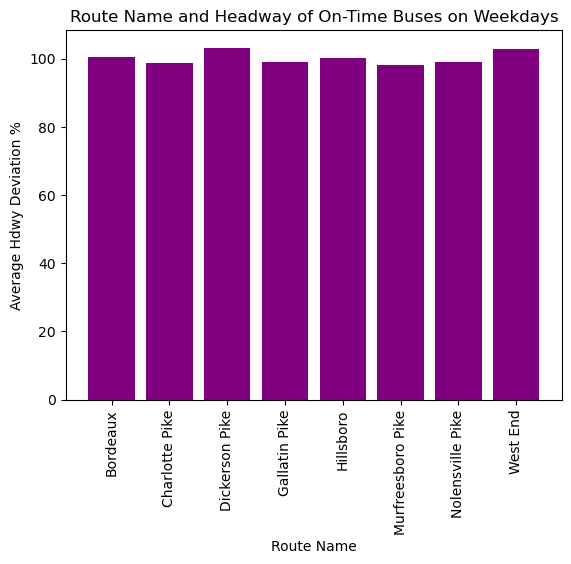

In [119]:
# color = ('blueviolet', 'silver', 'silver', 'silver', 'silver', 'silver', 'silver', 'silver')
color = ('blue', 'pink', 'green', 'yellow', 'orange', 'purple', 'black', 'red')

plt.bar(avg_hdwy_per_route_name_on_time_wkdy['ROUTE_NAME'],
        avg_hdwy_per_route_name_on_time_wkdy['HDWY_DEVIATION_PERC'], 
        color = 'purple')
plt.xticks(rotation = 90)
plt.title('Route Name and Headway of On-Time Buses on Weekdays')
plt.xlabel("Route Name")
plt.ylabel("Average Hdwy Deviation %")
plt.show()

# this chart shows the average headway per route name for WEEKDAY    blueviolet

In [78]:
on_time_saturday = filtered_cols_for_q_3[
    (filtered_cols_for_q_3['ADJUSTED_ONTIME_COUNT'] == 1)
    & (filtered_cols_for_q_3['DAY_OF_WEEK'] == 'Saturday')
]
    
on_time_saturday 

,DAY_OF_WEEK,ROUTE_NAME,ADHERENCE_ID,DATE,TIME_POINT_ABBR,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,SCHEDULED_HDWY,ACTUAL_HDWY,ADJUSTED_ONTIME_COUNT,ADHERENCE,HDWY_DEVIATION_PERC
25851,Saturday,Bordeaux,99581540,2023-08-05,MCC5_10,2023-08-05 06:15:00,2023-08-05 05:58:18,2023-08-05 06:16:22,60.0,60.866666,1,-1.366666,101.444443
25858,Saturday,Bordeaux,99581547,2023-08-05,MCC5_10,2023-08-05 07:15:00,2023-08-05 07:05:54,2023-08-05 07:15:30,30.0,27.550000,1,-0.500000,91.833333
25864,Saturday,Bordeaux,99581553,2023-08-05,MCC5_10,2023-08-05 08:15:00,2023-08-05 08:09:46,2023-08-05 08:18:04,30.0,28.383333,1,-3.066666,94.611110
25867,Saturday,Bordeaux,99581556,2023-08-05,MHSP,2023-08-05 08:45:00,2023-08-05 08:36:33,2023-08-05 08:48:41,60.0,56.950000,1,-3.683333,94.916667
25870,Saturday,Bordeaux,99581559,2023-08-05,MCC5_10,2023-08-05 09:15:00,2023-08-05 09:05:52,2023-08-05 09:16:24,30.0,27.266666,1,-1.400000,90.888887
...,...,...,...,...,...,...,...,...,...,...,...,...,...
350299,Saturday,Hillsboro,100406585,2023-09-30,HBHS,2023-09-30 17:06:00,2023-09-30 16:54:27,2023-09-30 17:08:59,30.0,32.400000,1,-2.983333,108.000000
350305,Saturday,Hillsboro,100406591,2023-09-30,HBHS,2023-09-30 18:37:00,2023-09-30 18:35:37,2023-09-30 18:40:03,30.0,29.800000,1,-3.050000,99.333333
350308,Saturday,Hillsboro,100406594,2023-09-30,MCC5_9,2023-09-30 19:15:00,2023-09-30 19:06:51,2023-09-30 19:19:03,30.0,28.350000,1,-4.050000,94.500000
350311,Saturday,Hillsboro,100406597,2023-09-30,HBHS,2023-09-30 20:11:00,2023-09-30 19:51:06,2023-09-30 20:12:40,30.0,30.433333,1,-1.666666,101.444443


In [79]:
shortened_df_on_time_saturday = on_time_saturday.loc[:, ['ROUTE_NAME', 'HDWY_DEVIATION_PERC']]
shortened_df_on_time_saturday

,ROUTE_NAME,HDWY_DEVIATION_PERC
25851,Bordeaux,101.444443
25858,Bordeaux,91.833333
25864,Bordeaux,94.611110
25867,Bordeaux,94.916667
25870,Bordeaux,90.888887
...,...,...
350299,Hillsboro,108.000000
350305,Hillsboro,99.333333
350308,Hillsboro,94.500000
350311,Hillsboro,101.444443


In [80]:
avg_hdwy_per_route_name_on_time_saturday = shortened_df_on_time_saturday.groupby('ROUTE_NAME')['HDWY_DEVIATION_PERC'].mean().reset_index()
avg_hdwy_per_route_name_on_time_saturday

avg_hdwy_per_route_name_on_time_saturday.rename(columns = {'ACTUAL_HDWY' : 'AVG_HDWY'})

,ROUTE_NAME,HDWY_DEVIATION_PERC
0,Bordeaux,99.845984
1,Charlotte Pike,98.323143
2,Dickerson Pike,101.128979
3,Gallatin Pike,98.448294
4,Hillsboro,99.358123
5,Murfreesboro Pike,97.038006
6,Nolensville Pike,100.201150
7,West End,99.079273


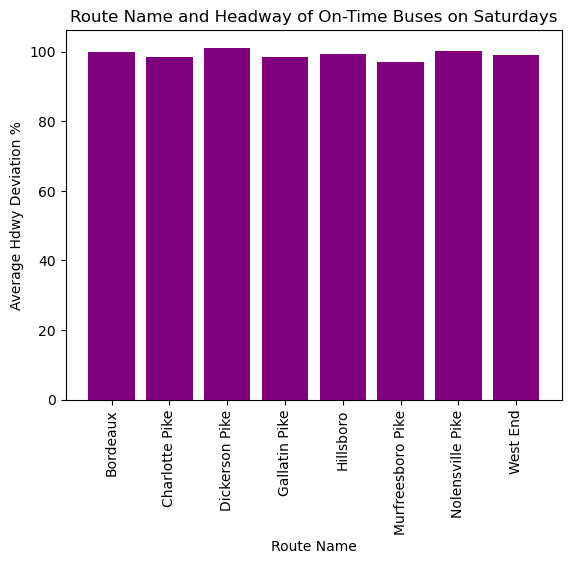

In [121]:
# color = ('blueviolet', 'silver', 'silver', 'silver', 'silver', 'silver', 'silver', 'silver')
# color = ('blue', 'pink', 'green', 'yellow', 'orange', 'purple', 'black', 'red')

plt.bar(avg_hdwy_per_route_name_on_time_saturday['ROUTE_NAME'], avg_hdwy_per_route_name_on_time_saturday['HDWY_DEVIATION_PERC'], color = 'purple')
plt.xticks(rotation = 90)
plt.title('Route Name and Headway of On-Time Buses on Saturdays')
plt.xlabel("Route Name")
plt.ylabel("Average Hdwy Deviation %")
plt.show()

# this chart shows the average headway per route name for SATURDAY

In [82]:
on_time_sunday = filtered_cols_for_q_3[
    (filtered_cols_for_q_3['ADJUSTED_ONTIME_COUNT'] == 1)
    & (filtered_cols_for_q_3['DAY_OF_WEEK'] == 'Sunday')
]
on_time_sunday   # these are all the on-time buses on a SUNDAY

,DAY_OF_WEEK,ROUTE_NAME,ADHERENCE_ID,DATE,TIME_POINT_ABBR,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,SCHEDULED_HDWY,ACTUAL_HDWY,ADJUSTED_ONTIME_COUNT,ADHERENCE,HDWY_DEVIATION_PERC
30011,Sunday,Bordeaux,99601440,2023-08-06,MHSP,2023-08-06 06:47:00,2023-08-06 06:34:12,2023-08-06 06:48:06,30.0,28.866666,1,-1.100000,96.222220
30014,Sunday,Bordeaux,99601443,2023-08-06,MCC5_10,2023-08-06 07:15:00,2023-08-06 07:06:13,2023-08-06 07:20:42,30.0,33.900000,1,-5.700000,113.000000
30025,Sunday,Bordeaux,99601460,2023-08-06,CLFF,2023-08-06 09:31:00,2023-08-06 09:36:49,2023-08-06 09:36:49,60.0,66.433333,1,-5.816666,110.722222
30033,Sunday,Bordeaux,99601474,2023-08-06,CLFF,2023-08-06 11:31:00,2023-08-06 11:33:40,2023-08-06 11:33:40,60.0,60.500000,1,-2.666666,100.833333
30043,Sunday,Bordeaux,99601490,2023-08-06,YGKG,2023-08-06 13:48:00,2023-08-06 13:51:25,2023-08-06 13:51:25,60.0,61.566666,1,-3.416666,102.611110
...,...,...,...,...,...,...,...,...,...,...,...,...,...
313618,Sunday,Hillsboro,100220710,2023-09-24,HBHS,2023-09-24 15:36:00,2023-09-24 15:29:08,2023-09-24 15:40:58,30.0,32.433333,1,-4.966666,108.111110
313624,Sunday,Hillsboro,100220716,2023-09-24,HBHS,2023-09-24 17:06:00,2023-09-24 16:54:16,2023-09-24 17:07:03,30.0,29.583333,1,-1.050000,98.611110
313630,Sunday,Hillsboro,100220722,2023-09-24,HBHS,2023-09-24 18:37:00,2023-09-24 18:24:50,2023-09-24 18:39:36,30.0,31.900000,1,-2.600000,106.333333
313636,Sunday,Hillsboro,100220728,2023-09-24,HBHS,2023-09-24 20:11:00,2023-09-24 20:09:45,2023-09-24 20:12:21,30.0,27.933333,1,-1.350000,93.111110


In [83]:
shortened_df_on_time_sunday = on_time_sunday.loc[:, ['ROUTE_NAME', 'HDWY_DEVIATION_PERC']]
shortened_df_on_time_sunday

,ROUTE_NAME,HDWY_DEVIATION_PERC
30011,Bordeaux,96.222220
30014,Bordeaux,113.000000
30025,Bordeaux,110.722222
30033,Bordeaux,100.833333
30043,Bordeaux,102.611110
...,...,...
313618,Hillsboro,108.111110
313624,Hillsboro,98.611110
313630,Hillsboro,106.333333
313636,Hillsboro,93.111110


In [84]:
avg_hdwy_per_route_name_on_time_sunday = shortened_df_on_time_sunday.groupby('ROUTE_NAME')['HDWY_DEVIATION_PERC'].mean().reset_index()
avg_hdwy_per_route_name_on_time_sunday

avg_hdwy_per_route_name_on_time_sunday.rename(columns = {'ACTUAL_HDWY' : 'AVG_HDWY'})

,ROUTE_NAME,HDWY_DEVIATION_PERC
0,Bordeaux,102.911740
1,Charlotte Pike,98.600985
2,Dickerson Pike,116.390800
3,Gallatin Pike,99.631948
4,Hillsboro,99.721450
5,Murfreesboro Pike,97.665957
6,Nolensville Pike,98.871462
7,West End,102.916729


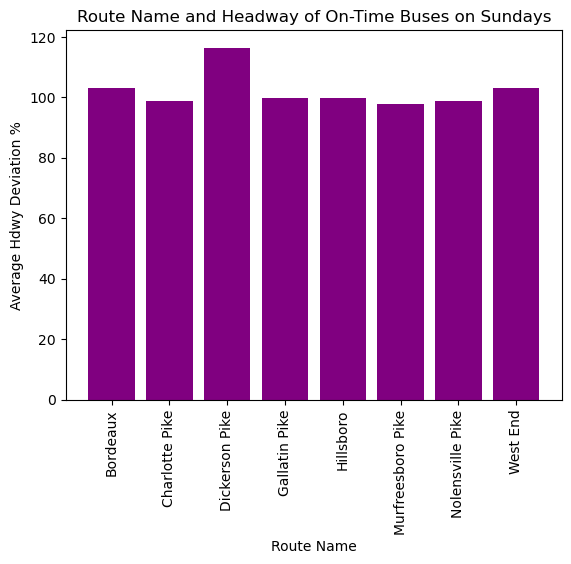

In [122]:
# color = ('blueviolet', 'silver', 'silver', 'silver', 'silver', 'silver', 'silver', 'silver')
color = ('blue', 'pink', 'green', 'yellow', 'orange', 'purple', 'black', 'red')

plt.bar(avg_hdwy_per_route_name_on_time_sunday['ROUTE_NAME'], avg_hdwy_per_route_name_on_time_sunday['HDWY_DEVIATION_PERC'], color = 'purple')
plt.xticks(rotation = 90)
plt.title('Route Name and Headway of On-Time Buses on Sundays')
plt.xlabel("Route Name")
plt.ylabel("Average Hdwy Deviation %")
plt.show()

# this chart shows the average headway per route name for SATURDAY

In [86]:
# weekday_avg_headway_adherence = pd.DataFrame(filtered_cols_for_q_3[
#     filtered_cols_for_q_3['DAY_OF_WEEK'] == 'Weekday'].agg({'ACTUAL_HDWY' : 'mean', 'ADHERENCE' : 'mean'}))
# weekday_avg_headway_adherence

In [87]:
# Saturday_avg_headway_adherence = pd.DataFrame(filtered_cols_for_q_3[
#     filtered_cols_for_q_3['DAY_OF_WEEK'] == 'Saturday'].agg({'ACTUAL_HDWY' : 'mean', 'ADHERENCE' : 'mean'}))
# Saturday_avg_headway_adherence

In [88]:
# Sunday_avg_headway_adherence = pd.DataFrame(filtered_cols_for_q_3[
#     filtered_cols_for_q_3['DAY_OF_WEEK'] == 'Sunday'].agg({'ACTUAL_HDWY' : 'mean', 'ADHERENCE': 'mean'}))
# Sunday_avg_headway_adherence

In [89]:
day_of_week_on_time_buses = filtered_cols_for_q_3[filtered_cols_for_q_3['ADJUSTED_ONTIME_COUNT'] == 1]
day_of_week_on_time_buses

,DAY_OF_WEEK,ROUTE_NAME,ADHERENCE_ID,DATE,TIME_POINT_ABBR,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,SCHEDULED_HDWY,ACTUAL_HDWY,ADJUSTED_ONTIME_COUNT,ADHERENCE,HDWY_DEVIATION_PERC
7,Weekday,Bordeaux,99457897,2023-08-01,MHSP,2023-08-01 05:42:00,2023-08-01 05:30:30,2023-08-01 05:43:43,35.0,37.666666,1,-1.716666,107.619046
11,Weekday,Bordeaux,99457901,2023-08-01,MCC5_10,2023-08-01 06:15:00,2023-08-01 06:05:31,2023-08-01 06:16:19,15.0,12.833333,1,-1.316666,85.555553
14,Weekday,Bordeaux,99457904,2023-08-01,MHSP,2023-08-01 06:42:00,2023-08-01 06:30:59,2023-08-01 06:43:31,60.0,59.800000,1,-1.516666,99.666667
18,Weekday,Bordeaux,99457908,2023-08-01,MCC5_10,2023-08-01 07:15:00,2023-08-01 07:05:49,2023-08-01 07:16:44,15.0,15.233333,1,-1.733333,101.555553
22,Weekday,Bordeaux,99457912,2023-08-01,MHSP,2023-08-01 07:45:00,2023-08-01 07:34:00,2023-08-01 07:46:15,63.0,62.733333,1,-1.250000,99.576719
...,...,...,...,...,...,...,...,...,...,...,...,...,...
350299,Saturday,Hillsboro,100406585,2023-09-30,HBHS,2023-09-30 17:06:00,2023-09-30 16:54:27,2023-09-30 17:08:59,30.0,32.400000,1,-2.983333,108.000000
350305,Saturday,Hillsboro,100406591,2023-09-30,HBHS,2023-09-30 18:37:00,2023-09-30 18:35:37,2023-09-30 18:40:03,30.0,29.800000,1,-3.050000,99.333333
350308,Saturday,Hillsboro,100406594,2023-09-30,MCC5_9,2023-09-30 19:15:00,2023-09-30 19:06:51,2023-09-30 19:19:03,30.0,28.350000,1,-4.050000,94.500000
350311,Saturday,Hillsboro,100406597,2023-09-30,HBHS,2023-09-30 20:11:00,2023-09-30 19:51:06,2023-09-30 20:12:40,30.0,30.433333,1,-1.666666,101.444443


In [90]:
dict_for_route_names = {'HDWY_DEVIATION_PERC' : 'mean'}

all_routes_avg_hdwy_adherence = pd.DataFrame(day_of_week_on_time_buses.groupby(['ROUTE_NAME', 'DAY_OF_WEEK']).aggregate(dict_for_route_names)).reset_index().rename(
    columns = {'ROUTE_NAME' : 'Route Name', 'DAY_OF_WEEK' : 'Day of the Week', 'HDWY_DEVIATION_PERC' : 'Avg Hdwy Deviation Percentage'})

all_routes_avg_hdwy_adherence

,Route Name,Day of the Week,Avg Hdwy Deviation Percentage
0,Bordeaux,Saturday,99.845984
1,Bordeaux,Sunday,102.911740
2,Bordeaux,Weekday,100.578514
3,Charlotte Pike,Saturday,98.323143
4,Charlotte Pike,Sunday,98.600985
5,Charlotte Pike,Weekday,98.613048
6,Dickerson Pike,Saturday,101.128979
7,Dickerson Pike,Sunday,116.390800
8,Dickerson Pike,Weekday,103.212618
9,Gallatin Pike,Saturday,98.448294


In [91]:
route_names_needed = day_of_week_on_time_buses['ROUTE_NAME'].sort_values().unique().tolist()
route_names_needed

['Bordeaux',
 'Charlotte Pike',
 'Dickerson Pike',
 'Gallatin Pike',
 'Hillsboro',
 'Murfreesboro Pike',
 'Nolensville Pike',
 'West End']

C:\Users\Barbie\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Barbie\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Barbie\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Barbie\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

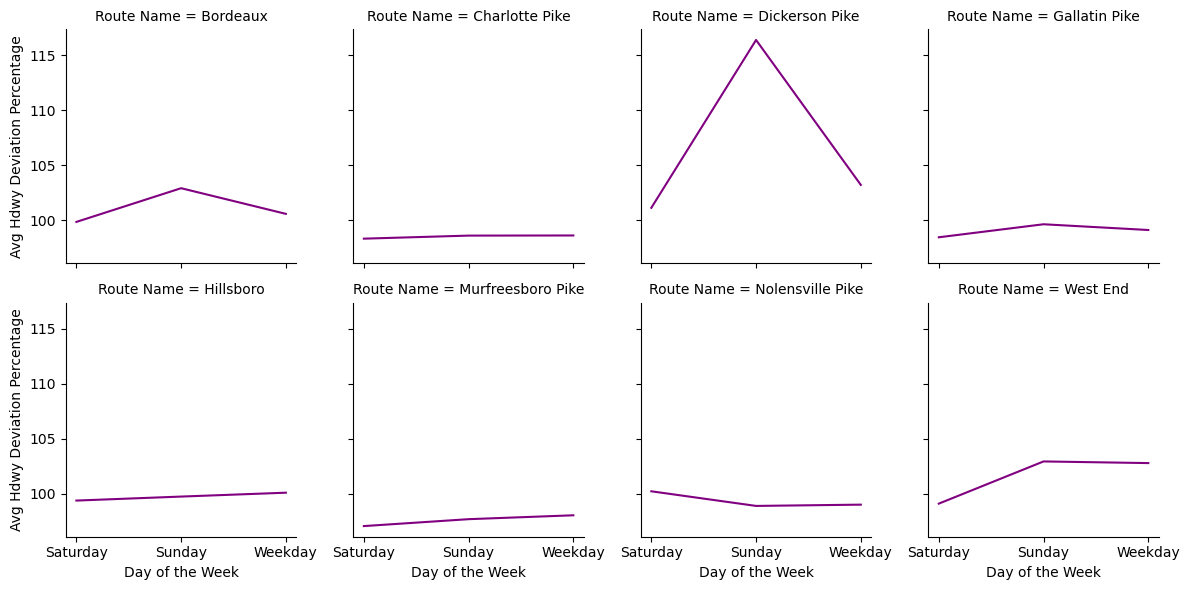

In [126]:
g = sns.FacetGrid(data = all_routes_avg_hdwy_adherence[all_routes_avg_hdwy_adherence['Route Name'].isin(route_names_needed)],
                  col = 'Route Name', col_wrap = 4)
g.map(sns.lineplot, 'Day of the Week', 'Avg Hdwy Deviation Percentage',  color = 'purple');

C:\Users\Barbie\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Barbie\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Average Deviation of On Time Buses')

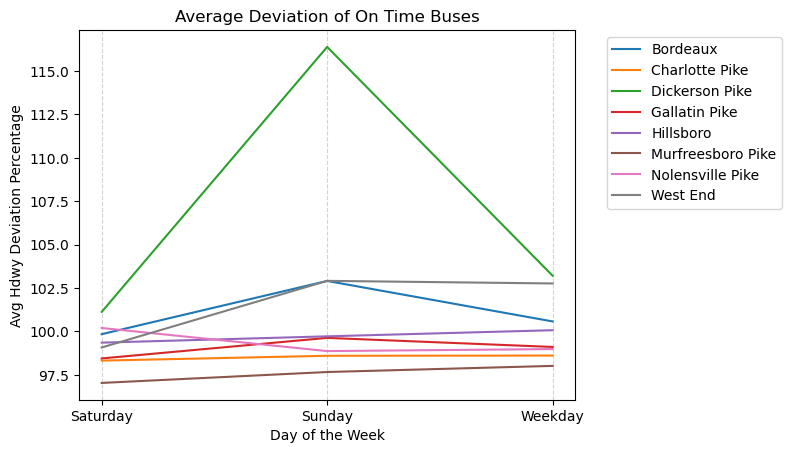

In [172]:
sns.lineplot(x = 'Day of the Week', y = 'Avg Hdwy Deviation Percentage', data = all_routes_avg_hdwy_adherence, hue = 'Route Name')
plt.grid(axis = 'x', color = 'lightgray', linestyle = '--')
plt.legend(bbox_to_anchor = (1.05, 1.0), loc = 'upper left')
plt.title('Average Deviation of On Time Buses')
# # plt.savefig('plot1.png')

# ## setting borders and labels white
# fig.spines['bottom'].set_color('white')
# fig.spines['top'].set_color('white')
# fig.xaxis.label.set_color('white')
# fig.tick_params(axis='x', colors='white')
# fig.yaxis.label.set_color('white')
# fig.tick_params(axis='y', colors='white')
# fig.title.set_color('white')

# # ### saving and making background transparent
# # plt.savefig('Time_of_Day.png', transparent = True)

In [173]:
day_of_week_on_time_buses.head()

,DAY_OF_WEEK,ROUTE_NAME,ADHERENCE_ID,DATE,TIME_POINT_ABBR,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,SCHEDULED_HDWY,ACTUAL_HDWY,ADJUSTED_ONTIME_COUNT,ADHERENCE,HDWY_DEVIATION_PERC
7,Weekday,Bordeaux,99457897,2023-08-01,MHSP,2023-08-01 05:42:00,2023-08-01 05:30:30,2023-08-01 05:43:43,35.0,37.666666,1,-1.716666,107.619046
11,Weekday,Bordeaux,99457901,2023-08-01,MCC5_10,2023-08-01 06:15:00,2023-08-01 06:05:31,2023-08-01 06:16:19,15.0,12.833333,1,-1.316666,85.555553
14,Weekday,Bordeaux,99457904,2023-08-01,MHSP,2023-08-01 06:42:00,2023-08-01 06:30:59,2023-08-01 06:43:31,60.0,59.800000,1,-1.516666,99.666667
18,Weekday,Bordeaux,99457908,2023-08-01,MCC5_10,2023-08-01 07:15:00,2023-08-01 07:05:49,2023-08-01 07:16:44,15.0,15.233333,1,-1.733333,101.555553
22,Weekday,Bordeaux,99457912,2023-08-01,MHSP,2023-08-01 07:45:00,2023-08-01 07:34:00,2023-08-01 07:46:15,63.0,62.733333,1,-1.250000,99.576719


In [182]:
avg_hdwy_perc_day_of_week = day_of_week_on_time_buses.groupby('DAY_OF_WEEK').agg({'HDWY_DEVIATION_PERC' : 'mean'}).reset_index().rename(
    columns = {'DAY_OF_WEEK' : 'Day of the Week', 'HDWY_DEVIATION_PERC' : 'Avg Hdwy Deviation %'})
avg_hdwy_perc_day_of_week

,Day of the Week,Avg Hdwy Deviation %
0,Saturday,99.054783
1,Sunday,101.691416
2,Weekday,100.135594


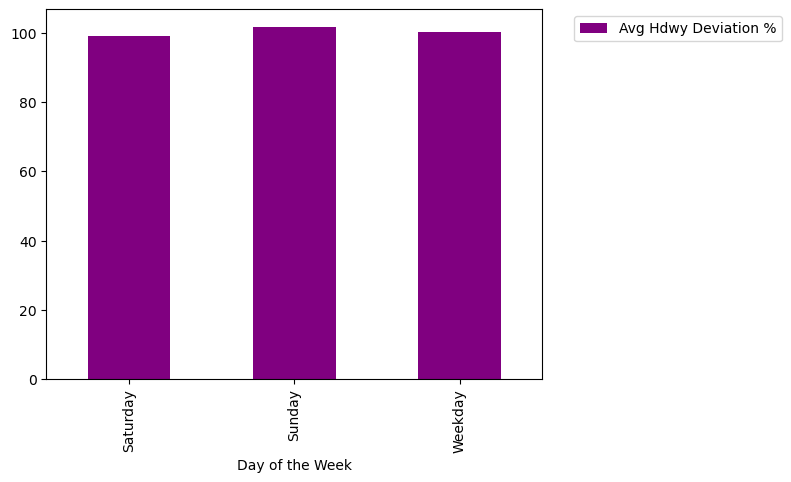

In [188]:
avg_hdwy_perc_day_of_week.plot(x = 'Day of the Week', y = 'Avg Hdwy Deviation %', kind = 'bar', color = 'purple')
plt.legend(bbox_to_anchor = (1.05, 1.0), loc = 'upper left')
# plt.grid(axis = 'x', color = 'lightgray', linestyle = '--')

In [93]:
func_dictionary_1 = {'ACTUAL_HDWY' : 'mean', 'ADHERENCE' : 'mean', 'HDWY_DEVIATION_PERC' : 'mean'}

avg_headway_day_of_week = pd.DataFrame(day_of_week_on_time_buses.groupby('DAY_OF_WEEK').aggregate(func_dictionary_1)).reset_index().rename(
    columns = {'DAY_OF_WEEK' : 'Day of the Week', 'ACTUAL_HDWY' : 'Average Headway',
               'ADHERENCE' : 'Average Adherence', 'HDWY_DEVIATION_PERC' : 'Average Headway Deviation %'})

avg_headway_day_of_week

,Day of the Week,Average Headway,Average Adherence,Average Headway Deviation %
0,Saturday,27.607474,-2.042083,99.054783
1,Sunday,28.539927,-1.938982,101.691416
2,Weekday,17.956737,-1.989311,100.135594


In [94]:
# WEEKDAY
# Headway... 17.95 mins in between buses on avg
# Adherence... 1.98 mins late on avg

# SATURDAY
# Headway... 27.60 in between buses on avg
# Adherence... 2.04 mins late on avg

#SUNDAY
# Headway... 28.53 in between buses on avg
# Adherence... 1.93 mins late on avg

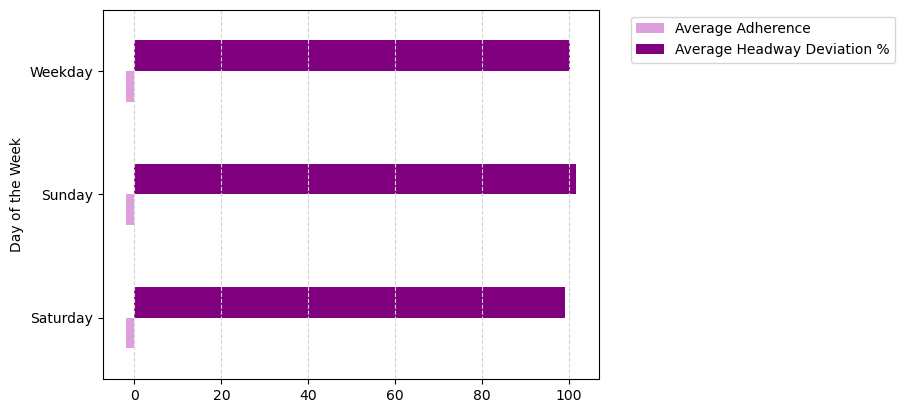

In [194]:
colors2 = ('plum', 'purple')

avg_headway_day_of_week.plot(x = 'Day of the Week', y = ['Average Adherence', 'Average Headway Deviation %'], 
                             kind = 'barh', color = colors2)
plt.legend(bbox_to_anchor = (1.05, 1.0), loc = 'upper left')
# plt.axhline(0, 100)
# plt.axvline(0)
plt.grid(axis = 'x', color = 'lightgray', linestyle = '--')
plt.show()

# 4. How much of a factor does the driver have on headway and on-time performance? The driver is indicated by the OPERATOR variable.

In [96]:
wego_trimmed.head()

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES,ROUTE_NAME,DAY_OF_WEEK,HDWY_DEVIATION_PERC
7,120230801,1,99457897,2023-08-01,22,2200,1040,345106,0,TO DOWNTOWN,MHSP,14.0,1,36.181248,-86.847705,2023-08-01 05:42:00,2023-08-01 05:30:30,2023-08-01 05:43:43,-1.716666,35.0,37.666666,2.666666,0,0,1,0,0.0,0,13.216666,10.0,Bordeaux,Weekday,107.619046
11,120230801,1,99457901,2023-08-01,22,2200,1040,345107,0,FROM DOWNTOWN,MCC5_10,1.0,1,36.167091,-86.781923,2023-08-01 06:15:00,2023-08-01 06:05:31,2023-08-01 06:16:19,-1.316666,15.0,12.833333,-2.166667,0,0,1,0,0.0,0,10.800000,5.0,Bordeaux,Weekday,85.555553
14,120230801,1,99457904,2023-08-01,22,2200,1040,345108,0,TO DOWNTOWN,MHSP,14.0,1,36.181248,-86.847705,2023-08-01 06:42:00,2023-08-01 06:30:59,2023-08-01 06:43:31,-1.516666,60.0,59.800000,-0.200000,0,0,1,0,0.0,0,12.533333,7.0,Bordeaux,Weekday,99.666667
18,120230801,1,99457908,2023-08-01,22,2200,1040,345109,0,FROM DOWNTOWN,MCC5_10,1.0,1,36.167091,-86.781923,2023-08-01 07:15:00,2023-08-01 07:05:49,2023-08-01 07:16:44,-1.733333,15.0,15.233333,0.233333,0,0,1,0,0.0,0,10.916666,5.0,Bordeaux,Weekday,101.555553
22,120230801,1,99457912,2023-08-01,22,2200,1040,345110,0,TO DOWNTOWN,MHSP,14.0,1,36.181248,-86.847705,2023-08-01 07:45:00,2023-08-01 07:34:00,2023-08-01 07:46:15,-1.250000,63.0,62.733333,-0.266667,0,0,1,0,0.0,0,12.250000,9.0,Bordeaux,Weekday,99.576719


In [97]:
wego_trimmed['OPERATOR'].nunique()

328

In [98]:
wego_trimmed['OPERATOR'].sort_values().unique().tolist()

[235,
 244,
 301,
 304,
 326,
 329,
 332,
 341,
 357,
 359,
 375,
 379,
 409,
 414,
 465,
 471,
 517,
 520,
 522,
 559,
 572,
 611,
 624,
 653,
 659,
 723,
 778,
 785,
 907,
 1016,
 1040,
 1052,
 1078,
 1133,
 1147,
 1170,
 1175,
 1177,
 1190,
 1198,
 1202,
 1204,
 1206,
 1208,
 1222,
 1237,
 1251,
 1266,
 1277,
 1305,
 1330,
 1343,
 1352,
 1359,
 1361,
 1362,
 1363,
 1368,
 1372,
 1379,
 1389,
 1391,
 1394,
 1401,
 1406,
 1410,
 1419,
 1457,
 1489,
 1500,
 1505,
 1524,
 1542,
 1566,
 1582,
 1590,
 1593,
 1596,
 1597,
 1598,
 1601,
 1603,
 1606,
 1617,
 1619,
 1621,
 1623,
 1650,
 1673,
 1682,
 1703,
 1705,
 1706,
 1713,
 1716,
 1717,
 1730,
 1736,
 1742,
 1743,
 1761,
 1762,
 1763,
 1780,
 1782,
 1788,
 1792,
 1797,
 1800,
 1814,
 1815,
 1823,
 1824,
 1838,
 1842,
 1845,
 1848,
 1865,
 1866,
 1867,
 1880,
 1889,
 1892,
 1893,
 1904,
 1914,
 1915,
 1922,
 1927,
 1938,
 1948,
 1958,
 1984,
 1992,
 1997,
 2001,
 2012,
 2029,
 2033,
 2040,
 2041,
 2053,
 2055,
 2059,
 2062,
 2082,
 2088,


In [99]:
within_good_range_hdwy_dev = on_time_buses[(on_time_buses['HDWY_DEVIATION_PERC'] < 150)
                                          & (on_time_buses['HDWY_DEVIATION_PERC'] > 50)]
within_good_range_hdwy_dev

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES,ROUTE_NAME,DAY_OF_WEEK,HDWY_DEVIATION_PERC
7,120230801,1,99457897,2023-08-01,22,2200,1040,345106,0,TO DOWNTOWN,MHSP,14.0,1,36.181248,-86.847705,2023-08-01 05:42:00,2023-08-01 05:30:30,2023-08-01 05:43:43,-1.716666,35.0,37.666666,2.666666,0,0,1,0,0.0,0,13.216666,10.0,Bordeaux,Weekday,107.619046
11,120230801,1,99457901,2023-08-01,22,2200,1040,345107,0,FROM DOWNTOWN,MCC5_10,1.0,1,36.167091,-86.781923,2023-08-01 06:15:00,2023-08-01 06:05:31,2023-08-01 06:16:19,-1.316666,15.0,12.833333,-2.166667,0,0,1,0,0.0,0,10.800000,5.0,Bordeaux,Weekday,85.555553
14,120230801,1,99457904,2023-08-01,22,2200,1040,345108,0,TO DOWNTOWN,MHSP,14.0,1,36.181248,-86.847705,2023-08-01 06:42:00,2023-08-01 06:30:59,2023-08-01 06:43:31,-1.516666,60.0,59.800000,-0.200000,0,0,1,0,0.0,0,12.533333,7.0,Bordeaux,Weekday,99.666667
18,120230801,1,99457908,2023-08-01,22,2200,1040,345109,0,FROM DOWNTOWN,MCC5_10,1.0,1,36.167091,-86.781923,2023-08-01 07:15:00,2023-08-01 07:05:49,2023-08-01 07:16:44,-1.733333,15.0,15.233333,0.233333,0,0,1,0,0.0,0,10.916666,5.0,Bordeaux,Weekday,101.555553
22,120230801,1,99457912,2023-08-01,22,2200,1040,345110,0,TO DOWNTOWN,MHSP,14.0,1,36.181248,-86.847705,2023-08-01 07:45:00,2023-08-01 07:34:00,2023-08-01 07:46:15,-1.250000,63.0,62.733333,-0.266667,0,0,1,0,0.0,0,12.250000,9.0,Bordeaux,Weekday,99.576719
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350299,120230930,2,100406585,2023-09-30,7,702,2312,353440,0,TO DOWNTOWN,HBHS,5.0,1,36.107575,-86.812719,2023-09-30 17:06:00,2023-09-30 16:54:27,2023-09-30 17:08:59,-2.983333,30.0,32.400000,2.400000,0,0,1,0,0.0,0,14.533333,19.0,Hillsboro,Saturday,108.000000
350305,120230930,2,100406591,2023-09-30,7,702,2312,353442,0,TO DOWNTOWN,HBHS,5.0,1,36.107575,-86.812719,2023-09-30 18:37:00,2023-09-30 18:35:37,2023-09-30 18:40:03,-3.050000,30.0,29.800000,-0.200000,0,0,1,0,0.0,0,4.433333,20.0,Hillsboro,Saturday,99.333333
350308,120230930,2,100406594,2023-09-30,7,702,2312,353443,0,FROM DOWNTOWN,MCC5_9,3.0,1,36.167091,-86.781923,2023-09-30 19:15:00,2023-09-30 19:06:51,2023-09-30 19:19:03,-4.050000,30.0,28.350000,-1.650000,0,0,1,0,0.0,0,12.200000,12.0,Hillsboro,Saturday,94.500000
350311,120230930,2,100406597,2023-09-30,7,702,2312,353444,0,TO DOWNTOWN,HBHS,5.0,1,36.107575,-86.812719,2023-09-30 20:11:00,2023-09-30 19:51:06,2023-09-30 20:12:40,-1.666666,30.0,30.433333,0.433333,0,0,1,0,0.0,0,21.566666,25.0,Hillsboro,Saturday,101.444443


In [234]:
within_good_range_hdwy_dev.describe()

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES,HDWY_DEVIATION_PERC
count,4.453400e+04,44534.000000,4.453400e+04,44534.000000,44534.000000,44534.000000,44534.000000,44534.000000,44534.000000,44534.0,44534.000000,44534.000000,44534.000000,44534.000000,44534.000000,44534.000000,44534.0,44534.0,44534.0,44534.000000,44534.000000,44534.0,44534.000000,44534.000000,44534.000000
mean,1.202309e+08,1.300198,1.001077e+08,35.705798,3575.838618,1905.445929,351517.604886,0.000449,6.945435,1.0,36.161105,-86.777539,-1.988745,20.214016,19.941598,-0.272418,0.0,0.0,1.0,0.010778,0.011991,0.0,14.241848,12.894912,98.670161
std,5.059266e+01,0.634838,3.229062e+05,20.395293,2039.226015,767.730302,1570.191617,0.023210,4.462383,0.0,0.064671,0.068214,1.559321,10.834731,11.004821,2.510780,0.0,0.0,0.0,0.103259,0.108845,0.0,6.822850,6.534910,15.478609
min,1.202308e+08,1.000000,9.945790e+07,3.000000,300.000000,235.000000,345106.000000,0.000000,1.000000,1.0,36.048934,-86.955657,-5.983333,2.000000,1.333333,-24.250000,0.0,0.0,1.0,0.000000,0.000000,0.0,0.000000,0.000000,50.083330
25%,1.202308e+08,1.000000,9.989134e+07,22.000000,2201.000000,1368.000000,350447.000000,0.000000,3.000000,1.0,36.132451,-86.781923,-3.000000,12.000000,11.783333,-1.633334,0.0,0.0,1.0,0.000000,0.000000,0.0,9.833333,10.000000,90.972218
50%,1.202308e+08,1.000000,1.001373e+08,50.000000,5002.000000,1927.000000,351880.000000,0.000000,6.000000,1.0,36.167091,-86.781923,-1.800000,19.000000,17.116666,-0.100000,0.0,0.0,1.0,0.000000,0.000000,0.0,13.566666,10.000000,99.500000
75%,1.202309e+08,1.000000,1.003488e+08,55.000000,5503.000000,2547.000000,352683.000000,0.000000,11.000000,1.0,36.167091,-86.760509,-0.833333,25.000000,25.433333,1.283333,0.0,0.0,1.0,0.000000,0.000000,0.0,17.616666,16.000000,106.888887
max,1.202309e+08,3.000000,1.007010e+08,56.000000,5611.000000,3173.000000,353533.000000,2.000000,17.000000,1.0,36.300470,-86.654878,0.983333,68.000000,72.633333,22.633333,0.0,0.0,1.0,1.000000,1.000000,0.0,52.233333,118.000000,149.861108


In [100]:
below_50_perc_dev = late_buses[late_buses['HDWY_DEVIATION_PERC'] < 50]
below_50_perc_dev

above_150_perc_dev = late_buses[late_buses['HDWY_DEVIATION_PERC'] > 150]
above_150_perc_dev

combined_out_of_range_hdwy_dev = pd.concat([below_50_perc_dev, above_150_perc_dev])
combined_out_of_range_hdwy_dev

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES,ROUTE_NAME,DAY_OF_WEEK,HDWY_DEVIATION_PERC
2210,120230801,1,99461226,2023-08-01,50,5000,1619,346818,0,TO DOWNTOWN,WALM,17.0,1,36.132451,-86.907214,2023-08-01 15:12:00,2023-08-01 14:51:14,2023-08-01 15:13:57,-1.950000,15.0,5.416666,-9.583334,0,0,1,0,0.0,0,22.716666,20.0,Charlotte Pike,Weekday,36.111107
2995,120230801,1,99462027,2023-08-01,52,5201,522,347167,0,FROM DOWNTOWN,MCC4_19,2.0,1,36.167091,-86.781923,2023-08-01 07:15:00,2023-08-01 07:09:48,2023-08-01 07:15:40,-0.666666,10.0,4.716666,-5.283334,0,0,1,0,0.0,0,5.866666,5.0,Nolensville Pike,Weekday,47.166660
3045,120230801,1,99462077,2023-08-01,52,5201,1904,347177,0,FROM DOWNTOWN,MCC4_19,2.0,1,36.167091,-86.781923,2023-08-01 16:35:00,2023-08-01 16:40:31,2023-08-01 16:59:46,-24.766666,12.0,0.266666,-11.733334,0,1,0,0,0.0,0,19.250000,10.0,Nolensville Pike,Weekday,2.222217
3247,120230801,1,99462285,2023-08-01,52,5204,1542,347287,0,FROM DOWNTOWN,MCC4_19,2.0,1,36.167091,-86.781923,2023-08-01 15:10:00,2023-08-01 17:06:18,2023-08-01 17:06:18,-116.300000,10.0,0.833333,-9.166667,0,1,0,0,0.0,0,0.000000,10.0,Nolensville Pike,Weekday,8.333330
3262,120230801,1,99462300,2023-08-01,52,5204,1542,347290,0,TO DOWNTOWN,HCKP,9.0,1,36.048934,-86.713854,2023-08-01 18:22:00,2023-08-01 18:22:33,2023-08-01 18:22:33,-0.550000,32.0,13.350000,-18.650000,0,0,1,0,0.0,0,0.000000,18.0,Nolensville Pike,Weekday,41.718750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
348772,120230930,2,100404824,2023-09-30,55,5500,2040,352342,0,FROM DOWNTOWN,MCC4_15,5.0,1,36.167091,-86.781923,2023-09-30 15:00:00,2023-09-30 14:53:53,2023-09-30 15:08:07,-8.116666,15.0,22.633333,7.633333,0,1,0,0,0.0,0,14.233333,10.0,Murfreesboro Pike,Saturday,150.888887
348928,120230930,2,100404982,2023-09-30,55,5501,2138,352400,0,FROM DOWNTOWN,MCC4_15,5.0,1,36.167091,-86.781923,2023-09-30 22:45:00,2023-09-30 23:01:19,2023-09-30 23:06:34,-21.566666,30.0,50.400000,20.400000,0,1,0,0,0.0,0,5.250000,10.0,Murfreesboro Pike,Saturday,168.000000
349060,120230930,2,100405118,2023-09-30,55,5503,1650,352484,0,FROM DOWNTOWN,MCC4_15,5.0,1,36.167091,-86.781923,2023-09-30 12:45:00,2023-09-30 12:41:55,2023-09-30 12:51:04,-6.066666,15.0,28.333333,13.333333,0,1,0,0,0.0,0,9.150000,10.0,Murfreesboro Pike,Saturday,188.888887
349539,120230930,2,100405609,2023-09-30,56,5600,1593,352756,0,FROM DOWNTOWN,MCC4_18,6.0,1,36.167091,-86.781923,2023-09-30 13:55:00,2023-09-30 13:55:08,2023-09-30 14:12:06,-17.100000,20.0,34.433333,14.433333,0,1,0,0,0.0,0,16.966666,10.0,Gallatin Pike,Saturday,172.166665


In [241]:
top_10_on_time_drivers = within_good_range_hdwy_dev['OPERATOR'].value_counts().reset_index().rename(
    columns= {'OPERATOR' : 'Operator', 'count' : 'Total Routes'}).head(10)
top_10_on_time_drivers

,Operator,Total Routes
0,1762,681
1,1761,574
2,1170,443
3,379,432
4,1040,430
5,1266,396
6,2424,372
7,2164,371
8,1133,370
9,409,368


In [240]:
top_10_on_time_drivers.describe()   # 55 to 198 range  - filter out anything below 55 trips

,Operator,Total Routes
count,327.000000,327.000000
mean,2095.740061,136.189602
std,761.334578,107.261338
min,235.000000,1.000000
25%,1604.500000,55.000000
50%,2217.000000,119.000000
75%,2672.000000,198.500000
max,3173.000000,681.000000


In [237]:
bottom_10_late_drivers = combined_out_of_range_hdwy_dev['OPERATOR'].value_counts().reset_index().rename(
    columns= {'OPERATOR' : 'Operator', 'count' : 'Total Routes'}).head(10)
bottom_10_late_drivers

,Operator,Total Routes
0,1359,62
1,2109,58
2,1800,57
3,2082,54
4,1823,50
5,1361,49
6,1590,47
7,379,46
8,3096,44
9,1904,42


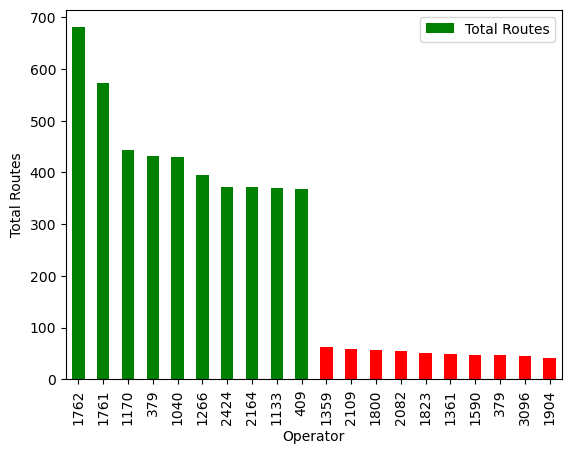

In [197]:
filtered_driver_df = pd.concat([top_10_on_time_drivers, bottom_10_late_drivers])
filtered_driver_df

colors2 = ('green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green',
           
           'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red')

# filtered_driver_df.sort_values(by = ['Total Routes'], inplace = True)
# filtered_driver_df.reset_index(drop = True, inplace = True)

filtered_driver_df.plot(x = 'Operator', y = 'Total Routes', kind = 'bar', color = colors2)
plt.xticks(rotation=90) 
plt.xlabel("Operator")
plt.ylabel("Total Routes")
plt.show()

In [256]:
# top_10_on_time2 = within_good_range_hdwy_dev.value_counts().head(10).reset_index()

top_10_on_time2 = within_good_range_hdwy_dev['OPERATOR'].value_counts().reset_index().rename(
    columns= {'OPERATOR' : 'Operator', 'count' : 'Total Routes'}).head(10)

# bottom_10_on_time2 = within_good_range_hdwy_dev.tail(10)

In [257]:
top_10_on_time2

,Operator,Total Routes
0,1762,681
1,1761,574
2,1170,443
3,379,432
4,1040,430
5,1266,396
6,2424,372
7,2164,371
8,1133,370
9,409,368


In [258]:
all_operators_total_routes = within_good_range_hdwy_dev['OPERATOR'].value_counts().reset_index().rename(
     columns= {'OPERATOR' : 'Operator', 'count' : 'Total Routes'})

In [259]:
all_operators_total_routes    # try to combine with calendar id and trip id

,Operator,Total Routes
0,1762,681
1,1761,574
2,1170,443
3,379,432
4,1040,430
...,...,...
322,1880,1
323,2094,1
324,2309,1
325,375,1


In [260]:
filtered_top_bottom_on_time_operators = all_operators_total_routes[all_operators_total_routes['Total Routes'] > 55]
filtered_top_bottom_on_time_operators   # 55 to 198 range

,Operator,Total Routes
0,1762,681
1,1761,574
2,1170,443
3,379,432
4,1040,430
...,...,...
239,2102,61
240,2586,60
241,3096,58
242,2669,57


In [261]:
filtered_top_10_on_time = filtered_top_bottom_on_time_operators.head(10)
filtered_top_10_on_time

,Operator,Total Routes
0,1762,681
1,1761,574
2,1170,443
3,379,432
4,1040,430
5,1266,396
6,2424,372
7,2164,371
8,1133,370
9,409,368


In [262]:
filterd_bottom_10_on_time = filtered_top_bottom_on_time_operators.tail(10)
filterd_bottom_10_on_time

,Operator,Total Routes
234,907,65
235,2817,63
236,2714,62
237,1524,62
238,2751,62
239,2102,61
240,2586,60
241,3096,58
242,2669,57
243,3120,56


In [263]:
only_on_time_top10_bottom10 = pd.concat([filtered_top_10_on_time, filterd_bottom_10_on_time])
only_on_time_top10_bottom10

,Operator,Total Routes
0,1762,681
1,1761,574
2,1170,443
3,379,432
4,1040,430
5,1266,396
6,2424,372
7,2164,371
8,1133,370
9,409,368


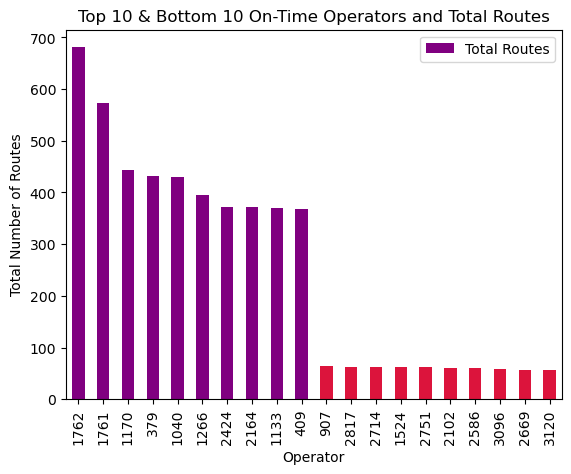

In [277]:
colors_for_only_on_time_top10_bottom10 = ('purple', 'purple','purple','purple','purple','purple','purple','purple','purple',
                                         'purple', 'crimson', 'crimson',  'crimson', 'crimson', 'crimson', 'crimson',
                                          'crimson', 'crimson', 'crimson', 'crimson',)

only_on_time_top10_bottom10.plot(x = 'Operator', y = 'Total Routes', 
                                 kind = 'bar', color = colors_for_only_on_time_top10_bottom10)
plt.title('Top 10 & Bottom 10 On-Time Operators and Total Routes')
plt.ylabel('Total Number of Routes')
plt.show()

In [280]:
wego_trimmed['calender_trip_ID'] = wego_trimmed['TRIP_ID'].astype(str) + wego_trimmed['CALENDAR_ID'].astype(str)
wego_trimmed
grouped_operator = wego_trimmed.groupby('OPERATOR').agg(unique_trips = ('calender_trip_ID', 'count')).reset_index()
grouped_operator.sort_values('unique_trips', ascending = True).tail(60)

C:\Users\Barbie\AppData\Local\Temp\ipykernel_8424\3665048564.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wego_trimmed['calender_trip_ID'] = wego_trimmed['TRIP_ID'].astype(str) + wego_trimmed['CALENDAR_ID'].astype(str)


,OPERATOR,unique_trips
7,341,277
51,1343,277
271,2832,279
108,1800,282
133,1992,284
19,559,287
58,1372,289
112,1824,290
18,522,291
293,3031,291


In [281]:
grouped_operator.describe()

,OPERATOR,unique_trips
count,328.000000,328.000000
mean,2096.667683,160.265244
std,760.355186,120.496728
min,235.000000,1.000000
25%,1605.250000,65.750000
50%,2219.000000,143.500000
75%,2670.500000,238.250000
max,3173.000000,723.000000


# 5. Is there any relationship between lateness (ADHERENCE) and headway deviation?

In [104]:
# lateness = 6 mins late (-6)

In [105]:
late_buses.head()

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES,ROUTE_NAME,DAY_OF_WEEK,HDWY_DEVIATION_PERC
7,120230801,1,99457897,2023-08-01,22,2200,1040,345106,0,TO DOWNTOWN,MHSP,14.0,1,36.181248,-86.847705,2023-08-01 05:42:00,2023-08-01 05:30:30,2023-08-01 05:43:43,-1.716666,35.0,37.666666,2.666666,0,0,1,0,0.0,0,13.216666,10.0,Bordeaux,Weekday,107.619046
11,120230801,1,99457901,2023-08-01,22,2200,1040,345107,0,FROM DOWNTOWN,MCC5_10,1.0,1,36.167091,-86.781923,2023-08-01 06:15:00,2023-08-01 06:05:31,2023-08-01 06:16:19,-1.316666,15.0,12.833333,-2.166667,0,0,1,0,0.0,0,10.800000,5.0,Bordeaux,Weekday,85.555553
14,120230801,1,99457904,2023-08-01,22,2200,1040,345108,0,TO DOWNTOWN,MHSP,14.0,1,36.181248,-86.847705,2023-08-01 06:42:00,2023-08-01 06:30:59,2023-08-01 06:43:31,-1.516666,60.0,59.800000,-0.200000,0,0,1,0,0.0,0,12.533333,7.0,Bordeaux,Weekday,99.666667
18,120230801,1,99457908,2023-08-01,22,2200,1040,345109,0,FROM DOWNTOWN,MCC5_10,1.0,1,36.167091,-86.781923,2023-08-01 07:15:00,2023-08-01 07:05:49,2023-08-01 07:16:44,-1.733333,15.0,15.233333,0.233333,0,0,1,0,0.0,0,10.916666,5.0,Bordeaux,Weekday,101.555553
22,120230801,1,99457912,2023-08-01,22,2200,1040,345110,0,TO DOWNTOWN,MHSP,14.0,1,36.181248,-86.847705,2023-08-01 07:45:00,2023-08-01 07:34:00,2023-08-01 07:46:15,-1.250000,63.0,62.733333,-0.266667,0,0,1,0,0.0,0,12.250000,9.0,Bordeaux,Weekday,99.576719


In [106]:
late_buses['HDWY_DEVIATION_PERC'].agg('mean')  # average Dev Perc for late buses

104.16542436889344

# 6. How much impact does being late or too spaced out at the first stop have downstream? (if we start out late, does it get worse/better/same? any pattern as we move along a route?)

In [107]:
first_stop_trips = wego_trimmed[wego_trimmed['TRIP_EDGE'] == 1]
first_stop_trips

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES,ROUTE_NAME,DAY_OF_WEEK,HDWY_DEVIATION_PERC
7,120230801,1,99457897,2023-08-01,22,2200,1040,345106,0,TO DOWNTOWN,MHSP,14.0,1,36.181248,-86.847705,2023-08-01 05:42:00,2023-08-01 05:30:30,2023-08-01 05:43:43,-1.716666,35.0,37.666666,2.666666,0,0,1,0,0.0,0,13.216666,10.0,Bordeaux,Weekday,107.619046
11,120230801,1,99457901,2023-08-01,22,2200,1040,345107,0,FROM DOWNTOWN,MCC5_10,1.0,1,36.167091,-86.781923,2023-08-01 06:15:00,2023-08-01 06:05:31,2023-08-01 06:16:19,-1.316666,15.0,12.833333,-2.166667,0,0,1,0,0.0,0,10.800000,5.0,Bordeaux,Weekday,85.555553
14,120230801,1,99457904,2023-08-01,22,2200,1040,345108,0,TO DOWNTOWN,MHSP,14.0,1,36.181248,-86.847705,2023-08-01 06:42:00,2023-08-01 06:30:59,2023-08-01 06:43:31,-1.516666,60.0,59.800000,-0.200000,0,0,1,0,0.0,0,12.533333,7.0,Bordeaux,Weekday,99.666667
18,120230801,1,99457908,2023-08-01,22,2200,1040,345109,0,FROM DOWNTOWN,MCC5_10,1.0,1,36.167091,-86.781923,2023-08-01 07:15:00,2023-08-01 07:05:49,2023-08-01 07:16:44,-1.733333,15.0,15.233333,0.233333,0,0,1,0,0.0,0,10.916666,5.0,Bordeaux,Weekday,101.555553
22,120230801,1,99457912,2023-08-01,22,2200,1040,345110,0,TO DOWNTOWN,MHSP,14.0,1,36.181248,-86.847705,2023-08-01 07:45:00,2023-08-01 07:34:00,2023-08-01 07:46:15,-1.250000,63.0,62.733333,-0.266667,0,0,1,0,0.0,0,12.250000,9.0,Bordeaux,Weekday,99.576719
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350305,120230930,2,100406591,2023-09-30,7,702,2312,353442,0,TO DOWNTOWN,HBHS,5.0,1,36.107575,-86.812719,2023-09-30 18:37:00,2023-09-30 18:35:37,2023-09-30 18:40:03,-3.050000,30.0,29.800000,-0.200000,0,0,1,0,0.0,0,4.433333,20.0,Hillsboro,Saturday,99.333333
350308,120230930,2,100406594,2023-09-30,7,702,2312,353443,0,FROM DOWNTOWN,MCC5_9,3.0,1,36.167091,-86.781923,2023-09-30 19:15:00,2023-09-30 19:06:51,2023-09-30 19:19:03,-4.050000,30.0,28.350000,-1.650000,0,0,1,0,0.0,0,12.200000,12.0,Hillsboro,Saturday,94.500000
350311,120230930,2,100406597,2023-09-30,7,702,2312,353444,0,TO DOWNTOWN,HBHS,5.0,1,36.107575,-86.812719,2023-09-30 20:11:00,2023-09-30 19:51:06,2023-09-30 20:12:40,-1.666666,30.0,30.433333,0.433333,0,0,1,0,0.0,0,21.566666,25.0,Hillsboro,Saturday,101.444443
350317,120230930,2,100406603,2023-09-30,7,702,2312,353446,0,TO DOWNTOWN,HBHS,5.0,1,36.107575,-86.812719,2023-09-30 21:16:00,2023-09-30 21:12:40,2023-09-30 21:16:51,-0.850000,28.0,26.066666,-1.933334,0,0,1,0,0.0,0,4.183333,5.0,Hillsboro,Saturday,93.095236


In [108]:
first_stop_LATE = wego_trimmed[wego_trimmed['ADJUSTED_LATE_COUNT'] == 1]
first_stop_LATE

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES,ROUTE_NAME,DAY_OF_WEEK,HDWY_DEVIATION_PERC
91,120230801,1,99457981,2023-08-01,22,2200,2689,345131,0,TO DOWNTOWN,MHSP,14.0,1,36.181248,-86.847705,2023-08-01 19:35:00,2023-08-01 19:19:31,2023-08-01 19:41:31,-6.516666,50.0,54.166666,4.166666,0,1,0,0,0.0,0,22.000000,19.0,Bordeaux,Weekday,108.333332
94,120230801,1,99457984,2023-08-01,22,2200,2689,345132,0,FROM DOWNTOWN,MCC5_10,1.0,1,36.167091,-86.781923,2023-08-01 20:15:00,2023-08-01 20:00:11,2023-08-01 20:22:05,-7.083333,30.0,37.316666,7.316666,0,1,0,0,0.0,0,21.900000,15.0,Bordeaux,Weekday,124.388887
188,120230801,1,99458080,2023-08-01,22,2201,2427,345230,0,FROM DOWNTOWN,MCC5_10,1.0,1,36.167091,-86.781923,2023-08-01 14:45:00,2023-08-01 14:25:50,2023-08-01 14:51:22,-6.366666,12.0,16.116666,4.116666,0,1,0,0,0.0,0,25.533333,10.0,Bordeaux,Weekday,134.305550
235,120230801,1,99458129,2023-08-01,22,2202,1190,345301,0,FROM DOWNTOWN,MCC5_10,1.0,1,36.167091,-86.781923,2023-08-01 11:50:00,2023-08-01 11:36:28,2023-08-01 11:56:56,-6.933333,12.0,19.333333,7.333333,0,1,0,0,0.0,0,20.466666,10.0,Bordeaux,Weekday,161.111108
249,120230801,1,99458143,2023-08-01,22,2202,1190,345305,0,FROM DOWNTOWN,MCC5_10,1.0,1,36.167091,-86.781923,2023-08-01 14:20:00,2023-08-01 14:03:32,2023-08-01 14:26:34,-6.566666,12.0,18.516666,6.516666,0,1,0,0,0.0,0,23.033333,10.0,Bordeaux,Weekday,154.305550
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350007,120230930,2,100406085,2023-09-30,56,5604,2567,352968,0,FROM DOWNTOWN,MCC4_18,6.0,1,36.167091,-86.781923,2023-09-30 15:35:00,2023-09-30 15:22:19,2023-09-30 15:41:56,-6.933333,20.0,25.200000,5.200000,0,1,0,0,0.0,0,19.616666,10.0,Gallatin Pike,Saturday,126.000000
350031,120230930,2,100406109,2023-09-30,56,5604,2567,352972,0,FROM DOWNTOWN,MCC4_18,6.0,1,36.167091,-86.781923,2023-09-30 19:35:00,2023-09-30 19:19:27,2023-09-30 19:44:48,-9.800000,20.0,27.033333,7.033333,0,1,0,0,0.0,0,25.350000,10.0,Gallatin Pike,Saturday,135.166665
350079,120230930,2,100406159,2023-09-30,56,5605,520,353012,0,FROM DOWNTOWN,MCC4_18,6.0,1,36.167091,-86.781923,2023-09-30 14:35:00,2023-09-30 14:21:13,2023-09-30 14:41:15,-6.250000,20.0,23.516666,3.516666,0,1,0,0,0.0,0,20.033333,10.0,Gallatin Pike,Saturday,117.583330
350302,120230930,2,100406588,2023-09-30,7,702,2312,353441,0,FROM DOWNTOWN,MCC5_9,3.0,1,36.167091,-86.781923,2023-09-30 17:45:00,2023-09-30 17:43:06,2023-09-30 17:56:57,-11.950000,30.0,39.933333,9.933333,0,1,0,0,0.0,0,13.850000,12.0,Hillsboro,Saturday,133.111110


In [109]:
first_stop_LATE['TRIP_ID'].nunique()  # 1529 buses that were late to their first stop 

1529

In [110]:
trip_ids_late_on_first_trip = first_stop_LATE['TRIP_ID'].sort_values().unique().tolist()  
trip_ids_late_on_first_trip

# gives us all trip ids that were LATE on first trip of the day

[345131,
 345132,
 345134,
 345230,
 345301,
 345305,
 345310,
 345311,
 345315,
 345436,
 345438,
 345440,
 345443,
 345455,
 345468,
 345487,
 345493,
 345509,
 345514,
 345593,
 346051,
 346076,
 346206,
 346208,
 346209,
 346211,
 346213,
 346214,
 346218,
 346222,
 346223,
 346224,
 346226,
 346231,
 346234,
 346235,
 346236,
 346238,
 346242,
 346285,
 346380,
 346812,
 346923,
 346925,
 346937,
 346945,
 346978,
 346979,
 346982,
 346983,
 346984,
 346986,
 347046,
 347095,
 347098,
 347099,
 347105,
 347109,
 347122,
 347124,
 347127,
 347175,
 347176,
 347177,
 347183,
 347184,
 347231,
 347232,
 347233,
 347234,
 347235,
 347236,
 347237,
 347275,
 347287,
 347288,
 347289,
 347299,
 347340,
 347347,
 347349,
 347425,
 347426,
 347427,
 347433,
 347441,
 347442,
 347443,
 347445,
 347449,
 347475,
 347479,
 347482,
 347486,
 347487,
 347488,
 347493,
 347541,
 347547,
 347550,
 347551,
 347598,
 347639,
 347640,
 347641,
 347644,
 347689,
 347692,
 347723,
 347724,
 347726,
 

In [111]:
all_late_buses_on_first_trip_of_day = wego_trimmed[wego_trimmed['TRIP_ID'].isin(trip_ids_late_on_first_trip)].reset_index()
all_late_buses_on_first_trip_of_day

# these are ALL the buses that were LATE on the first trip.

,index,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES,ROUTE_NAME,DAY_OF_WEEK,HDWY_DEVIATION_PERC
0,91,120230801,1,99457981,2023-08-01,22,2200,2689,345131,0,TO DOWNTOWN,MHSP,14.0,1,36.181248,-86.847705,2023-08-01 19:35:00,2023-08-01 19:19:31,2023-08-01 19:41:31,-6.516666,50.0,54.166666,4.166666,0,1,0,0,0.0,0,22.000000,19.0,Bordeaux,Weekday,108.333332
1,94,120230801,1,99457984,2023-08-01,22,2200,2689,345132,0,FROM DOWNTOWN,MCC5_10,1.0,1,36.167091,-86.781923,2023-08-01 20:15:00,2023-08-01 20:00:11,2023-08-01 20:22:05,-7.083333,30.0,37.316666,7.316666,0,1,0,0,0.0,0,21.900000,15.0,Bordeaux,Weekday,124.388887
2,100,120230801,1,99457990,2023-08-01,22,2200,2689,345134,0,FROM DOWNTOWN,MCC5_10,1.0,1,36.167091,-86.781923,2023-08-01 21:15:00,2023-08-01 21:05:04,2023-08-01 21:18:11,-3.183333,35.0,31.166666,-3.833334,0,0,1,0,0.0,0,13.116666,7.0,Bordeaux,Weekday,89.047617
3,188,120230801,1,99458080,2023-08-01,22,2201,2427,345230,0,FROM DOWNTOWN,MCC5_10,1.0,1,36.167091,-86.781923,2023-08-01 14:45:00,2023-08-01 14:25:50,2023-08-01 14:51:22,-6.366666,12.0,16.116666,4.116666,0,1,0,0,0.0,0,25.533333,10.0,Bordeaux,Weekday,134.305550
4,235,120230801,1,99458129,2023-08-01,22,2202,1190,345301,0,FROM DOWNTOWN,MCC5_10,1.0,1,36.167091,-86.781923,2023-08-01 11:50:00,2023-08-01 11:36:28,2023-08-01 11:56:56,-6.933333,12.0,19.333333,7.333333,0,1,0,0,0.0,0,20.466666,10.0,Bordeaux,Weekday,161.111108
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34032,350299,120230930,2,100406585,2023-09-30,7,702,2312,353440,0,TO DOWNTOWN,HBHS,5.0,1,36.107575,-86.812719,2023-09-30 17:06:00,2023-09-30 16:54:27,2023-09-30 17:08:59,-2.983333,30.0,32.400000,2.400000,0,0,1,0,0.0,0,14.533333,19.0,Hillsboro,Saturday,108.000000
34033,350302,120230930,2,100406588,2023-09-30,7,702,2312,353441,0,FROM DOWNTOWN,MCC5_9,3.0,1,36.167091,-86.781923,2023-09-30 17:45:00,2023-09-30 17:43:06,2023-09-30 17:56:57,-11.950000,30.0,39.933333,9.933333,0,1,0,0,0.0,0,13.850000,12.0,Hillsboro,Saturday,133.111110
34034,350311,120230930,2,100406597,2023-09-30,7,702,2312,353444,0,TO DOWNTOWN,HBHS,5.0,1,36.107575,-86.812719,2023-09-30 20:11:00,2023-09-30 19:51:06,2023-09-30 20:12:40,-1.666666,30.0,30.433333,0.433333,0,0,1,0,0.0,0,21.566666,25.0,Hillsboro,Saturday,101.444443
34035,350317,120230930,2,100406603,2023-09-30,7,702,2312,353446,0,TO DOWNTOWN,HBHS,5.0,1,36.107575,-86.812719,2023-09-30 21:16:00,2023-09-30 21:12:40,2023-09-30 21:16:51,-0.850000,28.0,26.066666,-1.933334,0,0,1,0,0.0,0,4.183333,5.0,Hillsboro,Saturday,93.095236


In [112]:
all_late_buses_on_first_trip_of_day['TRIP_ID'].nunique() # just making sure we still have the right trip id's

1529

In [113]:
all_late_buses_on_first_trip_of_day.describe()

,index,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES,HDWY_DEVIATION_PERC
count,34037.000000,3.403700e+04,34037.000000,3.403700e+04,34037.000000,34037.000000,34037.000000,34037.000000,34037.000000,34037.000000,34037.0,34037.000000,34037.000000,34037.000000,34037.000000,34037.000000,34037.000000,34037.000000,34037.000000,34037.000000,34037.000000,34037.000000,34037.0,34037.000000,34037.000000,34037.000000
mean,183531.097717,1.202309e+08,1.190998,1.001334e+08,37.577225,3763.149866,1950.070071,351838.253753,0.000529,6.489027,1.0,36.154723,-86.778793,-3.417812,18.309692,18.945604,0.635912,0.012281,0.137086,0.850633,0.009930,0.013133,0.0,13.575501,12.282898,104.087590
std,97040.696416,4.999905e+01,0.520056,3.025760e+05,20.650137,2064.952384,765.169542,1157.021931,0.025418,4.396079,0.0,0.056754,0.065003,10.611307,9.361488,10.960083,5.383877,0.110138,0.343943,0.356455,0.099157,0.113845,0.0,11.592851,5.942958,37.653374
min,91.000000,1.202308e+08,1.000000,9.945798e+07,3.000000,300.000000,235.000000,345131.000000,0.000000,1.000000,1.0,36.048934,-86.955657,-948.533333,2.000000,0.000000,-64.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,-208.033333,0.000000,0.000000
25%,98928.000000,1.202308e+08,1.000000,9.993137e+07,22.000000,2202.000000,1379.000000,351044.000000,0.000000,2.000000,1.0,36.132451,-86.781923,-4.216666,10.000000,11.366666,-1.666667,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,9.116666,10.000000,90.000000
50%,182252.000000,1.202309e+08,1.000000,1.001470e+08,50.000000,5005.000000,2012.000000,352086.000000,0.000000,5.000000,1.0,36.167091,-86.781923,-2.366666,15.000000,16.383333,0.233333,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,12.950000,10.000000,101.290323
75%,266910.000000,1.202309e+08,1.000000,1.003512e+08,55.000000,5505.000000,2580.000000,352694.000000,0.000000,11.000000,1.0,36.167091,-86.781923,-1.133333,20.000000,23.900000,2.383333,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,16.850000,15.000000,114.333330
max,350323.000000,1.202309e+08,3.000000,1.007010e+08,56.000000,5611.000000,3173.000000,353533.000000,2.000000,17.000000,1.0,36.300470,-86.654878,76.633333,68.000000,198.866666,148.866666,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,956.500000,118.000000,1542.500000
